In [38]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import TimesNet

In [39]:
# pip install neuralforecast

In [40]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [41]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

ds          y       Open       High        Low  Volume Change %  \
0    2024-03-01  18,450.00  18,300.00  18,500.00  18,150.00   9.35M    1.10%   
1    2024-02-29  18,250.00  18,150.00  18,400.00  18,050.00  13.44M    1.11%   
2    2024-02-28  18,050.00  18,300.00  18,350.00  18,000.00   6.99M   -0.82%   
3    2024-02-27  18,200.00  18,000.00  18,300.00  17,800.00  11.25M    1.96%   
4    2024-02-26  17,850.00  18,100.00  18,150.00  17,650.00   9.10M   -1.65%   
...         ...        ...        ...        ...        ...     ...      ...   
1247 2019-03-07  17,092.00  17,912.40  17,912.40  17,092.00   3.84M   -3.29%   
1248 2019-03-06  17,673.20  17,502.20  17,741.50  17,365.50   1.64M    0.98%   
1249 2019-03-05  17,502.20  17,775.70  17,912.40  17,365.50   3.49M   -1.73%   
1250 2019-03-04  17,809.90  17,228.80  17,878.30  17,092.00   5.54M    4.41%   
1251 2019-03-01  17,057.80  16,750.20  17,057.80  16,750.20   1.27M    1.84%   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1247       DXG  
1248       DXG  
1249       DXG  
1250       DXG  
1251       DXG  

[1252 rows x 8 columns]

In [42]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

ds         y      Open      High       Low   Volume Change %  \
0    2024-03-01  9,160.00  9,170.00  9,170.00  9,070.00  470.60K    0.33%   
1    2024-02-29  9,130.00  9,200.00  9,200.00  9,070.00  544.10K   -0.76%   
2    2024-02-28  9,200.00  9,200.00  9,210.00  9,040.00  582.60K    0.00%   
3    2024-02-27  9,200.00  8,920.00  9,300.00  8,870.00  800.30K    2.68%   
4    2024-02-26  8,960.00  8,990.00  9,000.00  8,510.00  444.10K   -0.33%   
...         ...       ...       ...       ...       ...      ...      ...   
1247 2019-03-07  5,370.00  5,250.00  5,370.00  5,200.00  736.85K    6.97%   
1248 2019-03-06  5,020.00  4,700.00  5,020.00  4,640.00    2.43M    6.81%   
1249 2019-03-05  4,700.00  4,700.00  4,750.00  4,620.00    1.04M   -1.88%   
1250 2019-03-04  4,790.00  4,700.00  4,790.00  4,600.00    1.20M   -0.21%   
1251 2019-03-01  4,800.00  4,700.00  4,800.00  4,600.00    1.09M    0.63%   

     unique_id  
0          QCG  
1          QCG  
2          QCG  
3          QCG  
4          QCG  
...        ...  
1247       QCG  
1248       QCG  
1249       QCG  
1250       QCG  
1251       QCG  

[1252 rows x 8 columns]

In [43]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

ds       y    Open    High     Low   Volume Change % unique_id
0    2024-03-01  43,950  43,700  44,200  43,300    6.87M    1.27%       VHM
1    2024-02-29  43,400  44,550  44,700  43,400   11.04M   -2.25%       VHM
2    2024-02-28  44,400  44,450  44,900  44,000    6.28M    0.45%       VHM
3    2024-02-27  44,200  43,750  44,200  43,300    7.16M    1.96%       VHM
4    2024-02-26  43,350  43,450  43,850  43,100    7.00M   -0.23%       VHM
...         ...     ...     ...     ...     ...      ...      ...       ...
1247 2019-03-07  69,173  69,173  71,654  69,097    1.70M    0.22%       VHM
1248 2019-03-06  69,022  68,421  69,097  68,270  770.13K    0.88%       VHM
1249 2019-03-05  68,421  69,323  69,849  68,045    1.50M   -2.36%       VHM
1250 2019-03-04  70,075  69,173  70,300  67,368    1.18M    2.42%       VHM
1251 2019-03-01  68,421  66,541  68,722  65,789    1.05M    4.00%       VHM

[1252 rows x 8 columns]

In [44]:
# pip install neuralforecast

In [45]:
# Tiền xử lí dữ liệu

dxg_sorted = dxg_dataset.sort_values(by='ds', ascending=True)
qcg_sorted = qcg_dataset.sort_values(by='ds', ascending=True)
vhm_sorted = vhm_dataset.sort_values(by='ds', ascending=True)

dxg_sorted.set_index('ds', inplace=True)
qcg_sorted.set_index('ds', inplace=True)
vhm_sorted.set_index('ds', inplace=True)

def fillMissingDates(dataset):
  fullDateRange = pd.date_range(start=dataset.index.min(), end=dataset.index.max(), freq = 'D')
  dataset = dataset.reindex(fullDateRange, method='ffill')
  dataset = dataset.ffill()
  dataset.reset_index(inplace=True)
  dataset.rename(columns={'index': 'ds'}, inplace=True)
  return dataset

dxg_sorted = fillMissingDates(dxg_sorted)
qcg_sorted = fillMissingDates(qcg_sorted)
vhm_sorted = fillMissingDates(vhm_sorted)

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [46]:
# Apply function to DXG
dxg_sorted["Volume"] = dxg_sorted["Volume"].apply(convert_volume_to_number)
dxg_sorted["Change %"] = dxg_sorted["Change %"].apply(convert_change_to_number)
dxg_sorted['y'] = dxg_sorted['y'].apply(convert_str_to_number)
dxg_sorted['Open'] = dxg_sorted['Open'].apply(convert_str_to_number)
dxg_sorted['High'] = dxg_sorted['High'].apply(convert_str_to_number)
dxg_sorted['Low'] = dxg_sorted['Low'].apply(convert_str_to_number)

dxg_sorted.head(10)

ds        y     Open     High      Low   Volume  Change % unique_id
0 2019-03-01  17057.8  16750.2  17057.8  16750.2  1270000    0.0184       DXG
1 2019-03-02  17057.8  16750.2  17057.8  16750.2  1270000    0.0184       DXG
2 2019-03-03  17057.8  16750.2  17057.8  16750.2  1270000    0.0184       DXG
3 2019-03-04  17809.9  17228.8  17878.3  17092.0  5540000    0.0441       DXG
4 2019-03-05  17502.2  17775.7  17912.4  17365.5  3490000   -0.0173       DXG
5 2019-03-06  17673.2  17502.2  17741.5  17365.5  1640000    0.0098       DXG
6 2019-03-07  17092.0  17912.4  17912.4  17092.0  3840000   -0.0329       DXG
7 2019-03-08  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340       DXG
8 2019-03-09  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340       DXG
9 2019-03-10  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340       DXG

In [47]:
# Apply function to QCG
qcg_sorted["Volume"] = qcg_sorted["Volume"].apply(convert_volume_to_number)
qcg_sorted["Change %"] = qcg_sorted["Change %"].apply(convert_change_to_number)
qcg_sorted['y'] = qcg_sorted['y'].apply(convert_str_to_number)
qcg_sorted['Open'] = qcg_sorted['Open'].apply(convert_str_to_number)
qcg_sorted['High'] = qcg_sorted['High'].apply(convert_str_to_number)
qcg_sorted['Low'] = qcg_sorted['Low'].apply(convert_str_to_number)

qcg_sorted.head(10)

ds       y    Open    High     Low   Volume  Change % unique_id
0 2019-03-01  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
1 2019-03-02  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
2 2019-03-03  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
3 2019-03-04  4790.0  4700.0  4790.0  4600.0  1200000   -0.0021       QCG
4 2019-03-05  4700.0  4700.0  4750.0  4620.0  1040000   -0.0188       QCG
5 2019-03-06  5020.0  4700.0  5020.0  4640.0  2430000    0.0681       QCG
6 2019-03-07  5370.0  5250.0  5370.0  5200.0   736850    0.0697       QCG
7 2019-03-08  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG
8 2019-03-09  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG
9 2019-03-10  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG

In [48]:
# Apply function to VHM
vhm_sorted["Volume"] = vhm_sorted["Volume"].apply(convert_volume_to_number)
vhm_sorted["Change %"] = vhm_sorted["Change %"].apply(convert_change_to_number)
vhm_sorted['y'] = vhm_sorted['y'].apply(convert_str_to_number)
vhm_sorted['Open'] = vhm_sorted['Open'].apply(convert_str_to_number)
vhm_sorted['High'] = vhm_sorted['High'].apply(convert_str_to_number)
vhm_sorted['Low'] = vhm_sorted['Low'].apply(convert_str_to_number)

vhm_sorted.head(10)

ds        y     Open     High      Low   Volume  Change % unique_id
0 2019-03-01  68421.0  66541.0  68722.0  65789.0  1050000    0.0400       VHM
1 2019-03-02  68421.0  66541.0  68722.0  65789.0  1050000    0.0400       VHM
2 2019-03-03  68421.0  66541.0  68722.0  65789.0  1050000    0.0400       VHM
3 2019-03-04  70075.0  69173.0  70300.0  67368.0  1180000    0.0242       VHM
4 2019-03-05  68421.0  69323.0  69849.0  68045.0  1500000   -0.0236       VHM
5 2019-03-06  69022.0  68421.0  69097.0  68270.0   770130    0.0088       VHM
6 2019-03-07  69173.0  69173.0  71654.0  69097.0  1700000    0.0022       VHM
7 2019-03-08  68797.0  69173.0  69849.0  68722.0   909800   -0.0054       VHM
8 2019-03-09  68797.0  69173.0  69849.0  68722.0   909800   -0.0054       VHM
9 2019-03-10  68797.0  69173.0  69849.0  68722.0   909800   -0.0054       VHM

In [49]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_sorted)
dxg_train_size = int(dxg_total_size * 0.8)
dxg_test_size = int(dxg_total_size * 0.2)


vhm_total_size = len(vhm_sorted)
vhm_train_size = int(vhm_total_size * 0.8)
vhm_test_size = int(vhm_total_size * 0.2)


qcg_total_size = len(qcg_sorted)
qcg_train_size = int(qcg_total_size * 0.8)
qcg_test_size = int(qcg_total_size * 0.2)


# Split the dataset
dxg_train_data = dxg_sorted.iloc[:dxg_train_size]
dxg_test_data = dxg_sorted.iloc[dxg_train_size:dxg_train_size+dxg_test_size]


vhm_train_data = vhm_sorted.iloc[:vhm_train_size]
vhm_test_data = vhm_sorted.iloc[vhm_train_size:vhm_train_size+vhm_test_size]


qcg_train_data = qcg_sorted.iloc[:qcg_train_size]
qcg_test_data = qcg_sorted.iloc[qcg_train_size:qcg_train_size+qcg_test_size]

In [50]:
from neuralforecast.losses.pytorch import DistributionLoss
import torch
from torch.optim import Adam

def create_timesnet_model(h):
    model = TimesNet(
        optimizer=Adam,
        batch_size=64,
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [51]:
# Define test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [52]:
# Define test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [53]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [54]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")


#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")


#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")


In [55]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [56]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [57]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [58]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [59]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [60]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [61]:
# len(dxg_pred_test)
# len(dxg_test_data)
# dxg_pred_test

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [63]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mae = mean_absolute_error(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MAE trên tập test của DXG là:', dxg_test_score_mae)

RMSE trên tập test của DXG là: 3370.3296675047714
MAPE trên tập test của DXG là: 18.05650575243389 %
MAE trên tập test của DXG là: 2613.585370291096


In [64]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mae = mean_absolute_error(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của VHM là:', vhm_test_score_rmse)
print('MAPE trên tập test của VHM là:', vhm_test_score_mape, '%')
print('MAE trên tập test của VHM là:', vhm_test_score_mae)

RMSE trên tập test của VHM là: 8731.151134162035
MAPE trên tập test của VHM là: 12.678872361751962 %
MAE trên tập test của VHM là: 6713.767604880137


In [65]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mae = mean_absolute_error(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của QCG là:', qcg_test_score_rmse)
print('MAPE trên tập test của QCG là:', qcg_test_score_mape, '%')
print('MAE trên tập test của QCG là:', qcg_test_score_mae)

RMSE trên tập test của QCG là: 2938.9364927800866
MAPE trên tập test của QCG là: 37.758056824866784 %
MAE trên tập test của QCG là: 2455.602742401541


In [66]:
# 13. Dự báo 90 ngày tiếp theo cho tập dxg
time_step = 90
dxg_x_input = dxg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
dxg_temp_input = list(dxg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

dxg_lst_output = []
dxg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    dxg_x_input = array(dxg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,dxg_x_input))
    dxg_x_input = dxg_x_input.reshape((1, dxg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    dxg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=dxg_test_data['ds'].iloc[-1], periods=dxg_n_steps + 1, freq=pd.infer_freq(dxg_test_data['ds']))[1:],
        'y': dxg_x_input.flatten(),
        'unique_id': 'DXG'
    })
    dxg_yhat = dxg_nf_test.predict(dxg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,dxg_yhat))
    dxg_temp_input.append(dxg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    dxg_temp_input = dxg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    dxg_lst_output.append(dxg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(dxg_lst_output)


0 day input [19850. 19850. 20650. 21100. 21300. 20500. 20000. 20000. 20000. 19350.
 19450. 19100. 18250. 18650. 18650. 18650. 18650. 18950. 19150. 19200.
 18750. 18750. 18750. 18950. 19100. 18900. 19050. 19350. 19350. 19350.
 19350. 19050. 19150. 19200. 19400. 19400. 19400. 19750. 19700. 19500.
 19250. 18800. 18800. 18800. 18600. 19000. 18950. 19200. 18950. 18950.
 18950. 19200. 19000. 18900. 18800. 18950. 18950. 18950. 18750. 18750.
 18500. 18600. 18550. 18550. 18550. 18450. 18450. 18400. 18400. 18400.
 18400. 18400. 18400. 18400. 18400. 18700. 18950. 18950. 18950. 18800.
 18950. 18750. 18500. 18150. 18150. 18150. 17850. 18200. 18050. 18250.]


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18606.996094     18604.396484    18333.042969   
DXG       2024-05-31  18481.359375     18478.660156    18141.187500   
DXG       2024-06-01  18410.644531     18409.226562    18079.662109   
DXG       2024-06-02  18314.021484     18313.195312    17712.732422   
DXG       2024-06-03  18498.064453     18491.250000    18152.687500   
...              ...           ...              ...             ...   
DXG       2025-05-25  18346.082031     18334.044922    17729.689453   
DXG       2025-05-26  18062.498047     18059.230469    17443.570312   
DXG       2025-05-27  18195.947266     18199.425781    17708.052734   
DXG       2025-05-28  18460.207031     18454.021484    18151.021484   
DXG       2025-05-29  18286.792969     18288.015625    17611.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18593.292969     18590.523438    18301.966797   
DXG       2024-05-31  18488.351562     18485.667969    18149.962891   
DXG       2024-06-01  18441.316406     18439.880859    18106.384766   
DXG       2024-06-02  18333.408203     18332.494141    17668.453125   
DXG       2024-06-03  18497.792969     18491.351562    18171.394531   
...              ...           ...              ...             ...   
DXG       2025-05-25  18363.845703     18350.810547    17696.316406   
DXG       2025-05-26  18165.277344     18161.632812    17474.962891   
DXG       2025-05-27  18268.667969     18273.023438    17657.037109   
DXG       2025-05-28  18438.751953     18432.205078    18111.609375   
DXG       2025-05-29  18301.251953     18302.466797    17630.646484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18531.761719     18529.113281    18252.826172   
DXG       2024-05-31  18475.914062     18473.097656    18120.841797   
DXG       2024-06-01  18367.755859     18366.373047    18045.630859   
DXG       2024-06-02  18447.037109     18446.253906    17876.253906   
DXG       2024-06-03  18531.431641     18524.259766    18167.976562   
...              ...           ...              ...             ...   
DXG       2025-05-25  18394.615234     18382.476562    17772.988281   
DXG       2025-05-26  18233.039062     18229.380859    17540.412109   
DXG       2025-05-27  18323.775391     18328.458984    17666.091797   
DXG       2025-05-28  18434.599609     18427.882812    18098.869141   
DXG       2025-05-29  18299.660156     18300.857422    17637.738281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18538.337891     18535.617188    18251.707031   
DXG       2024-05-31  18465.699219     18463.152344    18144.498047   
DXG       2024-06-01  18373.144531     18371.710938    18039.580078   
DXG       2024-06-02  18411.892578     18411.339844    18009.677734   
DXG       2024-06-03  18527.947266     18521.085938    18180.121094   
...              ...           ...              ...             ...   
DXG       2025-05-25  18398.955078     18387.291016    17801.578125   
DXG       2025-05-26  18291.367188     18287.753906    17607.054688   
DXG       2025-05-27  18347.003906     18351.685547    17690.042969   
DXG       2025-05-28  18452.505859     18445.757812    18115.222656   
DXG       2025-05-29  18306.714844     18307.912109    17644.208984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18627.261719     18625.052734    18394.646484   
DXG       2024-05-31  18509.246094     18506.527344    18166.542969   
DXG       2024-06-01  18386.255859     18384.835938    18055.230469   
DXG       2024-06-02  18333.464844     18332.964844    17970.554688   
DXG       2024-06-03  18676.792969     18668.537109    18258.353516   
...              ...           ...              ...             ...   
DXG       2025-05-25  18377.820312     18366.191406    17782.328125   
DXG       2025-05-26  18244.001953     18240.441406    17570.187500   
DXG       2025-05-27  18351.904297     18356.433594    17715.859375   
DXG       2025-05-28  18458.783203     18452.058594    18122.794922   
DXG       2025-05-29  18331.611328     18332.802734    17672.761719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18651.773438     18649.460938    18407.943359   
DXG       2024-05-31  18540.863281     18538.382812    18227.923828   
DXG       2024-06-01  18346.167969     18343.839844    17803.500000   
DXG       2024-06-02  18463.072266     18462.554688    18086.419922   
DXG       2024-06-03  18633.931641     18626.945312    18279.771484   
...              ...           ...              ...             ...   
DXG       2025-05-25  18562.437500     18552.363281    18046.496094   
DXG       2025-05-26  18216.857422     18213.261719    17535.554688   
DXG       2025-05-27  18326.441406     18330.839844    17708.882812   
DXG       2025-05-28  18412.974609     18406.539062    18091.292969   
DXG       2025-05-29  18394.873047     18396.095703    17720.248047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18627.308594     18625.054688    18390.253906   
DXG       2024-05-31  18528.248047     18525.765625    18214.998047   
DXG       2024-06-01  18428.978516     18426.332031    17812.052734   
DXG       2024-06-02  18481.199219     18480.726562    18135.833984   
DXG       2024-06-03  18576.726562     18567.986328    18133.822266   
...              ...           ...              ...             ...   
DXG       2025-05-25  18500.029297     18493.199219    18150.222656   
DXG       2025-05-26  18272.693359     18268.855469    17545.687500   
DXG       2025-05-27  18364.322266     18369.037109    17702.669922   
DXG       2025-05-28  18356.931641     18349.152344    17967.962891   
DXG       2025-05-29  18451.947266     18452.853516    17951.603516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18666.896484     18664.384766    18402.480469   
DXG       2024-05-31  18563.498047     18560.896484    18235.474609   
DXG       2024-06-01  18481.312500     18479.009766    17944.732422   
DXG       2024-06-02  18467.148438     18466.652344    18106.125000   
DXG       2024-06-03  18529.671875     18519.660156    18022.222656   
...              ...           ...              ...             ...   
DXG       2025-05-25  18553.544922     18545.855469    18159.783203   
DXG       2025-05-26  18267.419922     18263.871094    17595.861328   
DXG       2025-05-27  18514.892578     18519.386719    17883.947266   
DXG       2025-05-28  18332.943359     18323.695312    17870.611328   
DXG       2025-05-29  18384.603516     18385.375000    17958.707031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18646.154297     18643.781250    18396.068359   
DXG       2024-05-31  18474.634766     18472.238281    18172.662109   
DXG       2024-06-01  18485.417969     18483.000000    17921.244141   
DXG       2024-06-02  18484.656250     18484.140625    18109.230469   
DXG       2024-06-03  18561.927734     18551.000000    18008.011719   
...              ...           ...              ...             ...   
DXG       2025-05-25  18596.009766     18589.707031    18273.238281   
DXG       2025-05-26  18254.943359     18251.113281    17529.513672   
DXG       2025-05-27  18637.158203     18640.070312    18228.199219   
DXG       2025-05-28  18556.537109     18547.863281    18122.912109   
DXG       2025-05-29  18460.689453     18461.437500    18047.187500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18616.117188     18613.746094    18366.173828   
DXG       2024-05-31  18529.462891     18526.308594    18131.722656   
DXG       2024-06-01  18553.812500     18551.771484    18078.363281   
DXG       2024-06-02  18525.611328     18525.130859    18175.904297   
DXG       2024-06-03  18618.220703     18608.783203    18139.976562   
...              ...           ...              ...             ...   
DXG       2025-05-25  18538.966797     18532.681641    18217.148438   
DXG       2025-05-26  18236.664062     18233.445312    17627.275391   
DXG       2025-05-27  18485.146484     18487.367188    18173.365234   
DXG       2025-05-28  18471.005859     18464.451172    18143.376953   
DXG       2025-05-29  18484.359375     18485.019531    18120.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18668.763672     18666.230469    18401.966797   
DXG       2024-05-31  18554.511719     18551.535156    18178.964844   
DXG       2024-06-01  18671.857422     18670.265625    18300.634766   
DXG       2024-06-02  18468.091797     18467.605469    18113.792969   
DXG       2024-06-03  18609.984375     18601.820312    18196.326172   
...              ...           ...              ...             ...   
DXG       2025-05-25  18526.931641     18520.351562    18189.835938   
DXG       2025-05-26  18113.878906     18110.671875    17506.744141   
DXG       2025-05-27  18416.300781     18418.703125    18078.853516   
DXG       2025-05-28  18311.919922     18304.628906    17947.568359   
DXG       2025-05-29  18500.402344     18501.058594    18138.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18569.462891     18567.281250    18339.769531   
DXG       2024-05-31  18461.246094     18457.755859    18021.179688   
DXG       2024-06-01  18548.087891     18547.011719    18297.623047   
DXG       2024-06-02  18409.896484     18409.445312    18083.636719   
DXG       2024-06-03  18652.703125     18645.410156    18283.085938   
...              ...           ...              ...             ...   
DXG       2025-05-25  18514.113281     18507.996094    18200.830078   
DXG       2025-05-26  18181.232422     18177.662109    17505.250000   
DXG       2025-05-27  18420.654297     18423.160156    18068.697266   
DXG       2025-05-28  18340.136719     18330.632812    17865.140625   
DXG       2025-05-29  18489.818359     18490.406250    18164.892578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18578.414062     18576.257812    18351.275391   
DXG       2024-05-31  18405.492188     18401.693359    17926.652344   
DXG       2024-06-01  18450.992188     18449.851562    18184.878906   
DXG       2024-06-02  18309.884766     18309.437500    17984.480469   
DXG       2024-06-03  18500.302734     18492.605469    18110.185547   
...              ...           ...              ...             ...   
DXG       2025-05-25  18518.992188     18513.130859    18218.816406   
DXG       2025-05-26  18175.367188     18172.027344    17542.865234   
DXG       2025-05-27  18415.437500     18417.632812    18107.423828   
DXG       2025-05-28  18278.355469     18268.810547    17801.279297   
DXG       2025-05-29  18467.683594     18468.281250    18135.814453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18572.152344     18569.773438    18321.525391   
DXG       2024-05-31  18399.523438     18395.591797    17903.761719   
DXG       2024-06-01  18432.035156     18430.917969    18171.685547   
DXG       2024-06-02  18191.128906     18190.519531    17748.435547   
DXG       2024-06-03  18584.919922     18576.753906    18171.087891   
...              ...           ...              ...             ...   
DXG       2025-05-25  18503.576172     18498.343750    18235.673828   
DXG       2025-05-26  18347.152344     18344.238281    17795.496094   
DXG       2025-05-27  18456.376953     18458.546875    18151.080078   
DXG       2025-05-28  18266.779297     18256.968750    17776.439453   
DXG       2025-05-29  18438.392578     18438.964844    18122.199219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18533.773438     18531.218750    18264.445312   
DXG       2024-05-31  18373.904297     18370.017578    17883.648438   
DXG       2024-06-01  18254.763672     18253.281250    17909.035156   
DXG       2024-06-02  18253.759766     18253.035156    17725.466797   
DXG       2024-06-03  18529.693359     18522.804688    18180.582031   
...              ...           ...              ...             ...   
DXG       2025-05-25  18529.642578     18524.062500    18243.953125   
DXG       2025-05-26  18324.519531     18322.484375    17939.072266   
DXG       2025-05-27  18379.960938     18381.875000    18110.966797   
DXG       2025-05-28  18257.744141     18247.941406    17767.818359   
DXG       2025-05-29  18395.873047     18396.486328    18057.804688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18564.671875     18561.816406    18263.990234   
DXG       2024-05-31  18424.632812     18420.826172    17944.609375   
DXG       2024-06-01  18308.863281     18306.736328    17813.154297   
DXG       2024-06-02  18310.419922     18309.683594    17774.394531   
DXG       2024-06-03  18579.380859     18571.404297    18175.279297   
...              ...           ...              ...             ...   
DXG       2025-05-25  18462.119141     18457.236328    18212.064453   
DXG       2025-05-26  18272.121094     18270.023438    17875.021484   
DXG       2025-05-27  18346.419922     18348.511719    18052.906250   
DXG       2025-05-28  18289.107422     18279.042969    17785.937500   
DXG       2025-05-29  18366.679688     18367.367188    17988.197266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18459.289062     18456.390625    18153.966797   
DXG       2024-05-31  18385.896484     18382.156250    17913.998047   
DXG       2024-06-01  18373.324219     18371.466797    17940.500000   
DXG       2024-06-02  18320.255859     18319.556641    17809.951172   
DXG       2024-06-03  18570.447266     18563.599609    18223.416016   
...              ...           ...              ...             ...   
DXG       2025-05-25  18362.050781     18355.138672    18008.154297   
DXG       2025-05-26  18334.552734     18332.521484    17949.955078   
DXG       2025-05-27  18305.792969     18307.980469    17998.339844   
DXG       2025-05-28  18334.451172     18324.568359    17840.552734   
DXG       2025-05-29  18188.417969     18189.382812    17656.384766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18457.552734     18454.253906    18110.041016   
DXG       2024-05-31  18382.941406     18379.039062    17890.652344   
DXG       2024-06-01  18368.939453     18367.066406    17932.253906   
DXG       2024-06-02  18336.384766     18335.673828    17820.091797   
DXG       2024-06-03  18627.998047     18622.433594    18346.029297   
...              ...           ...              ...             ...   
DXG       2025-05-25  18370.794922     18362.746094    17958.589844   
DXG       2025-05-26  18289.423828     18287.771484    17977.013672   
DXG       2025-05-27  18272.580078     18274.460938    18008.425781   
DXG       2025-05-28  18340.292969     18330.884766    17870.027344   
DXG       2025-05-29  18227.083984     18228.078125    17677.496094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18456.236328     18453.130859    18129.203125   
DXG       2024-05-31  18466.843750     18463.343750    18025.482422   
DXG       2024-06-01  18426.052734     18424.300781    18018.142578   
DXG       2024-06-02  18353.095703     18352.423828    17863.574219   
DXG       2024-06-03  18648.398438     18643.566406    18403.539062   
...              ...           ...              ...             ...   
DXG       2025-05-25  18337.972656     18329.925781    17925.898438   
DXG       2025-05-26  18286.802734     18284.925781    17931.183594   
DXG       2025-05-27  18323.339844     18325.470703    18024.437500   
DXG       2025-05-28  18385.658203     18376.339844    17919.998047   
DXG       2025-05-29  18284.525391     18285.394531    17803.511719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18507.767578     18504.826172    18197.689453   
DXG       2024-05-31  18432.876953     18429.691406    18031.375000   
DXG       2024-06-01  18443.150391     18441.535156    18066.902344   
DXG       2024-06-02  18393.761719     18393.101562    17913.179688   
DXG       2024-06-03  18609.236328     18604.625000    18375.535156   
...              ...           ...              ...             ...   
DXG       2025-05-25  18354.871094     18346.228516    17912.242188   
DXG       2025-05-26  18271.417969     18269.261719    17863.316406   
DXG       2025-05-27  18275.609375     18278.111328    17924.558594   
DXG       2025-05-28  18390.570312     18382.558594    17990.119141   
DXG       2025-05-29  18367.962891     18368.830078    17887.994141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18574.396484     18572.076172    18330.062500   
DXG       2024-05-31  18571.724609     18569.101562    18240.849609   
DXG       2024-06-01  18551.984375     18550.605469    18230.500000   
DXG       2024-06-02  18435.111328     18434.519531    18005.140625   
DXG       2024-06-03  18573.476562     18569.691406    18381.703125   
...              ...           ...              ...             ...   
DXG       2025-05-25  18371.144531     18363.031250    17955.689453   
DXG       2025-05-26  18267.183594     18264.843750    17823.537109   
DXG       2025-05-27  18345.447266     18348.445312    17924.582031   
DXG       2025-05-28  18356.914062     18349.191406    17970.978516   
DXG       2025-05-29  18362.111328     18362.875000    17940.308594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18579.787109     18578.642578    18459.195312   
DXG       2024-05-31  18572.603516     18571.515625    18435.410156   
DXG       2024-06-01  18584.470703     18583.660156    18395.412109   
DXG       2024-06-02  18463.939453     18463.494141    18139.919922   
DXG       2024-06-03  18524.857422     18521.695312    18364.505859   
...              ...           ...              ...             ...   
DXG       2025-05-25  18423.324219     18417.265625    18113.146484   
DXG       2025-05-26  18372.693359     18370.878906    18029.150391   
DXG       2025-05-27  18472.607422     18474.992188    18137.933594   
DXG       2025-05-28  18470.230469     18464.041016    18160.859375   
DXG       2025-05-29  18418.820312     18419.394531    18100.728516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18609.460938     18608.361328    18493.542969   
DXG       2024-05-31  18547.572266     18546.320312    18389.716797   
DXG       2024-06-01  18583.701172     18583.140625    18453.142578   
DXG       2024-06-02  18511.751953     18511.394531    18249.931641   
DXG       2024-06-03  18571.994141     18568.689453    18404.509766   
...              ...           ...              ...             ...   
DXG       2025-05-25  18468.628906     18463.039062    18182.488281   
DXG       2025-05-26  18419.365234     18417.654297    18095.234375   
DXG       2025-05-27  18541.943359     18543.650391    18302.119141   
DXG       2025-05-28  18540.111328     18536.136719    18341.400391   
DXG       2025-05-29  18451.949219     18452.468750    18165.082031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18611.035156     18610.251953    18528.310547   
DXG       2024-05-31  18569.103516     18568.216797    18457.275391   
DXG       2024-06-01  18566.400391     18565.984375    18469.703125   
DXG       2024-06-02  18566.951172     18566.750000    18420.054688   
DXG       2024-06-03  18613.904297     18611.767578    18505.742188   
...              ...           ...              ...             ...   
DXG       2025-05-25  18534.326172     18530.609375    18344.015625   
DXG       2025-05-26  18483.486328     18482.355469    18269.554688   
DXG       2025-05-27  18570.677734     18571.484375    18457.441406   
DXG       2025-05-28  18565.285156     18563.529297    18477.484375   
DXG       2025-05-29  18513.394531     18513.736328    18324.025391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18582.445312     18581.878906    18522.712891   
DXG       2024-05-31  18572.802734     18572.253906    18503.662109   
DXG       2024-06-01  18556.355469     18556.093750    18495.285156   
DXG       2024-06-02  18561.535156     18561.429688    18483.275391   
DXG       2024-06-03  18607.832031     18606.628906    18546.832031   
...              ...           ...              ...             ...   
DXG       2025-05-25  18570.224609     18568.492188    18481.582031   
DXG       2025-05-26  18509.812500     18509.109375    18376.908203   
DXG       2025-05-27  18519.257812     18519.988281    18416.546875   
DXG       2025-05-28  18565.666016     18564.328125    18498.708984   
DXG       2025-05-29  18553.398438     18553.632812    18422.521484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.384766     18594.859375    18539.765625   
DXG       2024-05-31  18587.677734     18587.160156    18522.234375   
DXG       2024-06-01  18579.521484     18579.226562    18510.623047   
DXG       2024-06-02  18566.984375     18566.890625    18498.503906   
DXG       2024-06-03  18586.095703     18584.894531    18525.144531   
...              ...           ...              ...             ...   
DXG       2025-05-25  18547.623047     18544.992188    18412.822266   
DXG       2025-05-26  18518.400391     18517.708984    18387.574219   
DXG       2025-05-27  18539.335938     18540.259766    18409.613281   
DXG       2025-05-28  18559.158203     18557.871094    18494.796875   
DXG       2025-05-29  18555.427734     18555.667969    18422.486328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18592.716797     18592.261719    18544.740234   
DXG       2024-05-31  18577.919922     18577.449219    18518.460938   
DXG       2024-06-01  18570.544922     18570.316406    18517.500000   
DXG       2024-06-02  18567.277344     18567.179688    18494.919922   
DXG       2024-06-03  18598.201172     18596.605469    18517.386719   
...              ...           ...              ...             ...   
DXG       2025-05-25  18555.378906     18552.875000    18427.150391   
DXG       2025-05-26  18540.406250     18539.646484    18396.681641   
DXG       2025-05-27  18556.996094     18557.953125    18422.814453   
DXG       2025-05-28  18572.419922     18571.042969    18503.585938   
DXG       2025-05-29  18556.582031     18556.796875    18437.322266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18606.494141     18605.992188    18553.734375   
DXG       2024-05-31  18581.414062     18580.867188    18512.607422   
DXG       2024-06-01  18538.580078     18538.187500    18447.250000   
DXG       2024-06-02  18570.187500     18570.089844    18500.005859   
DXG       2024-06-03  18578.001953     18576.185547    18485.962891   
...              ...           ...              ...             ...   
DXG       2025-05-25  18600.476562     18598.568359    18502.826172   
DXG       2025-05-26  18550.220703     18549.558594    18424.917969   
DXG       2025-05-27  18565.783203     18566.656250    18443.484375   
DXG       2025-05-28  18565.744141     18564.554688    18506.283203   
DXG       2025-05-29  18555.562500     18555.718750    18469.462891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18613.455078     18612.980469    18563.539062   
DXG       2024-05-31  18592.750000     18592.257812    18530.414062   
DXG       2024-06-01  18556.578125     18556.015625    18425.619141   
DXG       2024-06-02  18568.005859     18567.886719    18483.369141   
DXG       2024-06-03  18577.119141     18574.835938    18461.345703   
...              ...           ...              ...             ...   
DXG       2025-05-25  18602.535156     18601.169922    18532.648438   
DXG       2025-05-26  18540.595703     18539.898438    18408.515625   
DXG       2025-05-27  18588.644531     18589.427734    18478.625000   
DXG       2025-05-28  18568.199219     18566.808594    18498.751953   
DXG       2025-05-29  18568.945312     18569.085938    18492.148438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18603.681641     18603.242188    18557.222656   
DXG       2024-05-31  18567.748047     18567.234375    18503.044922   
DXG       2024-06-01  18553.427734     18552.974609    18447.533203   
DXG       2024-06-02  18567.357422     18567.265625    18499.185547   
DXG       2024-06-03  18582.431641     18580.289062    18473.869141   
...              ...           ...              ...             ...   
DXG       2025-05-25  18590.720703     18589.455078    18526.000000   
DXG       2025-05-26  18561.216797     18560.675781    18459.019531   
DXG       2025-05-27  18589.144531     18589.613281    18523.119141   
DXG       2025-05-28  18550.539062     18549.052734    18476.154297   
DXG       2025-05-29  18574.812500     18574.939453    18504.742188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18603.980469     18603.500000    18553.398438   
DXG       2024-05-31  18570.070312     18569.369141    18481.685547   
DXG       2024-06-01  18567.035156     18566.541016    18451.480469   
DXG       2024-06-02  18567.292969     18567.199219    18499.742188   
DXG       2024-06-03  18578.916016     18577.011719    18482.330078   
...              ...           ...              ...             ...   
DXG       2025-05-25  18584.806641     18583.587891    18522.371094   
DXG       2025-05-26  18523.595703     18523.167969    18442.462891   
DXG       2025-05-27  18571.666016     18572.099609    18510.660156   
DXG       2025-05-28  18520.033203     18518.175781    18427.158203   
DXG       2025-05-29  18576.904297     18577.027344    18509.101562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18587.667969     18587.238281    18542.503906   
DXG       2024-05-31  18562.164062     18561.419922    18468.468750   
DXG       2024-06-01  18583.355469     18582.988281    18497.404297   
DXG       2024-06-02  18559.419922     18559.332031    18496.250000   
DXG       2024-06-03  18598.623047     18596.880859    18510.203125   
...              ...           ...              ...             ...   
DXG       2025-05-25  18577.408203     18576.207031    18515.982422   
DXG       2025-05-26  18540.951172     18540.468750    18449.162109   
DXG       2025-05-27  18572.107422     18572.566406    18507.785156   
DXG       2025-05-28  18551.203125     18548.902344    18436.222656   
DXG       2025-05-29  18574.597656     18574.710938    18511.255859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18586.427734     18585.988281    18540.224609   
DXG       2024-05-31  18555.468750     18554.681641    18456.386719   
DXG       2024-06-01  18574.695312     18574.500000    18529.068359   
DXG       2024-06-02  18542.296875     18542.207031    18479.863281   
DXG       2024-06-03  18598.904297     18597.605469    18533.107422   
...              ...           ...              ...             ...   
DXG       2025-05-25  18575.964844     18574.779297    18515.458984   
DXG       2025-05-26  18507.736328     18507.261719    18417.703125   
DXG       2025-05-27  18564.083984     18564.490234    18507.064453   
DXG       2025-05-28  18547.757812     18545.988281    18459.298828   
DXG       2025-05-29  18566.720703     18566.835938    18502.679688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18602.599609     18602.164062    18556.867188   
DXG       2024-05-31  18567.976562     18567.175781    18467.089844   
DXG       2024-06-01  18578.656250     18578.419922    18523.257812   
DXG       2024-06-02  18519.607422     18519.503906    18444.281250   
DXG       2024-06-03  18614.658203     18613.632812    18562.601562   
...              ...           ...              ...             ...   
DXG       2025-05-25  18568.064453     18567.046875    18515.966797   
DXG       2025-05-26  18515.343750     18514.753906    18403.763672   
DXG       2025-05-27  18547.839844     18548.296875    18483.398438   
DXG       2025-05-28  18525.871094     18524.097656    18437.060547   
DXG       2025-05-29  18559.484375     18559.599609    18496.892578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18577.904297     18577.449219    18529.998047   
DXG       2024-05-31  18553.316406     18552.611328    18464.445312   
DXG       2024-06-01  18550.560547     18550.363281    18504.656250   
DXG       2024-06-02  18520.619141     18520.480469    18419.087891   
DXG       2024-06-03  18595.166016     18594.244141    18548.541016   
...              ...           ...              ...             ...   
DXG       2025-05-25  18566.744141     18565.621094    18509.197266   
DXG       2025-05-26  18522.835938     18522.171875    18397.009766   
DXG       2025-05-27  18521.427734     18522.023438    18438.013672   
DXG       2025-05-28  18525.576172     18523.621094    18427.914062   
DXG       2025-05-29  18554.328125     18554.447266    18488.384766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18584.705078     18584.156250    18526.796875   
DXG       2024-05-31  18552.820312     18552.064453    18457.681641   
DXG       2024-06-01  18546.748047     18546.500000    18488.640625   
DXG       2024-06-02  18532.230469     18532.089844    18429.197266   
DXG       2024-06-03  18566.908203     18565.580078    18499.587891   
...              ...           ...              ...             ...   
DXG       2025-05-25  18558.072266     18557.003906    18503.376953   
DXG       2025-05-26  18528.904297     18528.347656    18423.634766   
DXG       2025-05-27  18532.535156     18533.246094    18433.000000   
DXG       2025-05-28  18527.718750     18525.859375    18434.791016   
DXG       2025-05-29  18537.632812     18537.785156    18453.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18576.052734     18575.474609    18515.169922   
DXG       2024-05-31  18552.478516     18551.718750    18456.537109   
DXG       2024-06-01  18529.716797     18529.322266    18437.980469   
DXG       2024-06-02  18534.669922     18534.523438    18428.250000   
DXG       2024-06-03  18576.337891     18574.511719    18483.843750   
...              ...           ...              ...             ...   
DXG       2025-05-25  18580.972656     18579.607422    18511.164062   
DXG       2025-05-26  18553.974609     18553.539062    18471.601562   
DXG       2025-05-27  18579.283203     18579.773438    18510.705078   
DXG       2025-05-28  18540.951172     18538.826172    18434.695312   
DXG       2025-05-29  18525.027344     18525.195312    18431.990234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18577.902344     18577.222656    18506.251953   
DXG       2024-05-31  18553.285156     18552.484375    18452.294922   
DXG       2024-06-01  18537.964844     18537.562500    18444.722656   
DXG       2024-06-02  18539.785156     18539.638672    18432.431641   
DXG       2024-06-03  18589.582031     18587.890625    18503.933594   
...              ...           ...              ...             ...   
DXG       2025-05-25  18584.808594     18583.400391    18512.830078   
DXG       2025-05-26  18546.091797     18545.765625    18483.847656   
DXG       2025-05-27  18565.855469     18566.207031    18516.552734   
DXG       2025-05-28  18544.460938     18542.500000    18446.498047   
DXG       2025-05-29  18528.927734     18529.148438    18405.630859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18572.775391     18572.113281    18502.958984   
DXG       2024-05-31  18564.005859     18563.203125    18462.529297   
DXG       2024-06-01  18554.052734     18553.634766    18456.578125   
DXG       2024-06-02  18543.414062     18543.265625    18433.060547   
DXG       2024-06-03  18607.039062     18605.783203    18543.298828   
...              ...           ...              ...             ...   
DXG       2025-05-25  18569.138672     18567.935547    18507.492188   
DXG       2025-05-26  18537.408203     18537.027344    18465.638672   
DXG       2025-05-27  18543.857422     18544.238281    18490.671875   
DXG       2025-05-28  18538.646484     18536.652344    18439.007812   
DXG       2025-05-29  18530.105469     18530.304688    18420.837891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18575.134766     18574.550781    18513.710938   
DXG       2024-05-31  18562.064453     18561.351562    18472.587891   
DXG       2024-06-01  18559.597656     18559.228516    18473.457031   
DXG       2024-06-02  18545.621094     18545.476562    18438.044922   
DXG       2024-06-03  18601.039062     18600.039062    18550.431641   
...              ...           ...              ...             ...   
DXG       2025-05-25  18533.892578     18532.365234    18455.630859   
DXG       2025-05-26  18529.267578     18528.839844    18448.453125   
DXG       2025-05-27  18525.261719     18525.804688    18448.843750   
DXG       2025-05-28  18543.716797     18541.710938    18443.582031   
DXG       2025-05-29  18533.244141     18533.443359    18422.632812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18582.976562     18582.386719    18520.822266   
DXG       2024-05-31  18579.707031     18578.992188    18489.183594   
DXG       2024-06-01  18580.279297     18579.933594    18499.437500   
DXG       2024-06-02  18553.666016     18553.523438    18449.580078   
DXG       2024-06-03  18593.044922     18592.023438    18541.298828   
...              ...           ...              ...             ...   
DXG       2025-05-25  18541.933594     18540.035156    18444.697266   
DXG       2025-05-26  18514.697266     18514.195312    18419.261719   
DXG       2025-05-27  18537.494141     18538.169922    18442.382812   
DXG       2025-05-28  18549.382812     18547.453125    18453.044922   
DXG       2025-05-29  18543.091797     18543.277344    18441.847656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18589.962891     18589.541016    18545.593750   
DXG       2024-05-31  18595.705078     18595.318359    18546.630859   
DXG       2024-06-01  18592.984375     18592.757812    18539.757812   
DXG       2024-06-02  18563.531250     18563.410156    18474.539062   
DXG       2024-06-03  18587.949219     18587.140625    18546.833984   
...              ...           ...              ...             ...   
DXG       2025-05-25  18548.796875     18547.101562    18462.111328   
DXG       2025-05-26  18538.847656     18538.357422    18445.914062   
DXG       2025-05-27  18557.031250     18557.667969    18467.761719   
DXG       2025-05-28  18565.052734     18563.468750    18485.992188   
DXG       2025-05-29  18548.861328     18549.019531    18460.730469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18601.632812     18601.359375    18573.011719   
DXG       2024-05-31  18585.835938     18585.531250    18547.423828   
DXG       2024-06-01  18593.812500     18593.671875    18561.431641   
DXG       2024-06-02  18576.029297     18575.941406    18511.828125   
DXG       2024-06-03  18589.287109     18588.593750    18554.082031   
...              ...           ...              ...             ...   
DXG       2025-05-25  18563.187500     18561.824219    18493.294922   
DXG       2025-05-26  18549.171875     18548.755859    18470.375000   
DXG       2025-05-27  18570.841797     18571.324219    18503.085938   
DXG       2025-05-28  18572.255859     18571.263672    18522.566406   
DXG       2025-05-29  18561.052734     18561.177734    18490.687500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18599.412109     18599.242188    18581.556641   
DXG       2024-05-31  18589.992188     18589.791016    18564.578125   
DXG       2024-06-01  18593.746094     18593.648438    18570.757812   
DXG       2024-06-02  18586.103516     18586.056641    18553.021484   
DXG       2024-06-03  18588.253906     18587.785156    18564.554688   
...              ...           ...              ...             ...   
DXG       2025-05-25  18577.812500     18576.972656    18534.714844   
DXG       2025-05-26  18567.763672     18567.511719    18519.810547   
DXG       2025-05-27  18583.419922     18583.730469    18540.158203   
DXG       2025-05-28  18575.818359     18575.330078    18551.507812   
DXG       2025-05-29  18574.628906     18574.707031    18531.433594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18591.951172     18591.847656    18580.990234   
DXG       2024-05-31  18589.335938     18589.230469    18576.041016   
DXG       2024-06-01  18591.673828     18591.619141    18579.341797   
DXG       2024-06-02  18590.615234     18590.589844    18572.830078   
DXG       2024-06-03  18593.308594     18592.910156    18573.171875   
...              ...           ...              ...             ...   
DXG       2025-05-25  18586.867188     18586.347656    18560.222656   
DXG       2025-05-26  18583.080078     18582.919922    18552.587891   
DXG       2025-05-27  18592.808594     18592.964844    18570.623047   
DXG       2025-05-28  18592.935547     18592.625000    18577.462891   
DXG       2025-05-29  18583.595703     18583.648438    18555.435547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18593.896484     18593.773438    18581.007812   
DXG       2024-05-31  18591.226562     18591.101562    18575.708984   
DXG       2024-06-01  18587.328125     18587.273438    18574.091797   
DXG       2024-06-02  18591.445312     18591.429688    18577.804688   
DXG       2024-06-03  18597.812500     18597.484375    18581.179688   
...              ...           ...              ...             ...   
DXG       2025-05-25  18593.902344     18593.486328    18572.632812   
DXG       2025-05-26  18584.896484     18584.769531    18560.669922   
DXG       2025-05-27  18582.490234     18582.605469    18566.121094   
DXG       2025-05-28  18589.992188     18589.759766    18578.425781   
DXG       2025-05-29  18586.849609     18586.902344    18558.644531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.960938     18595.867188    18585.939453   
DXG       2024-05-31  18595.007812     18594.910156    18582.636719   
DXG       2024-06-01  18584.648438     18584.585938    18570.044922   
DXG       2024-06-02  18589.164062     18589.144531    18575.027344   
DXG       2024-06-03  18602.169922     18601.929688    18590.066406   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.980469     18595.699219    18581.525391   
DXG       2025-05-26  18580.697266     18580.550781    18552.875000   
DXG       2025-05-27  18581.923828     18582.093750    18557.978516   
DXG       2025-05-28  18590.640625     18590.363281    18576.765625   
DXG       2025-05-29  18591.248047     18591.285156    18570.812500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18596.947266     18596.857422    18587.513672   
DXG       2024-05-31  18592.978516     18592.886719    18581.392578   
DXG       2024-06-01  18583.697266     18583.617188    18565.185547   
DXG       2024-06-02  18589.326172     18589.308594    18576.183594   
DXG       2024-06-03  18599.859375     18599.625000    18587.857422   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.449219     18595.171875    18581.130859   
DXG       2025-05-26  18581.037109     18580.900391    18555.080078   
DXG       2025-05-27  18585.423828     18585.601562    18560.833984   
DXG       2025-05-28  18590.302734     18590.068359    18578.535156   
DXG       2025-05-29  18591.099609     18591.128906    18574.228516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18598.847656     18598.753906    18588.775391   
DXG       2024-05-31  18592.685547     18592.597656    18581.273438   
DXG       2024-06-01  18589.972656     18589.878906    18568.707031   
DXG       2024-06-02  18590.919922     18590.902344    18577.705078   
DXG       2024-06-03  18590.619141     18590.298828    18574.281250   
...              ...           ...              ...             ...   
DXG       2025-05-25  18592.283203     18592.044922    18579.949219   
DXG       2025-05-26  18582.779297     18582.648438    18558.140625   
DXG       2025-05-27  18587.359375     18587.533203    18563.001953   
DXG       2025-05-28  18582.751953     18582.496094    18569.925781   
DXG       2025-05-29  18589.296875     18589.320312    18574.996094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.167969     18595.089844    18586.945312   
DXG       2024-05-31  18591.328125     18591.238281    18580.064453   
DXG       2024-06-01  18589.798828     18589.724609    18572.515625   
DXG       2024-06-02  18589.919922     18589.902344    18577.542969   
DXG       2024-06-03  18591.722656     18591.320312    18571.435547   
...              ...           ...              ...             ...   
DXG       2025-05-25  18593.408203     18593.179688    18581.806641   
DXG       2025-05-26  18589.265625     18589.150391    18567.263672   
DXG       2025-05-27  18593.634766     18593.781250    18573.166016   
DXG       2025-05-28  18587.439453     18587.062500    18568.644531   
DXG       2025-05-29  18589.802734     18589.824219    18577.445312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18596.355469     18596.269531    18587.234375   
DXG       2024-05-31  18588.746094     18588.628906    18574.228516   
DXG       2024-06-01  18585.699219     18585.613281    18565.332031   
DXG       2024-06-02  18589.529297     18589.511719    18576.945312   
DXG       2024-06-03  18589.417969     18589.039062    18570.195312   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.759766     18594.519531    18582.509766   
DXG       2025-05-26  18587.468750     18587.390625    18572.763672   
DXG       2025-05-27  18594.886719     18594.972656    18582.718750   
DXG       2025-05-28  18588.132812     18587.792969    18571.269531   
DXG       2025-05-29  18589.933594     18589.957031    18576.441406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18597.228516     18597.148438    18588.822266   
DXG       2024-05-31  18589.957031     18589.806641    18570.783203   
DXG       2024-06-01  18591.337891     18591.246094    18569.777344   
DXG       2024-06-02  18587.890625     18587.873047    18575.412109   
DXG       2024-06-03  18595.468750     18595.068359    18575.150391   
...              ...           ...              ...             ...   
DXG       2025-05-25  18592.828125     18592.613281    18581.679688   
DXG       2025-05-26  18586.427734     18586.341797    18570.376953   
DXG       2025-05-27  18592.228516     18592.312500    18580.568359   
DXG       2025-05-28  18589.722656     18589.416016    18574.466797   
DXG       2025-05-29  18591.664062     18591.687500    18578.740234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18596.128906     18596.050781    18588.064453   
DXG       2024-05-31  18588.166016     18588.021484    18569.763672   
DXG       2024-06-01  18588.087891     18588.023438    18573.511719   
DXG       2024-06-02  18584.531250     18584.513672    18571.529297   
DXG       2024-06-03  18595.949219     18595.689453    18582.802734   
...              ...           ...              ...             ...   
DXG       2025-05-25  18591.851562     18591.613281    18579.726562   
DXG       2025-05-26  18581.347656     18581.261719    18564.947266   
DXG       2025-05-27  18588.505859     18588.585938    18577.445312   
DXG       2025-05-28  18580.626953     18580.316406    18565.175781   
DXG       2025-05-29  18591.027344     18591.050781    18578.968750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18596.142578     18596.074219    18588.884766   
DXG       2024-05-31  18589.074219     18588.927734    18570.507812   
DXG       2024-06-01  18592.867188     18592.820312    18581.650391   
DXG       2024-06-02  18581.279297     18581.257812    18567.013672   
DXG       2024-06-03  18597.039062     18596.865234    18588.193359   
...              ...           ...              ...             ...   
DXG       2025-05-25  18590.281250     18590.095703    18580.705078   
DXG       2025-05-26  18579.119141     18579.019531    18560.058594   
DXG       2025-05-27  18586.187500     18586.281250    18573.216797   
DXG       2025-05-28  18582.974609     18582.605469    18564.494141   
DXG       2025-05-29  18589.767578     18589.789062    18578.888672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18589.269531     18589.179688    18579.855469   
DXG       2024-05-31  18588.011719     18587.882812    18571.707031   
DXG       2024-06-01  18590.927734     18590.894531    18583.074219   
DXG       2024-06-02  18581.634766     18581.609375    18564.287109   
DXG       2024-06-03  18591.812500     18591.605469    18581.332031   
...              ...           ...              ...             ...   
DXG       2025-05-25  18588.376953     18588.162109    18577.449219   
DXG       2025-05-26  18582.287109     18582.171875    18560.128906   
DXG       2025-05-27  18584.794922     18584.906250    18568.808594   
DXG       2025-05-28  18586.619141     18586.222656    18566.744141   
DXG       2025-05-29  18586.333984     18586.355469    18574.958984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18591.333984     18591.207031    18578.095703   
DXG       2024-05-31  18586.693359     18586.558594    18569.615234   
DXG       2024-06-01  18587.039062     18587.003906    18578.646484   
DXG       2024-06-02  18583.351562     18583.326172    18564.169922   
DXG       2024-06-03  18592.835938     18592.578125    18579.824219   
...              ...           ...              ...             ...   
DXG       2025-05-25  18586.060547     18585.808594    18573.128906   
DXG       2025-05-26  18584.726562     18584.634766    18567.500000   
DXG       2025-05-27  18586.593750     18586.671875    18575.753906   
DXG       2025-05-28  18585.312500     18584.996094    18569.632812   
DXG       2025-05-29  18584.636719     18584.667969    18567.332031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18592.330078     18592.218750    18580.515625   
DXG       2024-05-31  18589.259766     18589.113281    18570.798828   
DXG       2024-06-01  18583.566406     18583.500000    18568.435547   
DXG       2024-06-02  18584.140625     18584.113281    18564.724609   
DXG       2024-06-03  18594.572266     18594.306641    18581.171875   
...              ...           ...              ...             ...   
DXG       2025-05-25  18592.597656     18592.355469    18580.150391   
DXG       2025-05-26  18585.525391     18585.443359    18569.931641   
DXG       2025-05-27  18584.769531     18584.843750    18574.185547   
DXG       2025-05-28  18583.802734     18583.437500    18565.667969   
DXG       2025-05-29  18583.658203     18583.691406    18565.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18591.560547     18591.455078    18580.548828   
DXG       2024-05-31  18587.597656     18587.468750    18571.294922   
DXG       2024-06-01  18585.677734     18585.609375    18569.548828   
DXG       2024-06-02  18584.634766     18584.605469    18564.837891   
DXG       2024-06-03  18594.042969     18593.814453    18582.576172   
...              ...           ...              ...             ...   
DXG       2025-05-25  18588.693359     18588.480469    18577.771484   
DXG       2025-05-26  18582.744141     18582.675781    18569.525391   
DXG       2025-05-27  18581.455078     18581.550781    18568.087891   
DXG       2025-05-28  18584.505859     18584.150391    18566.779297   
DXG       2025-05-29  18585.753906     18585.787109    18568.205078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18590.601562     18590.492188    18578.876953   
DXG       2024-05-31  18588.488281     18588.347656    18570.857422   
DXG       2024-06-01  18588.425781     18588.355469    18572.265625   
DXG       2024-06-02  18586.417969     18586.390625    18566.814453   
DXG       2024-06-03  18595.939453     18595.714844    18584.429688   
...              ...           ...              ...             ...   
DXG       2025-05-25  18587.837891     18587.525391    18571.841797   
DXG       2025-05-26  18585.703125     18585.630859    18571.515625   
DXG       2025-05-27  18586.052734     18586.128906    18574.984375   
DXG       2025-05-28  18585.693359     18585.339844    18567.904297   
DXG       2025-05-29  18582.080078     18582.111328    18564.380859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18590.722656     18590.613281    18579.314453   
DXG       2024-05-31  18588.628906     18588.507812    18573.419922   
DXG       2024-06-01  18587.851562     18587.789062    18573.490234   
DXG       2024-06-02  18586.525391     18586.501953    18568.898438   
DXG       2024-06-03  18597.105469     18596.925781    18587.992188   
...              ...           ...              ...             ...   
DXG       2025-05-25  18587.595703     18587.298828    18572.382812   
DXG       2025-05-26  18586.427734     18586.367188    18574.863281   
DXG       2025-05-27  18589.056641     18589.117188    18580.355469   
DXG       2025-05-28  18587.660156     18587.328125    18571.101562   
DXG       2025-05-29  18583.492188     18583.525391    18565.707031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18592.373047     18592.267578    18581.105469   
DXG       2024-05-31  18592.080078     18591.953125    18576.042969   
DXG       2024-06-01  18591.015625     18590.957031    18577.546875   
DXG       2024-06-02  18587.220703     18587.195312    18569.724609   
DXG       2024-06-03  18596.255859     18596.087891    18587.722656   
...              ...           ...              ...             ...   
DXG       2025-05-25  18586.533203     18586.238281    18571.281250   
DXG       2025-05-26  18583.494141     18583.429688    18571.277344   
DXG       2025-05-27  18584.412109     18584.472656    18575.898438   
DXG       2025-05-28  18588.244141     18587.935547    18572.808594   
DXG       2025-05-29  18585.199219     18585.230469    18567.923828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.275391     18595.203125    18587.419922   
DXG       2024-05-31  18593.613281     18593.527344    18582.908203   
DXG       2024-06-01  18593.787109     18593.740234    18582.742188   
DXG       2024-06-02  18588.869141     18588.849609    18572.769531   
DXG       2024-06-03  18594.566406     18594.425781    18587.542969   
...              ...           ...              ...             ...   
DXG       2025-05-25  18586.298828     18586.011719    18571.562500   
DXG       2025-05-26  18584.667969     18584.595703    18570.835938   
DXG       2025-05-27  18584.509766     18584.605469    18571.234375   
DXG       2025-05-28  18588.021484     18587.751953    18574.535156   
DXG       2025-05-29  18587.224609     18587.250000    18571.423828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18596.687500     18596.640625    18591.617188   
DXG       2024-05-31  18594.339844     18594.281250    18586.845703   
DXG       2024-06-01  18595.142578     18595.109375    18587.759766   
DXG       2024-06-02  18590.748047     18590.730469    18577.064453   
DXG       2024-06-03  18593.439453     18593.304688    18586.583984   
...              ...           ...              ...             ...   
DXG       2025-05-25  18587.710938     18587.443359    18574.101562   
DXG       2025-05-26  18585.023438     18584.943359    18569.798828   
DXG       2025-05-27  18588.054688     18588.158203    18573.445312   
DXG       2025-05-28  18587.152344     18586.914062    18575.103516   
DXG       2025-05-29  18588.218750     18588.242188    18574.046875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.751953     18595.710938    18591.500000   
DXG       2024-05-31  18594.238281     18594.189453    18588.099609   
DXG       2024-06-01  18595.048828     18595.023438    18589.330078   
DXG       2024-06-02  18592.560547     18592.546875    18583.271484   
DXG       2024-06-03  18592.611328     18592.488281    18586.365234   
...              ...           ...              ...             ...   
DXG       2025-05-25  18590.216797     18589.992188    18578.699219   
DXG       2025-05-26  18588.583984     18588.519531    18576.117188   
DXG       2025-05-27  18591.734375     18591.816406    18579.863281   
DXG       2025-05-28  18590.712891     18590.513672    18580.707031   
DXG       2025-05-29  18589.523438     18589.544922    18578.277344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18593.988281     18593.957031    18590.708984   
DXG       2024-05-31  18593.548828     18593.513672    18589.183594   
DXG       2024-06-01  18594.201172     18594.183594    18589.941406   
DXG       2024-06-02  18594.001953     18593.994141    18588.603516   
DXG       2024-06-03  18594.619141     18594.492188    18588.042969   
...              ...           ...              ...             ...   
DXG       2025-05-25  18592.710938     18592.544922    18584.314453   
DXG       2025-05-26  18592.050781     18592.003906    18583.033203   
DXG       2025-05-27  18594.712891     18594.761719    18587.822266   
DXG       2025-05-28  18595.357422     18595.257812    18590.390625   
DXG       2025-05-29  18591.564453     18591.578125    18582.822266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.869141     18595.839844    18592.699219   
DXG       2024-05-31  18594.496094     18594.460938    18590.316406   
DXG       2024-06-01  18592.937500     18592.925781    18589.527344   
DXG       2024-06-02  18594.171875     18594.167969    18590.753906   
DXG       2024-06-03  18595.775391     18595.679688    18590.937500   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.140625     18595.027344    18589.296875   
DXG       2025-05-26  18593.701172     18593.671875    18588.064453   
DXG       2025-05-27  18593.759766     18593.785156    18589.832031   
DXG       2025-05-28  18594.492188     18594.433594    18591.548828   
DXG       2025-05-29  18593.136719     18593.150391    18586.132812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18596.351562     18596.328125    18593.730469   
DXG       2024-05-31  18595.519531     18595.492188    18592.330078   
DXG       2024-06-01  18592.861328     18592.835938    18587.158203   
DXG       2024-06-02  18593.468750     18593.464844    18589.505859   
DXG       2024-06-03  18597.091797     18597.031250    18593.835938   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.671875     18595.605469    18592.171875   
DXG       2025-05-26  18591.074219     18591.042969    18585.072266   
DXG       2025-05-27  18592.310547     18592.347656    18586.964844   
DXG       2025-05-28  18593.765625     18593.699219    18590.380859   
DXG       2025-05-29  18594.992188     18595.000000    18590.119141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.406250     18595.386719    18593.228516   
DXG       2024-05-31  18594.734375     18594.710938    18592.197266   
DXG       2024-06-01  18593.220703     18593.199219    18588.320312   
DXG       2024-06-02  18594.195312     18594.191406    18591.095703   
DXG       2024-06-03  18595.652344     18595.585938    18592.398438   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.181641     18595.123047    18592.187500   
DXG       2025-05-26  18592.007812     18591.974609    18585.648438   
DXG       2025-05-27  18593.156250     18593.197266    18587.308594   
DXG       2025-05-28  18593.015625     18592.941406    18589.357422   
DXG       2025-05-29  18594.703125     18594.708984    18591.302734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.712891     18595.691406    18593.500000   
DXG       2024-05-31  18594.623047     18594.601562    18591.970703   
DXG       2024-06-01  18594.218750     18594.199219    18589.472656   
DXG       2024-06-02  18594.236328     18594.234375    18591.318359   
DXG       2024-06-03  18594.134766     18594.052734    18590.019531   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.611328     18594.560547    18591.978516   
DXG       2025-05-26  18592.605469     18592.578125    18587.210938   
DXG       2025-05-27  18594.009766     18594.046875    18588.458984   
DXG       2025-05-28  18592.539062     18592.445312    18587.955078   
DXG       2025-05-29  18593.775391     18593.781250    18590.625000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.488281     18595.468750    18593.582031   
DXG       2024-05-31  18594.296875     18594.273438    18591.453125   
DXG       2024-06-01  18594.417969     18594.400391    18590.236328   
DXG       2024-06-02  18593.929688     18593.925781    18590.896484   
DXG       2024-06-03  18594.673828     18594.582031    18590.066406   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.960938     18594.906250    18592.310547   
DXG       2025-05-26  18594.000000     18593.976562    18589.261719   
DXG       2025-05-27  18595.679688     18595.708984    18591.978516   
DXG       2025-05-28  18594.699219     18594.605469    18590.064453   
DXG       2025-05-29  18593.613281     18593.617188    18590.505859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.890625     18595.871094    18593.855469   
DXG       2024-05-31  18593.943359     18593.916016    18590.339844   
DXG       2024-06-01  18593.306641     18593.289062    18589.251953   
DXG       2024-06-02  18594.146484     18594.140625    18591.140625   
DXG       2024-06-03  18594.992188     18594.914062    18590.986328   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.146484     18595.095703    18592.466797   
DXG       2025-05-26  18593.000000     18592.980469    18589.740234   
DXG       2025-05-27  18594.619141     18594.634766    18592.185547   
DXG       2025-05-28  18594.451172     18594.394531    18591.609375   
DXG       2025-05-29  18594.054688     18594.058594    18590.716797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.966797     18595.949219    18593.878906   
DXG       2024-05-31  18594.906250     18594.871094    18590.726562   
DXG       2024-06-01  18594.960938     18594.941406    18590.496094   
DXG       2024-06-02  18594.062500     18594.058594    18591.339844   
DXG       2024-06-03  18596.017578     18595.953125    18592.712891   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.468750     18594.419922    18591.931641   
DXG       2025-05-26  18592.453125     18592.433594    18588.300781   
DXG       2025-05-27  18593.763672     18593.783203    18591.011719   
DXG       2025-05-28  18592.656250     18592.597656    18589.750000   
DXG       2025-05-29  18594.607422     18594.613281    18591.658203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.216797     18595.197266    18593.318359   
DXG       2024-05-31  18593.828125     18593.796875    18590.072266   
DXG       2024-06-01  18594.742188     18594.730469    18592.041016   
DXG       2024-06-02  18593.316406     18593.312500    18590.562500   
DXG       2024-06-03  18595.289062     18595.238281    18592.654297   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.314453     18594.257812    18591.478516   
DXG       2025-05-26  18591.443359     18591.414062    18586.078125   
DXG       2025-05-27  18593.146484     18593.167969    18590.037109   
DXG       2025-05-28  18592.431641     18592.343750    18588.019531   
DXG       2025-05-29  18594.423828     18594.429688    18591.740234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18594.804688     18594.785156    18592.980469   
DXG       2024-05-31  18593.716797     18593.681641    18589.429688   
DXG       2024-06-01  18594.611328     18594.603516    18592.484375   
DXG       2024-06-02  18592.621094     18592.617188    18589.921875   
DXG       2024-06-03  18594.462891     18594.394531    18591.226562   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.382812     18594.335938    18592.093750   
DXG       2025-05-26  18591.640625     18591.613281    18586.500000   
DXG       2025-05-27  18594.039062     18594.062500    18590.970703   
DXG       2025-05-28  18593.066406     18592.972656    18588.335938   
DXG       2025-05-29  18593.998047     18594.003906    18591.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18594.248047     18594.222656    18591.648438   
DXG       2024-05-31  18593.613281     18593.580078    18589.414062   
DXG       2024-06-01  18593.964844     18593.957031    18591.908203   
DXG       2024-06-02  18591.986328     18591.980469    18587.972656   
DXG       2024-06-03  18594.904297     18594.835938    18591.359375   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.462891     18594.416016    18592.058594   
DXG       2025-05-26  18593.173828     18593.148438    18588.490234   
DXG       2025-05-27  18594.580078     18594.597656    18592.097656   
DXG       2025-05-28  18593.953125     18593.869141    18589.753906   
DXG       2025-05-29  18593.460938     18593.464844    18590.566406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18594.984375     18594.951172    18591.894531   
DXG       2024-05-31  18593.548828     18593.511719    18589.214844   
DXG       2024-06-01  18592.675781     18592.664062    18589.919922   
DXG       2024-06-02  18592.484375     18592.476562    18587.833984   
DXG       2024-06-03  18595.896484     18595.839844    18593.042969   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.748047     18594.701172    18592.371094   
DXG       2025-05-26  18593.074219     18593.054688    18589.660156   
DXG       2025-05-27  18593.582031     18593.597656    18591.310547   
DXG       2025-05-28  18592.503906     18592.439453    18589.220703   
DXG       2025-05-29  18593.494141     18593.500000    18589.820312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18594.734375     18594.707031    18592.119141   
DXG       2024-05-31  18593.923828     18593.890625    18589.701172   
DXG       2024-06-01  18592.992188     18592.974609    18588.970703   
DXG       2024-06-02  18592.853516     18592.845703    18588.234375   
DXG       2024-06-03  18595.537109     18595.496094    18593.380859   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.281250     18594.236328    18592.037109   
DXG       2025-05-26  18592.207031     18592.187500    18588.615234   
DXG       2025-05-27  18592.531250     18592.554688    18589.349609   
DXG       2025-05-28  18592.435547     18592.353516    18588.384766   
DXG       2025-05-29  18592.580078     18592.587891    18588.365234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18593.937500     18593.914062    18591.582031   
DXG       2024-05-31  18593.496094     18593.464844    18589.662109   
DXG       2024-06-01  18593.515625     18593.500000    18589.685547   
DXG       2024-06-02  18592.970703     18592.964844    18588.189453   
DXG       2024-06-03  18594.830078     18594.777344    18592.281250   
...              ...           ...              ...             ...   
DXG       2025-05-25  18592.496094     18592.433594    18589.408203   
DXG       2025-05-26  18592.472656     18592.449219    18588.494141   
DXG       2025-05-27  18592.771484     18592.802734    18588.367188   
DXG       2025-05-28  18593.025391     18592.937500    18588.537109   
DXG       2025-05-29  18591.904297     18591.914062    18586.662109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18594.078125     18594.048828    18591.085938   
DXG       2024-05-31  18593.548828     18593.513672    18589.185547   
DXG       2024-06-01  18593.921875     18593.906250    18590.341797   
DXG       2024-06-02  18593.302734     18593.294922    18588.458984   
DXG       2024-06-03  18595.451172     18595.394531    18592.617188   
...              ...           ...              ...             ...   
DXG       2025-05-25  18593.279297     18593.193359    18588.767578   
DXG       2025-05-26  18593.287109     18593.269531    18589.816406   
DXG       2025-05-27  18593.949219     18593.970703    18590.833984   
DXG       2025-05-28  18593.308594     18593.218750    18588.972656   
DXG       2025-05-29  18592.433594     18592.441406    18587.949219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18594.308594     18594.281250    18591.599609   
DXG       2024-05-31  18594.056641     18594.027344    18590.419922   
DXG       2024-06-01  18593.742188     18593.726562    18590.533203   
DXG       2024-06-02  18593.380859     18593.375000    18589.378906   
DXG       2024-06-03  18595.876953     18595.832031    18593.640625   
...              ...           ...              ...             ...   
DXG       2025-05-25  18593.671875     18593.597656    18589.998047   
DXG       2025-05-26  18593.392578     18593.378906    18590.916016   
DXG       2025-05-27  18594.292969     18594.304688    18592.410156   
DXG       2025-05-28  18593.904297     18593.832031    18590.292969   
DXG       2025-05-29  18592.925781     18592.933594    18588.951172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18594.900391     18594.876953    18592.478516   
DXG       2024-05-31  18594.535156     18594.511719    18591.306641   
DXG       2024-06-01  18594.111328     18594.097656    18590.921875   
DXG       2024-06-02  18593.656250     18593.648438    18589.867188   
DXG       2024-06-03  18595.515625     18595.480469    18593.794922   
...              ...           ...              ...             ...   
DXG       2025-05-25  18593.310547     18593.244141    18590.007812   
DXG       2025-05-26  18592.951172     18592.937500    18590.308594   
DXG       2025-05-27  18592.988281     18593.001953    18591.001953   
DXG       2025-05-28  18593.660156     18593.601562    18590.689453   
DXG       2025-05-29  18593.353516     18593.359375    18589.578125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.554688     18595.539062    18593.912109   
DXG       2024-05-31  18595.275391     18595.261719    18593.171875   
DXG       2024-06-01  18595.068359     18595.056641    18592.470703   
DXG       2024-06-02  18594.029297     18594.025391    18590.490234   
DXG       2024-06-03  18595.095703     18595.066406    18593.515625   
...              ...           ...              ...             ...   
DXG       2025-05-25  18593.320312     18593.257812    18590.115234   
DXG       2025-05-26  18592.916016     18592.898438    18589.443359   
DXG       2025-05-27  18593.183594     18593.207031    18589.958984   
DXG       2025-05-28  18593.171875     18593.109375    18590.150391   
DXG       2025-05-29  18593.552734     18593.558594    18590.025391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.384766     18595.375000    18594.291016   
DXG       2024-05-31  18595.060547     18595.046875    18593.472656   
DXG       2024-06-01  18595.324219     18595.316406    18593.703125   
DXG       2024-06-02  18594.316406     18594.312500    18591.308594   
DXG       2024-06-03  18594.785156     18594.753906    18593.205078   
...              ...           ...              ...             ...   
DXG       2025-05-25  18593.695312     18593.634766    18590.531250   
DXG       2025-05-26  18593.265625     18593.246094    18589.640625   
DXG       2025-05-27  18594.039062     18594.064453    18590.611328   
DXG       2025-05-28  18593.847656     18593.785156    18590.734375   
DXG       2025-05-29  18593.666016     18593.669922    18590.550781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.238281     18595.226562    18594.093750   
DXG       2024-05-31  18595.033203     18595.023438    18593.576172   
DXG       2024-06-01  18595.189453     18595.183594    18593.822266   
DXG       2024-06-02  18594.789062     18594.787109    18592.675781   
DXG       2024-06-03  18594.806641     18594.771484    18593.037109   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.332031     18594.279297    18591.646484   
DXG       2025-05-26  18593.763672     18593.750000    18590.839844   
DXG       2025-05-27  18594.964844     18594.982422    18592.589844   
DXG       2025-05-28  18595.062500     18595.019531    18593.050781   
DXG       2025-05-29  18594.021484     18594.027344    18591.261719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.455078     18595.449219    18594.689453   
DXG       2024-05-31  18595.070312     18595.060547    18593.996094   
DXG       2024-06-01  18595.062500     18595.056641    18594.050781   
DXG       2024-06-02  18595.052734     18595.050781    18593.830078   
DXG       2024-06-03  18595.601562     18595.570312    18594.037109   
...              ...           ...              ...             ...   
DXG       2025-05-25  18594.763672     18594.726562    18592.806641   
DXG       2025-05-26  18594.509766     18594.500000    18592.369141   
DXG       2025-05-27  18595.292969     18595.300781    18594.062500   
DXG       2025-05-28  18595.281250     18595.261719    18594.291016   
DXG       2025-05-29  18594.603516     18594.609375    18592.611328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.490234     18595.484375    18594.757812   
DXG       2024-05-31  18595.187500     18595.181641    18594.267578   
DXG       2024-06-01  18594.796875     18594.792969    18593.945312   
DXG       2024-06-02  18595.039062     18595.039062    18594.148438   
DXG       2024-06-03  18595.703125     18595.687500    18594.933594   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.529297     18595.507812    18594.396484   
DXG       2025-05-26  18594.607422     18594.597656    18593.251953   
DXG       2025-05-27  18594.560547     18594.568359    18593.529297   
DXG       2025-05-28  18594.986328     18594.972656    18594.279297   
DXG       2025-05-29  18595.130859     18595.128906    18593.667969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.462891     18595.457031    18594.851562   
DXG       2024-05-31  18595.371094     18595.367188    18594.611328   
DXG       2024-06-01  18594.980469     18594.974609    18593.550781   
DXG       2024-06-02  18595.072266     18595.070312    18594.230469   
DXG       2024-06-03  18595.337891     18595.324219    18594.609375   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.341797     18595.328125    18594.539062   
DXG       2025-05-26  18594.464844     18594.455078    18592.886719   
DXG       2025-05-27  18594.775391     18594.785156    18593.226562   
DXG       2025-05-28  18594.880859     18594.859375    18593.908203   
DXG       2025-05-29  18595.265625     18595.267578    18594.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.210938     18595.205078    18594.648438   
DXG       2024-05-31  18595.095703     18595.089844    18594.466797   
DXG       2024-06-01  18594.933594     18594.929688    18593.912109   
DXG       2024-06-02  18595.058594     18595.058594    18594.300781   
DXG       2024-06-03  18595.171875     18595.152344    18594.109375   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.019531     18595.007812    18594.230469   
DXG       2025-05-26  18594.748047     18594.742188    18593.240234   
DXG       2025-05-27  18595.085938     18595.095703    18593.611328   
DXG       2025-05-28  18595.023438     18595.001953    18593.875000   
DXG       2025-05-29  18595.039062     18595.042969    18594.177734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.566406     18595.558594    18594.908203   
DXG       2024-05-31  18595.089844     18595.083984    18594.275391   
DXG       2024-06-01  18594.986328     18594.980469    18593.808594   
DXG       2024-06-02  18595.123047     18595.123047    18594.355469   
DXG       2024-06-03  18595.128906     18595.103516    18593.933594   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.400391     18595.382812    18594.457031   
DXG       2025-05-26  18594.873047     18594.867188    18593.537109   
DXG       2025-05-27  18595.302734     18595.308594    18594.232422   
DXG       2025-05-28  18595.015625     18595.000000    18594.199219   
DXG       2025-05-29  18594.781250     18594.785156    18593.757812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18595.470703     18595.464844    18594.976562   
DXG       2024-05-31  18595.316406     18595.310547    18594.642578   
DXG       2024-06-01  18594.978516     18594.974609    18593.833984   
DXG       2024-06-02  18595.085938     18595.085938    18594.333984   
DXG       2024-06-03  18595.357422     18595.335938    18594.281250   
...              ...           ...              ...             ...   
DXG       2025-05-25  18595.318359     18595.304688    18594.669922   
DXG       2025-05-26  18594.882812     18594.876953    18593.855469   
DXG       2025-05-27  18595.244141     18595.250000    18594.587891   
DXG       2025-05-28  18595.107422     18595.093750    18594.343750   
DXG       2025-05-29  18595.070312     18595.070312    18594.324219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [67]:
# 13. Dự báo 90 ngày tiếp theo cho tập VHM
vhm_x_input = vhm_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
vhm_temp_input = list(vhm_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

vhm_lst_output = []
vhm_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    vhm_x_input = array(vhm_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,vhm_x_input))
    vhm_x_input = vhm_x_input.reshape((1, vhm_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    vhm_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=vhm_test_data['ds'].iloc[-1], periods=vhm_n_steps + 1, freq=pd.infer_freq(vhm_test_data['ds']))[1:],
        'y': vhm_x_input.flatten(),
        'unique_id': 'VHM'
    })
    vhm_yhat = vhm_nf_test.predict(vhm_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,vhm_yhat))
    vhm_temp_input.append(vhm_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    vhm_temp_input = vhm_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    vhm_lst_output.append(vhm_yhat)  # Thêm dự đoán vào danh sách kết quả

print(vhm_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [40900. 40900. 41300. 40500. 40450. 39700. 39650. 39650. 39650. 41000.
 41050. 40750. 40300. 39900. 39900. 39900. 39900. 39500. 39950. 40200.
 40300. 40300. 40300. 41200. 41900. 41900. 43700. 43200. 43200. 43200.
 43200. 43000. 43400. 43450. 43100. 43100. 43100. 43350. 43000. 42700.
 42000. 41300. 41300. 41300. 41600. 42650. 41900. 43200. 43050. 43050.
 43050. 43000. 42350. 42500. 42100. 42000. 42000. 42000. 41800. 42000.
 41500. 41200. 41200. 41200. 41200. 41250. 41000. 41800. 41800. 41800.
 41800. 41800. 41800. 41800. 41800. 41950. 42700. 42700. 42700. 45550.
 46150. 45000. 44800. 43450. 43450. 43450. 43350. 44200. 44400. 43400.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43526.710938     43515.671875    42364.117188   
VHM       2024-05-31  42689.246094     42667.582031    39956.968750   
VHM       2024-06-01  43481.773438     43474.847656    41867.285156   
VHM       2024-06-02  42415.007812     42410.718750    39295.785156   
VHM       2024-06-03  44019.515625     43988.632812    42454.656250   
...              ...           ...              ...             ...   
VHM       2025-05-25  42337.039062     42305.289062    40711.128906   
VHM       2025-05-26  42055.929688     42045.398438    40063.269531   
VHM       2025-05-27  42529.667969     42540.175781    41054.558594   
VHM       2025-05-28  42340.535156     42283.941406    39511.847656   
VHM       2025-05-29  41785.656250     41791.585938    38507.457031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43075.933594     43062.421875    41652.394531   
VHM       2024-05-31  42783.863281     42761.828125    40005.230469   
VHM       2024-06-01  43361.105469     43355.203125    41985.968750   
VHM       2024-06-02  42425.042969     42421.171875    39610.457031   
VHM       2024-06-03  43968.300781     43941.750000    42622.902344   
...              ...           ...              ...             ...   
VHM       2025-05-25  42028.726562     41986.281250    39854.933594   
VHM       2025-05-26  41659.609375     41646.398438    39157.605469   
VHM       2025-05-27  42203.519531     42216.468750    40385.828125   
VHM       2025-05-28  42479.429688     42427.789062    39898.449219   
VHM       2025-05-29  42046.382812     42052.074219    38901.585938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43102.683594     43084.937500    41233.300781   
VHM       2024-05-31  43095.171875     43075.226562    40580.527344   
VHM       2024-06-01  43336.054688     43330.628906    42071.554688   
VHM       2024-06-02  42421.761719     42417.843750    39570.093750   
VHM       2024-06-03  43622.683594     43599.722656    42459.171875   
...              ...           ...              ...             ...   
VHM       2025-05-25  42408.062500     42354.003906    39639.789062   
VHM       2025-05-26  41913.800781     41898.226562    38965.992188   
VHM       2025-05-27  42256.679688     42275.226562    39652.566406   
VHM       2025-05-28  42462.910156     42410.851562    39861.035156   
VHM       2025-05-29  42042.976562     42048.218750    39145.660156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42941.558594     42921.695312    40849.214844   
VHM       2024-05-31  43135.054688     43119.296875    41147.082031   
VHM       2024-06-01  42807.710938     42802.140625    41509.652344   
VHM       2024-06-02  42561.425781     42557.792969    39919.183594   
VHM       2024-06-03  43535.222656     43507.898438    42150.484375   
...              ...           ...              ...             ...   
VHM       2025-05-25  42718.441406     42669.468750    40210.687500   
VHM       2025-05-26  42235.425781     42220.000000    39315.625000   
VHM       2025-05-27  42675.273438     42695.023438    39901.964844   
VHM       2025-05-28  42771.835938     42721.617188    40261.691406   
VHM       2025-05-29  42348.925781     42354.031250    39523.742188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43430.660156     43411.125000    41372.703125   
VHM       2024-05-31  43463.968750     43448.679688    41535.718750   
VHM       2024-06-01  42694.558594     42684.937500    40451.855469   
VHM       2024-06-02  42549.769531     42546.246094    39986.300781   
VHM       2024-06-03  43872.316406     43840.984375    42284.671875   
...              ...           ...              ...             ...   
VHM       2025-05-25  42744.152344     42695.441406    40249.617188   
VHM       2025-05-26  42254.382812     42239.546875    39445.949219   
VHM       2025-05-27  42787.074219     42805.375000    40217.988281   
VHM       2025-05-28  42567.820312     42522.070312    40281.218750   
VHM       2025-05-29  42563.984375     42569.121094    39726.394531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43677.671875     43664.171875    42255.011719   
VHM       2024-05-31  43680.691406     43670.320312    42372.777344   
VHM       2024-06-01  42926.234375     42916.734375    40710.554688   
VHM       2024-06-02  42781.058594     42777.437500    40145.070312   
VHM       2024-06-03  44314.648438     44286.878906    42907.464844   
...              ...           ...              ...             ...   
VHM       2025-05-25  42955.535156     42909.007812    40572.785156   
VHM       2025-05-26  42896.175781     42884.257812    40638.898438   
VHM       2025-05-27  42973.828125     42990.906250    40576.421875   
VHM       2025-05-28  42489.953125     42443.757812    40181.070312   
VHM       2025-05-29  42684.984375     42689.582031    40143.757812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43814.730469     43806.003906    42895.183594   
VHM       2024-05-31  43067.175781     43055.250000    41563.660156   
VHM       2024-06-01  43006.726562     42997.687500    40899.121094   
VHM       2024-06-02  42949.796875     42946.523438    40565.851562   
VHM       2024-06-03  43924.453125     43899.507812    42660.339844   
...              ...           ...              ...             ...   
VHM       2025-05-25  43215.789062     43175.402344    41147.695312   
VHM       2025-05-26  43172.230469     43164.488281    41706.378906   
VHM       2025-05-27  43358.085938     43371.023438    41541.832031   
VHM       2025-05-28  42885.160156     42838.609375    40558.320312   
VHM       2025-05-29  42713.074219     42717.445312    40298.218750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44226.847656     44218.179688    43313.375000   
VHM       2024-05-31  43681.574219     43667.863281    41951.941406   
VHM       2024-06-01  43514.375000     43505.687500    41489.859375   
VHM       2024-06-02  43008.753906     43005.535156    40669.218750   
VHM       2024-06-03  44138.648438     44110.476562    42710.851562   
...              ...           ...              ...             ...   
VHM       2025-05-25  42787.156250     42754.765625    41128.562500   
VHM       2025-05-26  42655.285156     42647.757812    41231.003906   
VHM       2025-05-27  43555.894531     43564.398438    42362.312500   
VHM       2025-05-28  43157.503906     43115.097656    41037.957031   
VHM       2025-05-29  42737.261719     42741.484375    40402.394531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44313.152344     44305.796875    43538.167969   
VHM       2024-05-31  44058.550781     44049.257812    42886.214844   
VHM       2024-06-01  43932.855469     43927.058594    42581.660156   
VHM       2024-06-02  43411.371094     43408.531250    41344.312500   
VHM       2024-06-03  44350.800781     44328.984375    43245.246094   
...              ...           ...              ...             ...   
VHM       2025-05-25  42873.777344     42839.867188    41137.457031   
VHM       2025-05-26  42788.167969     42778.234375    40907.058594   
VHM       2025-05-27  43238.695312     43246.125000    42195.132812   
VHM       2025-05-28  43528.937500     43497.679688    41966.773438   
VHM       2025-05-29  42920.515625     42924.542969    40694.750000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44175.160156     44167.425781    43360.347656   
VHM       2024-05-31  43892.066406     43882.847656    42729.152344   
VHM       2024-06-01  43840.199219     43836.214844    42912.027344   
VHM       2024-06-02  43788.304688     43786.402344    42405.617188   
VHM       2024-06-03  44049.320312     44030.765625    43109.003906   
...              ...           ...              ...             ...   
VHM       2025-05-25  43304.257812     43273.992188    41754.453125   
VHM       2025-05-26  42671.601562     42660.773438    40621.968750   
VHM       2025-05-27  42921.925781     42933.492188    41297.847656   
VHM       2025-05-28  43561.960938     43543.164062    42622.417969   
VHM       2025-05-29  43129.691406     43133.617188    40959.867188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44127.679688     44120.246094    43344.753906   
VHM       2024-05-31  44007.414062     43999.523438    43011.949219   
VHM       2024-06-01  44012.316406     44007.996094    43005.375000   
VHM       2024-06-02  43627.222656     43625.750000    42551.781250   
VHM       2024-06-03  43750.785156     43732.078125    42802.753906   
...              ...           ...              ...             ...   
VHM       2025-05-25  43183.117188     43150.003906    41487.523438   
VHM       2025-05-26  43096.886719     43086.125000    41059.367188   
VHM       2025-05-27  43268.769531     43283.828125    41154.183594   
VHM       2025-05-28  43527.332031     43502.546875    42288.515625   
VHM       2025-05-29  43131.148438     43134.765625    41130.757812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44059.195312     44052.332031    43336.335938   
VHM       2024-05-31  43770.660156     43764.000000    42930.578125   
VHM       2024-06-01  43917.789062     43914.339844    43113.886719   
VHM       2024-06-02  43708.054688     43706.582031    42636.343750   
VHM       2024-06-03  43702.031250     43678.167969    42492.593750   
...              ...           ...              ...             ...   
VHM       2025-05-25  43545.886719     43508.117188    41611.820312   
VHM       2025-05-26  43269.140625     43258.503906    41255.175781   
VHM       2025-05-27  43688.300781     43701.843750    41787.886719   
VHM       2025-05-28  43881.839844     43862.031250    42891.699219   
VHM       2025-05-29  43167.839844     43171.707031    41031.324219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44302.503906     44295.085938    43520.816406   
VHM       2024-05-31  43773.281250     43764.910156    42718.218750   
VHM       2024-06-01  43569.117188     43564.742188    42549.289062   
VHM       2024-06-02  43783.179688     43781.875000    42835.144531   
VHM       2024-06-03  44059.246094     44031.285156    42642.167969   
...              ...           ...              ...             ...   
VHM       2025-05-25  44222.273438     44198.078125    42983.261719   
VHM       2025-05-26  43590.726562     43581.390625    41823.660156   
VHM       2025-05-27  43822.820312     43833.140625    42374.226562   
VHM       2025-05-28  43720.839844     43703.812500    42869.777344   
VHM       2025-05-29  43880.523438     43883.089844    42464.746094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44295.910156     44290.046875    43678.203125   
VHM       2024-05-31  43846.953125     43840.359375    43015.429688   
VHM       2024-06-01  43505.589844     43499.695312    42132.210938   
VHM       2024-06-02  43655.226562     43653.964844    42735.992188   
VHM       2024-06-03  44011.476562     43985.390625    42689.730469   
...              ...           ...              ...             ...   
VHM       2025-05-25  44217.246094     44200.476562    43358.539062   
VHM       2025-05-26  43584.390625     43575.187500    41841.882812   
VHM       2025-05-27  44015.414062     44023.117188    42934.746094   
VHM       2025-05-28  43542.972656     43523.609375    42575.261719   
VHM       2025-05-29  44077.457031     44079.101562    43166.253906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44219.503906     44214.414062    43682.410156   
VHM       2024-05-31  43522.320312     43514.304688    42511.957031   
VHM       2024-06-01  43478.023438     43472.406250    42168.199219   
VHM       2024-06-02  43388.613281     43387.292969    42430.062500   
VHM       2024-06-03  43937.222656     43913.328125    42726.351562   
...              ...           ...              ...             ...   
VHM       2025-05-25  44095.121094     44080.007812    43321.503906   
VHM       2025-05-26  43761.027344     43755.117188    42642.312500   
VHM       2025-05-27  43991.906250     43997.781250    43167.105469   
VHM       2025-05-28  43358.464844     43331.632812    42017.300781   
VHM       2025-05-29  43976.125000     43977.683594    43115.433594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44188.976562     44184.515625    43719.113281   
VHM       2024-05-31  43637.117188     43628.843750    42593.984375   
VHM       2024-06-01  43687.679688     43682.988281    42593.210938   
VHM       2024-06-02  43132.054688     43130.578125    42053.437500   
VHM       2024-06-03  43834.523438     43815.078125    42849.152344   
...              ...           ...              ...             ...   
VHM       2025-05-25  43916.238281     43904.421875    43311.226562   
VHM       2025-05-26  43588.187500     43584.671875    42921.453125   
VHM       2025-05-27  43878.023438     43882.109375    43305.070312   
VHM       2025-05-28  43535.191406     43512.187500    42385.410156   
VHM       2025-05-29  43828.871094     43830.140625    43128.179688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44068.347656     44064.085938    43619.523438   
VHM       2024-05-31  43648.820312     43641.500000    42725.058594   
VHM       2024-06-01  43776.527344     43772.539062    42846.738281   
VHM       2024-06-02  43327.109375     43325.515625    42167.500000   
VHM       2024-06-03  44041.929688     44025.304688    43199.562500   
...              ...           ...              ...             ...   
VHM       2025-05-25  43761.921875     43751.097656    43207.765625   
VHM       2025-05-26  43586.757812     43582.996094    42874.863281   
VHM       2025-05-27  43768.476562     43772.480469    43206.953125   
VHM       2025-05-28  43647.675781     43626.562500    42592.656250   
VHM       2025-05-29  43786.304688     43787.542969    43099.535156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44092.039062     44088.781250    43749.093750   
VHM       2024-05-31  43689.687500     43682.320312    42760.585938   
VHM       2024-06-01  43803.671875     43800.484375    43060.632812   
VHM       2024-06-02  43577.996094     43576.703125    42633.878906   
VHM       2024-06-03  43977.953125     43968.582031    43503.031250   
...              ...           ...              ...             ...   
VHM       2025-05-25  43728.851562     43718.261719    43186.500000   
VHM       2025-05-26  43373.664062     43370.453125    42764.667969   
VHM       2025-05-27  43501.308594     43505.187500    42957.242188   
VHM       2025-05-28  43511.910156     43494.257812    42629.445312   
VHM       2025-05-29  43596.167969     43597.281250    42979.308594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43972.996094     43969.464844    43600.417969   
VHM       2024-05-31  43782.476562     43775.523438    42905.625000   
VHM       2024-06-01  43958.414062     43955.945312    43382.046875   
VHM       2024-06-02  43541.742188     43540.453125    42598.457031   
VHM       2024-06-03  43840.308594     43830.625000    43349.578125   
...              ...           ...              ...             ...   
VHM       2025-05-25  43584.617188     43574.578125    43070.679688   
VHM       2025-05-26  43339.433594     43335.070312    42513.828125   
VHM       2025-05-27  43518.457031     43524.160156    42717.332031   
VHM       2025-05-28  43574.253906     43555.199219    42621.929688   
VHM       2025-05-29  43593.914062     43595.015625    42986.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43780.632812     43775.632812    43253.710938   
VHM       2024-05-31  43703.929688     43697.484375    42891.289062   
VHM       2024-06-01  43910.406250     43908.785156    43532.605469   
VHM       2024-06-02  43516.464844     43515.167969    42575.375000   
VHM       2024-06-03  43899.152344     43887.148438    43290.800781   
...              ...           ...              ...             ...   
VHM       2025-05-25  43594.832031     43580.601562    42866.093750   
VHM       2025-05-26  43435.324219     43429.843750    42397.628906   
VHM       2025-05-27  43710.035156     43715.367188    42961.199219   
VHM       2025-05-28  43689.269531     43671.621094    42807.281250   
VHM       2025-05-29  43502.621094     43503.867188    42813.156250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43927.929688     43922.062500    43309.644531   
VHM       2024-05-31  43708.578125     43701.562500    42823.589844   
VHM       2024-06-01  43751.574219     43749.710938    43315.894531   
VHM       2024-06-02  43585.171875     43583.890625    42652.515625   
VHM       2024-06-03  44089.160156     44077.023438    43474.101562   
...              ...           ...              ...             ...   
VHM       2025-05-25  43734.851562     43719.902344    42969.402344   
VHM       2025-05-26  43645.765625     43640.710938    42689.378906   
VHM       2025-05-27  43667.902344     43671.718750    43131.734375   
VHM       2025-05-28  43562.148438     43546.347656    42772.449219   
VHM       2025-05-29  43553.953125     43555.500000    42700.773438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43938.792969     43933.718750    43404.691406   
VHM       2024-05-31  43771.984375     43765.179688    42913.632812   
VHM       2024-06-01  43573.257812     43570.164062    42852.187500   
VHM       2024-06-02  43580.292969     43579.058594    42682.851562   
VHM       2024-06-03  44088.648438     44078.281250    43563.468750   
...              ...           ...              ...             ...   
VHM       2025-05-25  44013.046875     44002.734375    43484.792969   
VHM       2025-05-26  43751.007812     43747.601562    43106.250000   
VHM       2025-05-27  43773.058594     43776.757812    43254.484375   
VHM       2025-05-28  43582.261719     43564.640625    42701.734375   
VHM       2025-05-29  43531.160156     43532.421875    42832.070312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43963.253906     43957.945312    43404.472656   
VHM       2024-05-31  43747.296875     43740.953125    42947.550781   
VHM       2024-06-01  43664.562500     43661.203125    42880.367188   
VHM       2024-06-02  43596.996094     43595.718750    42667.574219   
VHM       2024-06-03  44116.398438     44105.675781    43573.070312   
...              ...           ...              ...             ...   
VHM       2025-05-25  43855.683594     43845.937500    43356.484375   
VHM       2025-05-26  43577.183594     43574.226562    43017.640625   
VHM       2025-05-27  43755.183594     43758.394531    43304.179688   
VHM       2025-05-28  43612.925781     43595.804688    42757.382812   
VHM       2025-05-29  43484.925781     43486.765625    42467.800781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43916.355469     43911.269531    43380.707031   
VHM       2024-05-31  43798.265625     43791.785156    42981.093750   
VHM       2024-06-01  43765.996094     43762.683594    42994.718750   
VHM       2024-06-02  43663.933594     43662.710938    42771.683594   
VHM       2024-06-03  44188.847656     44179.074219    43693.367188   
...              ...           ...              ...             ...   
VHM       2025-05-25  43719.015625     43704.632812    42982.390625   
VHM       2025-05-26  43618.152344     43614.781250    42980.257812   
VHM       2025-05-27  43629.914062     43632.890625    43212.605469   
VHM       2025-05-28  43640.835938     43624.074219    42803.042969   
VHM       2025-05-29  43535.222656     43536.824219    42650.218750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43950.773438     43946.335938    43484.000000   
VHM       2024-05-31  43834.824219     43828.714844    43064.355469   
VHM       2024-06-01  43801.441406     43798.484375    43111.644531   
VHM       2024-06-02  43691.031250     43689.843750    42830.097656   
VHM       2024-06-03  44133.746094     44126.007812    43741.324219   
...              ...           ...              ...             ...   
VHM       2025-05-25  43673.167969     43658.792969    42937.062500   
VHM       2025-05-26  43569.207031     43566.007812    42962.968750   
VHM       2025-05-27  43528.484375     43532.273438    42997.210938   
VHM       2025-05-28  43690.601562     43674.507812    42886.230469   
VHM       2025-05-29  43588.695312     43590.281250    42714.171875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43981.316406     43976.960938    43522.636719   
VHM       2024-05-31  44006.144531     44000.484375    43292.058594   
VHM       2024-06-01  44019.496094     44016.988281    43435.382812   
VHM       2024-06-02  43731.382812     43730.210938    42878.203125   
VHM       2024-06-03  44079.328125     44071.671875    43691.160156   
...              ...           ...              ...             ...   
VHM       2025-05-25  43676.855469     43661.769531    42904.433594   
VHM       2025-05-26  43488.824219     43485.226562    42808.050781   
VHM       2025-05-27  43593.753906     43598.921875    42868.070312   
VHM       2025-05-28  43757.085938     43741.187500    42962.589844   
VHM       2025-05-29  43631.199219     43632.671875    42816.914062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44029.738281     44026.105469    43646.941406   
VHM       2024-05-31  44059.140625     44055.914062    43652.015625   
VHM       2024-06-01  44078.890625     44077.156250    43673.429688   
VHM       2024-06-02  43813.648438     43812.617188    43061.125000   
VHM       2024-06-03  44063.363281     44056.511719    43716.027344   
...              ...           ...              ...             ...   
VHM       2025-05-25  43721.503906     43707.761719    43017.828125   
VHM       2025-05-26  43609.035156     43605.191406    42880.574219   
VHM       2025-05-27  43730.367188     43735.382812    43025.863281   
VHM       2025-05-28  43873.503906     43861.265625    43261.843750   
VHM       2025-05-29  43719.328125     43720.664062    42981.542969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44182.105469     44179.382812    43895.441406   
VHM       2024-05-31  44046.335938     44043.515625    43690.296875   
VHM       2024-06-01  44080.128906     44078.785156    43766.976562   
VHM       2024-06-02  43917.070312     43916.265625    43327.277344   
VHM       2024-06-03  44074.214844     44068.285156    43773.746094   
...              ...           ...              ...             ...   
VHM       2025-05-25  43815.609375     43803.609375    43201.046875   
VHM       2025-05-26  43697.941406     43694.363281    43020.777344   
VHM       2025-05-27  43808.398438     43812.789062    43191.824219   
VHM       2025-05-28  43804.832031     43796.980469    43412.582031   
VHM       2025-05-29  43801.339844     43802.472656    43175.199219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44144.832031     44143.351562    43988.574219   
VHM       2024-05-31  44056.621094     44054.875000    43836.714844   
VHM       2024-06-01  44100.617188     44099.671875    43880.324219   
VHM       2024-06-02  44011.007812     44010.546875    43676.917969   
VHM       2024-06-03  44035.539062     44031.156250    43813.425781   
...              ...           ...              ...             ...   
VHM       2025-05-25  43927.937500     43919.625000    43502.152344   
VHM       2025-05-26  43879.671875     43877.117188    43396.335938   
VHM       2025-05-27  43949.878906     43953.171875    43488.218750   
VHM       2025-05-28  43911.937500     43906.007812    43615.757812   
VHM       2025-05-29  43903.648438     43904.421875    43475.875000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44082.132812     44080.875000    43950.355469   
VHM       2024-05-31  44046.527344     44045.164062    43873.980469   
VHM       2024-06-01  44078.984375     44078.390625    43939.886719   
VHM       2024-06-02  44050.640625     44050.359375    43848.460938   
VHM       2024-06-03  44031.523438     44026.644531    43784.199219   
...              ...           ...              ...             ...   
VHM       2025-05-25  44011.375000     44004.949219    43682.234375   
VHM       2025-05-26  43980.816406     43978.890625    43615.812500   
VHM       2025-05-27  44045.851562     44048.183594    43718.796875   
VHM       2025-05-28  44062.242188     44057.968750    43848.281250   
VHM       2025-05-29  43948.007812     43948.656250    43591.218750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44131.496094     44130.242188    43998.890625   
VHM       2024-05-31  44068.496094     44067.109375    43894.121094   
VHM       2024-06-01  44077.929688     44077.187500    43906.371094   
VHM       2024-06-02  44052.738281     44052.507812    43885.230469   
VHM       2024-06-03  44081.996094     44076.496094    43803.140625   
...              ...           ...              ...             ...   
VHM       2025-05-25  44087.542969     44083.207031    43865.371094   
VHM       2025-05-26  43978.792969     43977.234375    43684.070312   
VHM       2025-05-27  44104.121094     44105.609375    43894.593750   
VHM       2025-05-28  44068.207031     44065.273438    43921.632812   
VHM       2025-05-29  43990.371094     43990.976562    43654.535156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44140.089844     44139.031250    44029.035156   
VHM       2024-05-31  44081.222656     44080.074219    43936.636719   
VHM       2024-06-01  44013.113281     44012.097656    43777.507812   
VHM       2024-06-02  44043.796875     44043.554688    43869.101562   
VHM       2024-06-03  44159.457031     44155.179688    43942.910156   
...              ...           ...              ...             ...   
VHM       2025-05-25  44119.273438     44116.136719    43958.472656   
VHM       2025-05-26  43936.976562     43935.406250    43640.093750   
VHM       2025-05-27  44054.203125     44055.210938    43912.546875   
VHM       2025-05-28  44058.398438     44055.468750    43911.875000   
VHM       2025-05-29  44084.777344     44085.164062    43871.515625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44111.015625     44109.914062    43994.660156   
VHM       2024-05-31  44089.656250     44088.554688    43950.355469   
VHM       2024-06-01  44025.898438     44024.781250    43766.253906   
VHM       2024-06-02  44064.945312     44064.726562    43906.730469   
VHM       2024-06-03  44148.671875     44145.781250    44002.097656   
...              ...           ...              ...             ...   
VHM       2025-05-25  44101.285156     44098.546875    43961.148438   
VHM       2025-05-26  43927.992188     43926.500000    43645.156250   
VHM       2025-05-27  43962.800781     43964.234375    43761.347656   
VHM       2025-05-28  44008.449219     44005.464844    43859.191406   
VHM       2025-05-29  44076.925781     44077.218750    43915.308594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44115.683594     44114.757812    44018.132812   
VHM       2024-05-31  44098.617188     44097.695312    43983.132812   
VHM       2024-06-01  44110.414062     44109.468750    43888.792969   
VHM       2024-06-02  44061.316406     44061.121094    43921.238281   
VHM       2024-06-03  44073.023438     44069.679688    43903.550781   
...              ...           ...              ...             ...   
VHM       2025-05-25  44066.515625     44064.046875    43939.949219   
VHM       2025-05-26  43963.046875     43961.484375    43666.476562   
VHM       2025-05-27  44002.125000     44004.109375    43723.578125   
VHM       2025-05-28  43993.566406     43989.503906    43790.496094   
VHM       2025-05-29  44061.117188     44061.359375    43925.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44096.527344     44095.640625    44003.691406   
VHM       2024-05-31  44063.808594     44062.843750    43942.410156   
VHM       2024-06-01  44083.011719     44082.464844    43955.156250   
VHM       2024-06-02  44040.558594     44040.371094    43900.613281   
VHM       2024-06-03  44077.960938     44073.761719    43864.976562   
...              ...           ...              ...             ...   
VHM       2025-05-25  44082.035156     44079.343750    43943.707031   
VHM       2025-05-26  43995.242188     43993.835938    43728.597656   
VHM       2025-05-27  44091.328125     44092.816406    43882.582031   
VHM       2025-05-28  44069.203125     44065.246094    43871.300781   
VHM       2025-05-29  44037.054688     44037.320312    43892.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44142.816406     44141.851562    44040.765625   
VHM       2024-05-31  44079.140625     44077.898438    43922.472656   
VHM       2024-06-01  44051.246094     44050.679688    43918.679688   
VHM       2024-06-02  44042.382812     44042.183594    43898.843750   
VHM       2024-06-03  44071.910156     44067.839844    43865.550781   
...              ...           ...              ...             ...   
VHM       2025-05-25  44098.039062     44095.417969    43963.648438   
VHM       2025-05-26  43944.171875     43942.738281    43673.480469   
VHM       2025-05-27  44081.054688     44081.984375    43951.562500   
VHM       2025-05-28  44045.878906     44043.312500    43917.718750   
VHM       2025-05-29  44043.812500     44044.101562    43884.582031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44129.742188     44128.843750    44034.445312   
VHM       2024-05-31  44029.421875     44027.933594    43841.984375   
VHM       2024-06-01  44009.464844     44008.687500    43829.812500   
VHM       2024-06-02  44019.558594     44019.367188    43881.203125   
VHM       2024-06-03  44105.804688     44102.000000    43912.871094   
...              ...           ...              ...             ...   
VHM       2025-05-25  44076.550781     44074.039062    43947.968750   
VHM       2025-05-26  43992.148438     43990.906250    43756.285156   
VHM       2025-05-27  44048.531250     44049.511719    43911.550781   
VHM       2025-05-28  43988.476562     43985.445312    43837.167969   
VHM       2025-05-29  44072.074219     44072.335938    43928.328125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44115.628906     44114.781250    44026.417969   
VHM       2024-05-31  44022.972656     44021.324219    43815.386719   
VHM       2024-06-01  43973.359375     43972.679688    43815.367188   
VHM       2024-06-02  43960.910156     43960.703125    43808.750000   
VHM       2024-06-03  44062.167969     44058.882812    43895.691406   
...              ...           ...              ...             ...   
VHM       2025-05-25  44073.886719     44071.414062    43947.355469   
VHM       2025-05-26  43952.960938     43951.992188    43768.507812   
VHM       2025-05-27  44034.968750     44035.882812    43906.660156   
VHM       2025-05-28  43954.761719     43950.687500    43751.160156   
VHM       2025-05-29  44058.507812     44058.742188    43929.128906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44077.390625     44076.613281    43994.882812   
VHM       2024-05-31  44019.984375     44018.382812    43818.085938   
VHM       2024-06-01  44038.000000     44037.507812    43924.082031   
VHM       2024-06-02  43955.621094     43955.332031    43747.164062   
VHM       2024-06-03  44072.300781     44068.757812    43892.632812   
...              ...           ...              ...             ...   
VHM       2025-05-25  44058.500000     44056.394531    43950.699219   
VHM       2025-05-26  43956.128906     43955.128906    43767.457031   
VHM       2025-05-27  44046.375000     44047.253906    43923.730469   
VHM       2025-05-28  43994.800781     43990.250000    43767.523438   
VHM       2025-05-29  44037.175781     44037.398438    43913.937500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44038.429688     44037.250000    43914.375000   
VHM       2024-05-31  44013.609375     44012.101562    43823.683594   
VHM       2024-06-01  43976.609375     43976.171875    43875.070312   
VHM       2024-06-02  43974.890625     43974.601562    43768.183594   
VHM       2024-06-03  44089.847656     44086.945312    43942.765625   
...              ...           ...              ...             ...   
VHM       2025-05-25  44045.414062     44043.210938    43932.429688   
VHM       2025-05-26  44001.070312     44000.140625    43824.722656   
VHM       2025-05-27  44034.300781     44035.039062    43930.820312   
VHM       2025-05-28  44009.554688     44005.597656    43811.648438   
VHM       2025-05-29  44011.511719     44011.757812    43874.886719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44063.167969     44061.781250    43916.886719   
VHM       2024-05-31  44021.632812     44020.039062    43820.738281   
VHM       2024-06-01  43982.222656     43981.554688    43826.164062   
VHM       2024-06-02  43984.960938     43984.671875    43775.800781   
VHM       2024-06-03  44123.117188     44121.007812    44016.238281   
...              ...           ...              ...             ...   
VHM       2025-05-25  44029.394531     44027.410156    43927.738281   
VHM       2025-05-26  43980.886719     43980.148438    43841.023438   
VHM       2025-05-27  43990.824219     43991.636719    43876.488281   
VHM       2025-05-28  43975.878906     43972.242188    43794.089844   
VHM       2025-05-29  43968.667969     43969.031250    43767.925781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44042.894531     44041.656250    43912.250000   
VHM       2024-05-31  44028.773438     44027.296875    43842.503906   
VHM       2024-06-01  43998.875000     43998.117188    43821.691406   
VHM       2024-06-02  43985.109375     43984.820312    43773.128906   
VHM       2024-06-03  44100.832031     44099.121094    44013.945312   
...              ...           ...              ...             ...   
VHM       2025-05-25  43971.785156     43969.085938    43833.542969   
VHM       2025-05-26  43958.105469     43957.269531    43800.808594   
VHM       2025-05-27  43961.562500     43962.804688    43787.250000   
VHM       2025-05-28  43985.390625     43981.386719    43785.378906   
VHM       2025-05-29  43944.238281     43944.632812    43725.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44041.925781     44040.640625    43906.292969   
VHM       2024-05-31  44018.445312     44017.031250    43840.433594   
VHM       2024-06-01  44017.246094     44016.523438    43848.777344   
VHM       2024-06-02  43996.367188     43996.070312    43781.769531   
VHM       2024-06-03  44079.511719     44077.359375    43970.265625   
...              ...           ...              ...             ...   
VHM       2025-05-25  43974.125000     43970.257812    43776.156250   
VHM       2025-05-26  43939.664062     43938.640625    43746.953125   
VHM       2025-05-27  43988.968750     43990.414062    43785.718750   
VHM       2025-05-28  43997.898438     43993.984375    43802.187500   
VHM       2025-05-29  43963.871094     43964.285156    43736.617188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44054.132812     44052.898438    43924.664062   
VHM       2024-05-31  44036.113281     44034.601562    43845.378906   
VHM       2024-06-01  44055.519531     44054.835938    43895.632812   
VHM       2024-06-02  44012.101562     44011.804688    43796.871094   
VHM       2024-06-03  44123.328125     44121.085938    44009.476562   
...              ...           ...              ...             ...   
VHM       2025-05-25  44010.128906     44006.093750    43803.378906   
VHM       2025-05-26  44009.105469     44008.093750    43817.839844   
VHM       2025-05-27  44025.015625     44026.226562    43855.058594   
VHM       2025-05-28  44007.351562     44003.320312    43805.769531   
VHM       2025-05-29  43982.550781     43982.921875    43780.968750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44064.683594     44063.695312    43960.500000   
VHM       2024-05-31  44041.816406     44040.644531    43893.832031   
VHM       2024-06-01  44035.425781     44034.847656    43900.378906   
VHM       2024-06-02  44020.386719     44020.156250    43850.636719   
VHM       2024-06-03  44109.894531     44108.226562    44025.292969   
...              ...           ...              ...             ...   
VHM       2025-05-25  44037.730469     44034.589844    43876.753906   
VHM       2025-05-26  44030.386719     44029.855469    43929.464844   
VHM       2025-05-27  44061.511719     44062.179688    43967.093750   
VHM       2025-05-28  44038.515625     44035.398438    43882.714844   
VHM       2025-05-29  44003.207031     44003.507812    43838.496094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44094.191406     44093.320312    44002.218750   
VHM       2024-05-31  44078.000000     44076.925781    43943.097656   
VHM       2024-06-01  44066.632812     44066.078125    43936.972656   
VHM       2024-06-02  44032.753906     44032.531250    43875.078125   
VHM       2024-06-03  44110.847656     44109.367188    44035.921875   
...              ...           ...              ...             ...   
VHM       2025-05-25  44023.546875     44020.945312    43890.312500   
VHM       2025-05-26  44010.890625     44010.351562    43908.691406   
VHM       2025-05-27  44038.054688     44038.562500    43966.652344   
VHM       2025-05-28  44040.992188     44038.390625    43911.019531   
VHM       2025-05-29  44017.347656     44017.632812    43861.375000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44114.890625     44114.335938    44056.636719   
VHM       2024-05-31  44088.632812     44088.000000    44008.234375   
VHM       2024-06-01  44095.859375     44095.472656    44006.402344   
VHM       2024-06-02  44049.023438     44048.824219    43904.363281   
VHM       2024-06-03  44101.628906     44100.343750    44036.410156   
...              ...           ...              ...             ...   
VHM       2025-05-25  44022.878906     44020.328125    43892.175781   
VHM       2025-05-26  44012.679688     44011.996094    43883.613281   
VHM       2025-05-27  44008.804688     44009.531250    43907.097656   
VHM       2025-05-28  44029.992188     44027.796875    43920.332031   
VHM       2025-05-29  44032.390625     44032.648438    43889.867188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44112.039062     44111.593750    44064.519531   
VHM       2024-05-31  44091.257812     44090.660156    44016.421875   
VHM       2024-06-01  44097.667969     44097.394531    44033.992188   
VHM       2024-06-02  44065.441406     44065.273438    43944.578125   
VHM       2024-06-03  44089.792969     44088.558594    44027.464844   
...              ...           ...              ...             ...   
VHM       2025-05-25  44036.550781     44034.113281    43911.941406   
VHM       2025-05-26  44013.343750     44012.593750    43871.292969   
VHM       2025-05-27  44034.257812     44035.210938    43900.320312   
VHM       2025-05-28  44019.273438     44017.101562    43910.535156   
VHM       2025-05-29  44039.488281     44039.722656    43909.210938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44100.414062     44100.003906    44057.097656   
VHM       2024-05-31  44095.242188     44094.789062    44037.535156   
VHM       2024-06-01  44095.390625     44095.148438    44038.277344   
VHM       2024-06-02  44081.964844     44081.851562    43999.585938   
VHM       2024-06-03  44078.679688     44077.429688    44015.359375   
...              ...           ...              ...             ...   
VHM       2025-05-25  44057.855469     44055.695312    43947.296875   
VHM       2025-05-26  44039.437500     44038.796875    43918.578125   
VHM       2025-05-27  44072.375000     44073.199219    43956.886719   
VHM       2025-05-28  44084.351562     44082.636719    43998.648438   
VHM       2025-05-29  44048.699219     44048.906250    43936.402344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44096.214844     44095.835938    44056.464844   
VHM       2024-05-31  44089.035156     44088.644531    44039.359375   
VHM       2024-06-01  44088.343750     44088.132812    44039.132812   
VHM       2024-06-02  44085.511719     44085.429688    44027.195312   
VHM       2024-06-03  44101.906250     44100.472656    44029.242188   
...              ...           ...              ...             ...   
VHM       2025-05-25  44074.253906     44072.355469    43977.007812   
VHM       2025-05-26  44062.613281     44062.062500    43958.582031   
VHM       2025-05-27  44090.527344     44091.117188    44007.503906   
VHM       2025-05-28  44102.257812     44101.234375    44051.195312   
VHM       2025-05-29  44065.906250     44066.085938    43966.660156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44121.097656     44120.734375    44083.023438   
VHM       2024-05-31  44097.902344     44097.523438    44050.242188   
VHM       2024-06-01  44084.527344     44084.332031    44038.839844   
VHM       2024-06-02  44091.761719     44091.695312    44045.441406   
VHM       2024-06-03  44116.828125     44115.875000    44068.441406   
...              ...           ...              ...             ...   
VHM       2025-05-25  44099.593750     44098.000000    44017.929688   
VHM       2025-05-26  44073.933594     44073.484375    43988.929688   
VHM       2025-05-27  44074.246094     44074.750000    44003.960938   
VHM       2025-05-28  44089.492188     44088.765625    44053.285156   
VHM       2025-05-29  44085.937500     44086.089844    44004.242188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44106.792969     44106.507812    44076.777344   
VHM       2024-05-31  44108.449219     44108.148438    44070.988281   
VHM       2024-06-01  44076.851562     44076.539062    44003.953125   
VHM       2024-06-02  44090.480469     44090.410156    44039.761719   
VHM       2024-06-03  44107.894531     44106.796875    44052.089844   
...              ...           ...              ...             ...   
VHM       2025-05-25  44109.902344     44109.046875    44065.968750   
VHM       2025-05-26  44071.011719     44070.570312    43988.257812   
VHM       2025-05-27  44078.343750     44078.968750    43991.039062   
VHM       2025-05-28  44084.863281     44083.929688    44038.417969   
VHM       2025-05-29  44106.125000     44106.207031    44060.906250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44103.691406     44103.445312    44077.339844   
VHM       2024-05-31  44093.734375     44093.484375    44061.625000   
VHM       2024-06-01  44084.812500     44084.546875    44023.511719   
VHM       2024-06-02  44090.378906     44090.335938    44051.539062   
VHM       2024-06-03  44092.695312     44091.589844    44036.496094   
...              ...           ...              ...             ...   
VHM       2025-05-25  44105.031250     44104.308594    44068.160156   
VHM       2025-05-26  44079.105469     44078.734375    44009.375000   
VHM       2025-05-27  44094.753906     44095.203125    44030.789062   
VHM       2025-05-28  44082.949219     44081.765625    44023.914062   
VHM       2025-05-29  44093.375000     44093.445312    44055.847656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44114.226562     44113.968750    44087.585938   
VHM       2024-05-31  44092.472656     44092.183594    44055.242188   
VHM       2024-06-01  44090.015625     44089.753906    44027.574219   
VHM       2024-06-02  44090.476562     44090.421875    44053.148438   
VHM       2024-06-03  44096.148438     44094.968750    44036.492188   
...              ...           ...              ...             ...   
VHM       2025-05-25  44103.519531     44102.878906    44070.613281   
VHM       2025-05-26  44076.792969     44076.480469    44017.441406   
VHM       2025-05-27  44106.496094     44106.785156    44065.722656   
VHM       2025-05-28  44082.429688     44081.273438    44024.707031   
VHM       2025-05-29  44090.191406     44090.261719    44051.089844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44108.308594     44108.078125    44084.183594   
VHM       2024-05-31  44092.839844     44092.460938    44045.078125   
VHM       2024-06-01  44091.796875     44091.578125    44040.007812   
VHM       2024-06-02  44091.507812     44091.457031    44053.929688   
VHM       2024-06-03  44106.199219     44105.210938    44056.199219   
...              ...           ...              ...             ...   
VHM       2025-05-25  44099.613281     44098.960938    44066.113281   
VHM       2025-05-26  44084.023438     44083.781250    44038.460938   
VHM       2025-05-27  44095.687500     44095.914062    44064.199219   
VHM       2025-05-28  44091.054688     44090.097656    44043.078125   
VHM       2025-05-29  44090.738281     44090.804688    44054.625000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44111.050781     44110.808594    44085.394531   
VHM       2024-05-31  44094.171875     44093.777344    44044.050781   
VHM       2024-06-01  44092.468750     44092.218750    44033.960938   
VHM       2024-06-02  44091.500000     44091.449219    44055.121094   
VHM       2024-06-03  44107.460938     44106.742188    44071.074219   
...              ...           ...              ...             ...   
VHM       2025-05-25  44096.410156     44095.785156    44064.167969   
VHM       2025-05-26  44063.414062     44063.183594    44019.820312   
VHM       2025-05-27  44084.183594     44084.410156    44052.339844   
VHM       2025-05-28  44066.601562     44065.843750    44028.550781   
VHM       2025-05-29  44092.160156     44092.230469    44055.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.058594     44104.847656    44082.253906   
VHM       2024-05-31  44094.023438     44093.644531    44046.117188   
VHM       2024-06-01  44106.441406     44106.292969    44071.625000   
VHM       2024-06-02  44087.320312     44087.277344    44056.332031   
VHM       2024-06-03  44105.460938     44104.847656    44074.511719   
...              ...           ...              ...             ...   
VHM       2025-05-25  44088.792969     44088.175781    44057.273438   
VHM       2025-05-26  44065.171875     44064.863281    44006.902344   
VHM       2025-05-27  44080.828125     44081.097656    44043.039062   
VHM       2025-05-28  44070.527344     44069.507812    44019.570312   
VHM       2025-05-29  44090.777344     44090.835938    44058.179688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44098.167969     44097.953125    44075.562500   
VHM       2024-05-31  44084.199219     44083.820312    44035.757812   
VHM       2024-06-01  44096.449219     44096.343750    44071.734375   
VHM       2024-06-02  44077.910156     44077.871094    44044.703125   
VHM       2024-06-03  44098.644531     44097.953125    44063.464844   
...              ...           ...              ...             ...   
VHM       2025-05-25  44091.593750     44090.953125    44058.664062   
VHM       2025-05-26  44061.621094     44061.281250    43996.738281   
VHM       2025-05-27  44081.796875     44082.058594    44045.066406   
VHM       2025-05-28  44076.003906     44074.855469    44018.597656   
VHM       2025-05-29  44089.039062     44089.101562    44055.503906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44102.753906     44102.523438    44078.156250   
VHM       2024-05-31  44086.933594     44086.500000    44032.007812   
VHM       2024-06-01  44090.804688     44090.679688    44062.070312   
VHM       2024-06-02  44063.902344     44063.851562    44024.964844   
VHM       2024-06-03  44098.937500     44098.125000    44057.683594   
...              ...           ...              ...             ...   
VHM       2025-05-25  44096.503906     44095.953125    44068.304688   
VHM       2025-05-26  44067.406250     44067.050781    43999.746094   
VHM       2025-05-27  44092.023438     44092.257812    44059.472656   
VHM       2025-05-28  44077.863281     44076.843750    44027.031250   
VHM       2025-05-29  44086.105469     44086.171875    44050.589844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44098.683594     44098.394531    44068.160156   
VHM       2024-05-31  44082.109375     44081.695312    44030.207031   
VHM       2024-06-01  44075.519531     44075.390625    44044.960938   
VHM       2024-06-02  44066.316406     44066.238281    44010.984375   
VHM       2024-06-03  44104.843750     44104.066406    44065.402344   
...              ...           ...              ...             ...   
VHM       2025-05-25  44097.937500     44097.351562    44068.128906   
VHM       2025-05-26  44079.957031     44079.667969    44025.601562   
VHM       2025-05-27  44088.398438     44088.617188    44058.398438   
VHM       2025-05-28  44068.046875     44067.085938    44019.976562   
VHM       2025-05-29  44086.734375     44086.796875    44050.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.496094     44105.187500    44072.781250   
VHM       2024-05-31  44086.132812     44085.703125    44031.726562   
VHM       2024-06-01  44072.105469     44071.910156    44025.914062   
VHM       2024-06-02  44073.453125     44073.375000    44015.535156   
VHM       2024-06-03  44105.410156     44104.667969    44067.664062   
...              ...           ...              ...             ...   
VHM       2025-05-25  44098.710938     44098.140625    44069.386719   
VHM       2025-05-26  44070.800781     44070.578125    44028.175781   
VHM       2025-05-27  44077.800781     44078.015625    44047.628906   
VHM       2025-05-28  44068.589844     44067.578125    44018.164062   
VHM       2025-05-29  44082.238281     44082.312500    44042.984375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44095.414062     44095.132812    44065.636719   
VHM       2024-05-31  44085.140625     44084.742188    44035.511719   
VHM       2024-06-01  44079.546875     44079.328125    44028.183594   
VHM       2024-06-02  44076.273438     44076.195312    44019.625000   
VHM       2024-06-03  44103.964844     44103.250000    44067.664062   
...              ...           ...              ...             ...   
VHM       2025-05-25  44088.906250     44088.351562    44060.261719   
VHM       2025-05-26  44072.386719     44072.152344    44028.015625   
VHM       2025-05-27  44073.828125     44074.093750    44036.710938   
VHM       2025-05-28  44076.152344     44075.054688    44021.523438   
VHM       2025-05-29  44064.238281     44064.339844    44009.953125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44090.488281     44090.171875    44056.667969   
VHM       2024-05-31  44082.753906     44082.339844    44030.789062   
VHM       2024-06-01  44082.777344     44082.585938    44037.972656   
VHM       2024-06-02  44078.519531     44078.441406    44022.730469   
VHM       2024-06-03  44107.957031     44107.289062    44074.191406   
...              ...           ...              ...             ...   
VHM       2025-05-25  44078.054688     44077.207031    44034.675781   
VHM       2025-05-26  44079.246094     44079.054688    44042.023438   
VHM       2025-05-27  44077.953125     44078.191406    44044.695312   
VHM       2025-05-28  44079.640625     44078.605469    44027.773438   
VHM       2025-05-29  44066.785156     44066.890625    44007.144531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44093.019531     44092.679688    44056.808594   
VHM       2024-05-31  44087.835938     44087.421875    44035.164062   
VHM       2024-06-01  44087.296875     44087.101562    44041.613281   
VHM       2024-06-02  44080.808594     44080.726562    44024.515625   
VHM       2024-06-03  44110.117188     44109.519531    44079.929688   
...              ...           ...              ...             ...   
VHM       2025-05-25  44082.839844     44081.843750    44031.730469   
VHM       2025-05-26  44074.687500     44074.507812    44040.320312   
VHM       2025-05-27  44077.636719     44077.828125    44051.171875   
VHM       2025-05-28  44081.078125     44080.046875    44029.296875   
VHM       2025-05-29  44072.484375     44072.578125    44018.582031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44093.679688     44093.378906    44062.523438   
VHM       2024-05-31  44092.761719     44092.421875    44050.281250   
VHM       2024-06-01  44089.191406     44089.027344    44050.031250   
VHM       2024-06-02  44082.523438     44082.453125    44033.082031   
VHM       2024-06-03  44108.785156     44108.304688    44084.703125   
...              ...           ...              ...             ...   
VHM       2025-05-25  44081.425781     44080.601562    44039.347656   
VHM       2025-05-26  44074.335938     44074.140625    44038.562500   
VHM       2025-05-27  44072.406250     44072.613281    44043.789062   
VHM       2025-05-28  44086.343750     44085.453125    44041.679688   
VHM       2025-05-29  44078.031250     44078.117188    44029.062500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44102.886719     44102.625000    44075.406250   
VHM       2024-05-31  44101.273438     44100.984375    44065.656250   
VHM       2024-06-01  44097.667969     44097.511719    44060.863281   
VHM       2024-06-02  44087.710938     44087.648438    44041.054688   
VHM       2024-06-03  44104.640625     44104.222656    44083.574219   
...              ...           ...              ...             ...   
VHM       2025-05-25  44080.691406     44079.835938    44036.750000   
VHM       2025-05-26  44071.621094     44071.394531    44028.101562   
VHM       2025-05-27  44076.871094     44077.160156    44036.281250   
VHM       2025-05-28  44082.824219     44082.031250    44043.425781   
VHM       2025-05-29  44081.765625     44081.847656    44035.417969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44106.722656     44106.562500    44090.074219   
VHM       2024-05-31  44105.390625     44105.242188    44086.003906   
VHM       2024-06-01  44105.230469     44105.128906    44081.121094   
VHM       2024-06-02  44092.554688     44092.507812    44054.753906   
VHM       2024-06-03  44100.597656     44100.242188    44082.257812   
...              ...           ...              ...             ...   
VHM       2025-05-25  44085.472656     44084.734375    44047.546875   
VHM       2025-05-26  44081.187500     44080.957031    44037.441406   
VHM       2025-05-27  44088.203125     44088.500000    44046.753906   
VHM       2025-05-28  44085.710938     44084.964844    44048.375000   
VHM       2025-05-29  44085.281250     44085.351562    44047.105469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44104.050781     44103.945312    44092.906250   
VHM       2024-05-31  44100.175781     44100.046875    44084.453125   
VHM       2024-06-01  44104.472656     44104.414062    44090.917969   
VHM       2024-06-02  44095.902344     44095.875000    44069.339844   
VHM       2024-06-03  44098.941406     44098.605469    44081.937500   
...              ...           ...              ...             ...   
VHM       2025-05-25  44092.300781     44091.703125    44061.777344   
VHM       2025-05-26  44087.070312     44086.894531    44053.445312   
VHM       2025-05-27  44098.710938     44098.917969    44069.675781   
VHM       2025-05-28  44098.390625     44097.867188    44072.195312   
VHM       2025-05-29  44089.632812     44089.683594    44059.902344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44106.519531     44106.406250    44094.703125   
VHM       2024-05-31  44102.800781     44102.695312    44089.195312   
VHM       2024-06-01  44104.183594     44104.132812    44091.226562   
VHM       2024-06-02  44101.035156     44101.007812    44083.523438   
VHM       2024-06-03  44104.906250     44104.539062    44086.316406   
...              ...           ...              ...             ...   
VHM       2025-05-25  44098.027344     44097.589844    44075.539062   
VHM       2025-05-26  44090.718750     44090.585938    44065.820312   
VHM       2025-05-27  44104.652344     44104.757812    44089.863281   
VHM       2025-05-28  44104.144531     44103.898438    44091.773438   
VHM       2025-05-29  44095.296875     44095.335938    44071.101562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.621094     44105.554688    44099.109375   
VHM       2024-05-31  44102.687500     44102.617188    44094.058594   
VHM       2024-06-01  44101.796875     44101.765625    44094.710938   
VHM       2024-06-02  44103.257812     44103.246094    44093.226562   
VHM       2024-06-03  44109.660156     44109.460938    44099.656250   
...              ...           ...              ...             ...   
VHM       2025-05-25  44104.574219     44104.289062    44090.023438   
VHM       2025-05-26  44101.304688     44101.214844    44084.753906   
VHM       2025-05-27  44100.308594     44100.367188    44092.472656   
VHM       2025-05-28  44102.816406     44102.664062    44095.199219   
VHM       2025-05-29  44100.984375     44101.011719    44085.312500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.363281     44105.296875    44097.855469   
VHM       2024-05-31  44104.625000     44104.554688    44095.753906   
VHM       2024-06-01  44100.199219     44100.164062    44090.777344   
VHM       2024-06-02  44101.859375     44101.843750    44093.074219   
VHM       2024-06-03  44106.562500     44106.437500    44100.078125   
...              ...           ...              ...             ...   
VHM       2025-05-25  44106.195312     44106.031250    44097.750000   
VHM       2025-05-26  44096.875000     44096.808594    44084.179688   
VHM       2025-05-27  44098.128906     44098.218750    44085.136719   
VHM       2025-05-28  44099.824219     44099.656250    44091.421875   
VHM       2025-05-29  44104.460938     44104.484375    44091.441406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44104.441406     44104.382812    44098.824219   
VHM       2024-05-31  44104.921875     44104.867188    44098.121094   
VHM       2024-06-01  44107.429688     44107.390625    44098.730469   
VHM       2024-06-02  44102.398438     44102.390625    44094.460938   
VHM       2024-06-03  44102.593750     44102.410156    44093.500000   
...              ...           ...              ...             ...   
VHM       2025-05-25  44100.449219     44100.281250    44091.851562   
VHM       2025-05-26  44098.199219     44098.117188    44082.621094   
VHM       2025-05-27  44100.609375     44100.718750    44084.664062   
VHM       2025-05-28  44102.105469     44101.890625    44091.351562   
VHM       2025-05-29  44102.523438     44102.539062    44093.125000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44104.703125     44104.648438    44098.312500   
VHM       2024-05-31  44102.515625     44102.468750    44095.671875   
VHM       2024-06-01  44099.492188     44099.468750    44092.960938   
VHM       2024-06-02  44102.105469     44102.093750    44094.113281   
VHM       2024-06-03  44105.144531     44104.914062    44093.503906   
...              ...           ...              ...             ...   
VHM       2025-05-25  44103.085938     44102.800781    44088.531250   
VHM       2025-05-26  44100.546875     44100.468750    44085.621094   
VHM       2025-05-27  44102.906250     44103.000000    44089.863281   
VHM       2025-05-28  44104.453125     44104.296875    44096.675781   
VHM       2025-05-29  44099.421875     44099.437500    44087.976562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44108.265625     44108.199219    44101.382812   
VHM       2024-05-31  44104.144531     44104.078125    44095.500000   
VHM       2024-06-01  44101.664062     44101.617188    44089.781250   
VHM       2024-06-02  44102.632812     44102.625000    44094.714844   
VHM       2024-06-03  44104.375000     44104.156250    44093.343750   
...              ...           ...              ...             ...   
VHM       2025-05-25  44106.078125     44105.914062    44097.816406   
VHM       2025-05-26  44099.957031     44099.875000    44086.070312   
VHM       2025-05-27  44101.570312     44101.656250    44089.980469   
VHM       2025-05-28  44100.097656     44099.957031    44093.082031   
VHM       2025-05-29  44100.273438     44100.289062    44089.699219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.832031     44105.789062    44100.546875   
VHM       2024-05-31  44103.898438     44103.851562    44097.851562   
VHM       2024-06-01  44100.804688     44100.742188    44088.492188   
VHM       2024-06-02  44101.828125     44101.816406    44093.984375   
VHM       2024-06-03  44104.488281     44104.273438    44093.601562   
...              ...           ...              ...             ...   
VHM       2025-05-25  44104.519531     44104.382812    44097.539062   
VHM       2025-05-26  44100.359375     44100.292969    44087.757812   
VHM       2025-05-27  44103.656250     44103.726562    44094.230469   
VHM       2025-05-28  44101.441406     44101.250000    44091.832031   
VHM       2025-05-29  44103.437500     44103.449219    44095.433594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.531250     44105.484375    44100.546875   
VHM       2024-05-31  44101.183594     44101.121094    44093.492188   
VHM       2024-06-01  44101.425781     44101.375000    44091.128906   
VHM       2024-06-02  44102.019531     44102.007812    44095.417969   
VHM       2024-06-03  44102.386719     44102.195312    44092.687500   
...              ...           ...              ...             ...   
VHM       2025-05-25  44103.855469     44103.734375    44097.613281   
VHM       2025-05-26  44098.191406     44098.140625    44090.046875   
VHM       2025-05-27  44103.113281     44103.152344    44097.316406   
VHM       2025-05-28  44097.921875     44097.738281    44088.914062   
VHM       2025-05-29  44102.976562     44102.992188    44095.980469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.257812     44105.210938    44100.820312   
VHM       2024-05-31  44102.246094     44102.167969    44091.683594   
VHM       2024-06-01  44104.949219     44104.914062    44096.093750   
VHM       2024-06-02  44102.105469     44102.097656    44095.707031   
VHM       2024-06-03  44104.402344     44104.203125    44094.175781   
...              ...           ...              ...             ...   
VHM       2025-05-25  44103.312500     44103.195312    44097.371094   
VHM       2025-05-26  44099.207031     44099.156250    44089.992188   
VHM       2025-05-27  44103.199219     44103.242188    44096.804688   
VHM       2025-05-28  44099.484375     44099.250000    44087.980469   
VHM       2025-05-29  44102.921875     44102.933594    44096.687500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44103.343750     44103.296875    44098.679688   
VHM       2024-05-31  44101.183594     44101.109375    44091.285156   
VHM       2024-06-01  44101.496094     44101.476562    44095.832031   
VHM       2024-06-02  44099.535156     44099.523438    44093.015625   
VHM       2024-06-03  44105.468750     44105.320312    44098.031250   
...              ...           ...              ...             ...   
VHM       2025-05-25  44103.777344     44103.656250    44097.492188   
VHM       2025-05-26  44098.296875     44098.242188    44089.132812   
VHM       2025-05-27  44102.777344     44102.820312    44096.886719   
VHM       2025-05-28  44101.800781     44101.589844    44091.097656   
VHM       2025-05-29  44102.527344     44102.539062    44096.027344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44106.585938     44106.531250    44101.363281   
VHM       2024-05-31  44102.257812     44102.179688    44091.820312   
VHM       2024-06-01  44103.046875     44103.023438    44097.136719   
VHM       2024-06-02  44097.351562     44097.335938    44089.519531   
VHM       2024-06-03  44107.097656     44107.000000    44101.980469   
...              ...           ...              ...             ...   
VHM       2025-05-25  44102.792969     44102.691406    44097.656250   
VHM       2025-05-26  44096.457031     44096.406250    44086.593750   
VHM       2025-05-27  44101.035156     44101.078125    44095.164062   
VHM       2025-05-28  44098.742188     44098.585938    44090.968750   
VHM       2025-05-29  44101.785156     44101.792969    44095.335938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44103.957031     44103.906250    44098.808594   
VHM       2024-05-31  44101.839844     44101.769531    44092.964844   
VHM       2024-06-01  44102.531250     44102.507812    44098.054688   
VHM       2024-06-02  44098.046875     44098.031250    44087.886719   
VHM       2024-06-03  44105.945312     44105.859375    44101.636719   
...              ...           ...              ...             ...   
VHM       2025-05-25  44101.992188     44101.886719    44096.445312   
VHM       2025-05-26  44097.996094     44097.933594    44086.015625   
VHM       2025-05-27  44098.906250     44098.960938    44091.175781   
VHM       2025-05-28  44098.312500     44098.125000    44088.878906   
VHM       2025-05-29  44100.609375     44100.625000    44094.246094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44104.671875     44104.632812    44100.105469   
VHM       2024-05-31  44100.863281     44100.796875    44091.941406   
VHM       2024-06-01  44099.707031     44099.687500    44094.820312   
VHM       2024-06-02  44098.980469     44098.968750    44088.601562   
VHM       2024-06-03  44102.859375     44102.757812    44097.503906   
...              ...           ...              ...             ...   
VHM       2025-05-25  44100.687500     44100.585938    44095.398438   
VHM       2025-05-26  44098.042969     44097.992188    44087.632812   
VHM       2025-05-27  44098.703125     44098.773438    44088.792969   
VHM       2025-05-28  44098.472656     44098.289062    44089.179688   
VHM       2025-05-29  44099.382812     44099.398438    44090.320312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44103.527344     44103.476562    44098.000000   
VHM       2024-05-31  44101.402344     44101.328125    44091.867188   
VHM       2024-06-01  44100.519531     44100.484375    44092.113281   
VHM       2024-06-02  44099.441406     44099.421875    44088.863281   
VHM       2024-06-03  44102.679688     44102.503906    44093.769531   
...              ...           ...              ...             ...   
VHM       2025-05-25  44100.753906     44100.593750    44092.394531   
VHM       2025-05-26  44100.191406     44100.132812    44089.257812   
VHM       2025-05-27  44102.867188     44102.929688    44093.613281   
VHM       2025-05-28  44099.496094     44099.289062    44088.976562   
VHM       2025-05-29  44098.789062     44098.804688    44088.554688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44103.753906     44103.695312    44097.320312   
VHM       2024-05-31  44100.816406     44100.742188    44091.097656   
VHM       2024-06-01  44099.824219     44099.789062    44091.375000   
VHM       2024-06-02  44100.046875     44100.031250    44089.621094   
VHM       2024-06-03  44104.277344     44104.101562    44095.312500   
...              ...           ...              ...             ...   
VHM       2025-05-25  44104.617188     44104.437500    44095.453125   
VHM       2025-05-26  44102.109375     44102.070312    44095.312500   
VHM       2025-05-27  44103.585938     44103.621094    44098.042969   
VHM       2025-05-28  44100.542969     44100.343750    44090.617188   
VHM       2025-05-29  44098.597656     44098.617188    44087.222656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44103.703125     44103.640625    44096.687500   
VHM       2024-05-31  44102.277344     44102.191406    44091.750000   
VHM       2024-06-01  44100.726562     44100.687500    44090.867188   
VHM       2024-06-02  44100.296875     44100.277344    44089.628906   
VHM       2024-06-03  44106.003906     44105.863281    44098.886719   
...              ...           ...              ...             ...   
VHM       2025-05-25  44104.214844     44104.097656    44098.070312   
VHM       2025-05-26  44099.566406     44099.539062    44093.621094   
VHM       2025-05-27  44101.511719     44101.542969    44096.847656   
VHM       2025-05-28  44100.078125     44099.890625    44090.582031   
VHM       2025-05-29  44098.394531     44098.421875    44087.187500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44103.871094     44103.816406    44098.121094   
VHM       2024-05-31  44102.335938     44102.265625    44093.882812   
VHM       2024-06-01  44102.097656     44102.062500    44093.363281   
VHM       2024-06-02  44100.511719     44100.492188    44089.988281   
VHM       2024-06-03  44106.503906     44106.414062    44101.507812   
...              ...           ...              ...             ...   
VHM       2025-05-25  44100.496094     44100.390625    44095.074219   
VHM       2025-05-26  44099.648438     44099.601562    44091.683594   
VHM       2025-05-27  44099.593750     44099.632812    44093.308594   
VHM       2025-05-28  44100.503906     44100.304688    44090.652344   
VHM       2025-05-29  44099.312500     44099.335938    44087.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44104.191406     44104.136719    44098.566406   
VHM       2024-05-31  44102.691406     44102.617188    44093.589844   
VHM       2024-06-01  44102.734375     44102.703125    44094.464844   
VHM       2024-06-02  44101.484375     44101.468750    44091.386719   
VHM       2024-06-03  44105.109375     44105.007812    44100.195312   
...              ...           ...              ...             ...   
VHM       2025-05-25  44099.851562     44099.671875    44090.515625   
VHM       2025-05-26  44097.722656     44097.671875    44088.542969   
VHM       2025-05-27  44099.457031     44099.519531    44090.332031   
VHM       2025-05-28  44100.566406     44100.382812    44091.238281   
VHM       2025-05-29  44099.988281     44100.007812    44089.765625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.441406     44105.390625    44100.855469   
VHM       2024-05-31  44105.437500     44105.390625    44099.277344   
VHM       2024-06-01  44105.144531     44105.117188    44098.894531   
VHM       2024-06-02  44101.914062     44101.906250    44092.636719   
VHM       2024-06-03  44104.035156     44103.953125    44099.710938   
...              ...           ...              ...             ...   
VHM       2025-05-25  44100.535156     44100.359375    44091.585938   
VHM       2025-05-26  44098.824219     44098.773438    44089.488281   
VHM       2025-05-27  44101.468750     44101.535156    44091.871094   
VHM       2025-05-28  44101.542969     44101.363281    44092.679688   
VHM       2025-05-29  44100.460938     44100.476562    44091.285156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44104.500000     44104.472656    44101.332031   
VHM       2024-05-31  44104.351562     44104.328125    44100.949219   
VHM       2024-06-01  44105.238281     44105.218750    44101.648438   
VHM       2024-06-02  44102.902344     44102.890625    44095.843750   
VHM       2024-06-03  44104.488281     44104.406250    44100.175781   
...              ...           ...              ...             ...   
VHM       2025-05-25  44101.878906     44101.742188    44094.714844   
VHM       2025-05-26  44100.585938     44100.539062    44092.464844   
VHM       2025-05-27  44103.566406     44103.609375    44097.046875   
VHM       2025-05-28  44103.960938     44103.843750    44098.183594   
VHM       2025-05-29  44101.730469     44101.742188    44094.480469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44106.105469     44106.078125    44103.269531   
VHM       2024-05-31  44104.855469     44104.828125    44101.582031   
VHM       2024-06-01  44104.808594     44104.800781    44102.214844   
VHM       2024-06-02  44104.246094     44104.242188    44099.882812   
VHM       2024-06-03  44106.054688     44106.000000    44103.441406   
...              ...           ...              ...             ...   
VHM       2025-05-25  44103.554688     44103.437500    44097.609375   
VHM       2025-05-26  44102.105469     44102.074219    44096.003906   
VHM       2025-05-27  44103.578125     44103.609375    44099.265625   
VHM       2025-05-28  44103.960938     44103.906250    44101.402344   
VHM       2025-05-29  44103.015625     44103.023438    44097.238281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.167969     44105.156250    44104.097656   
VHM       2024-05-31  44104.945312     44104.933594    44103.542969   
VHM       2024-06-01  44105.171875     44105.164062    44103.785156   
VHM       2024-06-02  44104.933594     44104.929688    44103.312500   
VHM       2024-06-03  44105.398438     44105.367188    44103.804688   
...              ...           ...              ...             ...   
VHM       2025-05-25  44104.410156     44104.367188    44102.320312   
VHM       2025-05-26  44104.015625     44104.000000    44100.972656   
VHM       2025-05-27  44104.363281     44104.382812    44101.437500   
VHM       2025-05-28  44104.546875     44104.511719    44102.925781   
VHM       2025-05-29  44104.441406     44104.445312    44102.105469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [68]:
# 13. Dự báo 90 ngày tiếp theo cho tập QCG
qcg_x_input = qcg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
qcg_temp_input = list(qcg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

qcg_lst_output = []
qcg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    qcg_x_input = array(qcg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,qcg_x_input))
    qcg_x_input = qcg_x_input.reshape((1, qcg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    qcg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=qcg_test_data['ds'].iloc[-1], periods=qcg_n_steps + 1, freq=pd.infer_freq(qcg_test_data['ds']))[1:],
        'y': qcg_x_input.flatten(),
        'unique_id': 'QCG'
    })
    qcg_yhat = qcg_nf_test.predict(qcg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,qcg_yhat))
    qcg_temp_input.append(qcg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    qcg_temp_input = qcg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    qcg_lst_output.append(qcg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(qcg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


0 day input [10800. 10800. 11050. 10850. 11000. 11750. 11500. 11500. 11500. 11000.
 11150. 10900. 10950. 10850. 10850. 10850. 11050. 11000. 10950. 10900.
 10800. 10800. 10800. 10800. 10850. 10800. 10750. 10050. 10050. 10050.
 10050. 10150. 10150. 10100.  9990.  9990.  9990. 10050.  9990.  9650.
  9800.  9510.  9510.  9510.  9500.  9500.  9560.  9310.  9500.  9500.
  9500.  9500.  9450.  9290.  9200.  9050.  9050.  9050.  8500.  8810.
  8700.  8700.  8390.  8390.  8390.  8310.  8360.  8400.  8400.  8400.
  8400.  8400.  8400.  8400.  8400.  8800.  8810.  8810.  8810.  8710.
  8780.  8760.  9180.  8990.  8990.  8990.  8960.  9200.  9200.  9130.]


INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8735.298828      8731.390625     8323.506836   
QCG       2024-05-31  8623.995117      8619.216797     8021.491699   
QCG       2024-06-01  8596.959961      8594.533203     8031.156738   
QCG       2024-06-02  8579.162109      8578.244141     7911.101562   
QCG       2024-06-03  8703.302734      8693.128906     8187.760742   
...              ...          ...              ...             ...   
QCG       2025-05-25  8692.322266      8685.683594     8352.369141   
QCG       2025-05-26  8534.608398      8531.827148     8008.135254   
QCG       2025-05-27  8606.041016      8608.503906     8260.289062   
QCG       2025-05-28  8569.416016      8557.382812     7968.025391   
QCG       2025-05-29  8436.003906      8437.120117     7819.120605   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


1 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8745.663086      8741.949219     8354.397461   
QCG       2024-05-31  8641.551758      8636.916016     8056.872070   
QCG       2024-06-01  8622.173828      8619.807617     8070.241699   
QCG       2024-06-02  8597.152344      8596.277344     7959.315918   
QCG       2024-06-03  8799.226562      8788.692383     8265.353516   
...              ...          ...              ...             ...   
QCG       2025-05-25  8591.955078      8585.462891     8259.437500   
QCG       2025-05-26  8662.620117      8660.634766     8286.807617   
QCG       2025-05-27  8573.311523      8575.662109     8243.505859   
QCG       2025-05-28  8601.973633      8590.152344     8011.092285   
QCG       2025-05-29  8497.678711      8499.064453     7732.402344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8714.746094      8710.814453     8300.636719   
QCG       2024-05-31  8695.277344      8690.550781     8099.250977   
QCG       2024-06-01  8665.260742      8662.957031     8127.962891   
QCG       2024-06-02  8613.144531      8612.298828     7997.355469   
QCG       2024-06-03  8892.510742      8883.955078     8458.885742   
...              ...          ...              ...             ...   
QCG       2025-05-25  8618.432617      8609.646484     8168.457520   
QCG       2025-05-26  8577.497070      8575.748047     8246.279297   
QCG       2025-05-27  8566.936523      8569.326172     8231.420898   
QCG       2025-05-28  8633.214844      8622.168945     8081.163574   
QCG       2025-05-29  8533.009766      8534.129883     7914.020508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


3 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8723.733398      8719.429688     8270.363281   
QCG       2024-05-31  8702.625977      8698.541016     8187.418945   
QCG       2024-06-01  8707.841797      8705.613281     8188.206543   
QCG       2024-06-02  8643.438477      8642.597656     8031.616211   
QCG       2024-06-03  8947.434570      8941.210938     8631.933594   
...              ...          ...              ...             ...   
QCG       2025-05-25  8605.093750      8595.414062     8109.342773   
QCG       2025-05-26  8565.641602      8563.347656     8131.364746   
QCG       2025-05-27  8517.700195      8520.208984     8165.349609   
QCG       2025-05-28  8654.988281      8644.146484     8113.114746   
QCG       2025-05-29  8567.641602      8568.466797     8111.650391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8754.500977      8750.504883     8333.425781   
QCG       2024-05-31  8750.824219      8746.694336     8230.048828   
QCG       2024-06-01  8754.823242      8752.866211     8298.739258   
QCG       2024-06-02  8677.092773      8676.346680     8133.468262   
QCG       2024-06-03  8989.084961      8983.636719     8713.013672   
...              ...          ...              ...             ...   
QCG       2025-05-25  8594.573242      8584.887695     8098.605469   
QCG       2025-05-26  8595.212891      8592.328125     8049.141602   
QCG       2025-05-27  8559.454102      8562.660156     8109.513184   
QCG       2025-05-28  8687.127930      8676.843750     8173.127930   
QCG       2025-05-29  8518.574219      8519.414062     8054.467285   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8882.987305      8879.556641     8521.629883   
QCG       2024-05-31  8790.141602      8786.640625     8348.530273   
QCG       2024-06-01  8838.911133      8837.204102     8441.107422   
QCG       2024-06-02  8696.175781      8695.451172     8169.100098   
QCG       2024-06-03  8922.780273      8918.513672     8706.543945   
...              ...          ...              ...             ...   
QCG       2025-05-25  8663.251953      8653.363281     8156.908203   
QCG       2025-05-26  8660.769531      8658.500000     8231.012695   
QCG       2025-05-27  8634.876953      8638.214844     8166.209473   
QCG       2025-05-28  8695.517578      8685.988281     8219.146484   
QCG       2025-05-29  8594.196289      8595.113281     8087.390625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8896.452148      8894.284180     8668.053711   
QCG       2024-05-31  8859.691406      8856.271484     8428.455078   
QCG       2024-06-01  8901.128906      8899.925781     8620.580078   
QCG       2024-06-02  8716.628906      8715.952148     8224.029297   
QCG       2024-06-03  8885.859375      8880.962891     8637.712891   
...              ...          ...              ...             ...   
QCG       2025-05-25  8690.269531      8681.945312     8263.897461   
QCG       2025-05-26  8692.988281      8691.174805     8349.565430   
QCG       2025-05-27  8829.929688      8832.141602     8519.417969   
QCG       2025-05-28  8777.357422      8768.536133     8336.478516   
QCG       2025-05-29  8668.559570      8669.413086     8196.749023   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8986.580078      8984.851562     8804.491211   
QCG       2024-05-31  8868.138672      8865.749023     8566.677734   
QCG       2024-06-01  8911.893555      8910.992188     8701.684570   
QCG       2024-06-02  8746.470703      8745.845703     8291.525391   
QCG       2024-06-03  8886.701172      8882.730469     8685.522461   
...              ...          ...              ...             ...   
QCG       2025-05-25  8714.375977      8705.464844     8258.052734   
QCG       2025-05-26  8655.338867      8653.677734     8340.635742   
QCG       2025-05-27  8783.913086      8785.408203     8573.918945   
QCG       2025-05-28  8768.958008      8763.016602     8472.003906   
QCG       2025-05-29  8734.514648      8735.365234     8265.323242   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8962.066406      8960.724609     8820.753906   
QCG       2024-05-31  8882.069336      8879.722656     8586.261719   
QCG       2024-06-01  8931.512695      8930.663086     8733.198242   
QCG       2024-06-02  8792.021484      8791.476562     8396.094727   
QCG       2024-06-03  8931.321289      8927.027344     8713.710938   
...              ...          ...              ...             ...   
QCG       2025-05-25  8743.963867      8737.041016     8389.406250   
QCG       2025-05-26  8683.739258      8681.789062     8314.335938   
QCG       2025-05-27  8770.527344      8772.231445     8531.218750   
QCG       2025-05-28  8727.893555      8722.571289     8461.843750   
QCG       2025-05-29  8770.936523      8771.644531     8380.208008   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8900.837891      8899.509766     8760.818359   
QCG       2024-05-31  8947.748047      8946.240234     8757.607422   
QCG       2024-06-01  8900.345703      8899.713867     8753.257812   
QCG       2024-06-02  8818.591797      8818.132812     8484.938477   
QCG       2024-06-03  8951.847656      8948.980469     8806.604492   
...              ...          ...              ...             ...   
QCG       2025-05-25  8830.813477      8823.964844     8480.117188   
QCG       2025-05-26  8744.643555      8742.800781     8395.820312   
QCG       2025-05-27  8749.425781      8751.461914     8463.401367   
QCG       2025-05-28  8823.857422      8818.945312     8578.416016   
QCG       2025-05-29  8781.337891      8781.945312     8445.557617   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8958.724609      8957.264648     8804.879883   
QCG       2024-05-31  8938.782227      8937.482422     8775.042969   
QCG       2024-06-01  8884.874023      8884.160156     8718.396484   
QCG       2024-06-02  8837.500977      8837.052734     8511.452148   
QCG       2024-06-03  8945.180664      8941.650391     8766.243164   
...              ...          ...              ...             ...   
QCG       2025-05-25  8839.467773      8833.738281     8546.130859   
QCG       2025-05-26  8782.424805      8780.501953     8418.410156   
QCG       2025-05-27  8802.407227      8804.736328     8475.293945   
QCG       2025-05-28  8907.358398      8903.638672     8721.512695   
QCG       2025-05-29  8802.318359      8802.961914     8446.035156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8957.462891      8955.824219     8784.759766   
QCG       2024-05-31  8945.391602      8944.039062     8774.874023   
QCG       2024-06-01  8835.291016      8834.589844     8672.062500   
QCG       2024-06-02  8780.944336      8780.540039     8487.064453   
QCG       2024-06-03  8996.338867      8993.448242     8849.853516   
...              ...          ...              ...             ...   
QCG       2025-05-25  8858.026367      8851.572266     8527.481445   
QCG       2025-05-26  8834.507812      8832.650391     8482.737305   
QCG       2025-05-27  8831.708984      8834.031250     8505.836914   
QCG       2025-05-28  8876.117188      8872.765625     8708.639648   
QCG       2025-05-29  8812.110352      8812.702148     8484.332031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9027.259766      9025.878906     8881.789062   
QCG       2024-05-31  8938.685547      8937.479492     8786.667969   
QCG       2024-06-01  8823.872070      8822.666016     8542.707031   
QCG       2024-06-02  8847.930664      8847.539062     8562.371094   
QCG       2024-06-03  8915.851562      8911.923828     8716.770508   
...              ...          ...              ...             ...   
QCG       2025-05-25  8892.598633      8887.255859     8618.910156   
QCG       2025-05-26  8791.085938      8789.381836     8468.466797   
QCG       2025-05-27  8845.665039      8847.994141     8518.727539   
QCG       2025-05-28  8790.703125      8786.736328     8592.415039   
QCG       2025-05-29  8836.263672      8836.912109     8478.560547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8979.609375      8978.515625     8864.341797   
QCG       2024-05-31  8932.015625      8930.703125     8766.438477   
QCG       2024-06-01  8878.083984      8876.791992     8577.000977   
QCG       2024-06-02  8900.492188      8900.218750     8701.788086   
QCG       2024-06-03  8910.794922      8905.367188     8635.738281   
...              ...          ...              ...             ...   
QCG       2025-05-25  8891.758789      8887.390625     8668.054688   
QCG       2025-05-26  8821.777344      8819.906250     8467.702148   
QCG       2025-05-27  8894.759766      8897.093750     8567.208984   
QCG       2025-05-28  8830.720703      8825.001953     8544.923828   
QCG       2025-05-29  8838.638672      8839.193359     8531.564453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8993.176758      8992.019531     8871.321289   
QCG       2024-05-31  8888.734375      8887.494141     8732.271484   
QCG       2024-06-01  8890.653320      8889.480469     8617.023438   
QCG       2024-06-02  8918.079102      8917.831055     8737.081055   
QCG       2024-06-03  8912.539062      8907.197266     8641.795898   
...              ...          ...              ...             ...   
QCG       2025-05-25  8974.463867      8970.928711     8793.374023   
QCG       2025-05-26  8862.284180      8860.947266     8608.886719   
QCG       2025-05-27  8963.343750      8964.937500     8739.630859   
QCG       2025-05-28  8849.419922      8843.760742     8566.579102   
QCG       2025-05-29  8862.212891      8862.691406     8597.714844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9026.710938      9025.625000     8912.300781   
QCG       2024-05-31  8941.455078      8939.701172     8720.302734   
QCG       2024-06-01  8924.508789      8923.291016     8640.314453   
QCG       2024-06-02  8921.280273      8921.042969     8748.433594   
QCG       2024-06-03  8990.660156      8985.305664     8719.323242   
...              ...          ...              ...             ...   
QCG       2025-05-25  8970.762695      8967.816406     8819.909180   
QCG       2025-05-26  8849.791992      8848.715820     8646.007812   
QCG       2025-05-27  8978.655273      8979.815430     8815.726562   
QCG       2025-05-28  8913.407227      8908.029297     8644.667969   
QCG       2025-05-29  8889.875977      8890.212891     8703.495117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8988.484375      8987.371094     8871.172852   
QCG       2024-05-31  8966.392578      8964.810547     8766.784180   
QCG       2024-06-01  8971.024414      8969.993164     8730.458984   
QCG       2024-06-02  8914.942383      8914.695312     8734.979492   
QCG       2024-06-03  9026.002930      9022.599609     8853.536133   
...              ...          ...              ...             ...   
QCG       2025-05-25  8951.765625      8948.769531     8798.292969   
QCG       2025-05-26  8824.337891      8823.205078     8609.981445   
QCG       2025-05-27  8922.093750      8923.089844     8782.319336   
QCG       2025-05-28  8975.955078      8972.408203     8798.714844   
QCG       2025-05-29  8927.870117      8928.181641     8755.797852   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9016.113281      9015.003906     8899.187500   
QCG       2024-05-31  9029.154297      9027.496094     8820.100586   
QCG       2024-06-01  8988.243164      8987.578125     8833.223633   
QCG       2024-06-02  8928.217773      8927.989258     8761.596680   
QCG       2024-06-03  9033.725586      9030.870117     8888.956055   
...              ...          ...              ...             ...   
QCG       2025-05-25  8928.327148      8925.568359     8787.083008   
QCG       2025-05-26  8792.419922      8790.929688     8510.290039   
QCG       2025-05-27  8866.413086      8867.667969     8690.224609   
QCG       2025-05-28  8883.314453      8880.498047     8742.597656   
QCG       2025-05-29  8909.883789      8910.207031     8731.806641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8978.250000      8977.257812     8873.747070   
QCG       2024-05-31  8981.416016      8980.326172     8843.955078   
QCG       2024-06-01  8965.238281      8964.702148     8840.232422   
QCG       2024-06-02  8919.045898      8918.845703     8772.987305   
QCG       2024-06-03  8941.954102      8939.511719     8818.166016   
...              ...          ...              ...             ...   
QCG       2025-05-25  8924.500000      8921.396484     8765.564453   
QCG       2025-05-26  8821.004883      8819.347656     8507.442383   
QCG       2025-05-27  8835.662109      8837.583984     8565.863281   
QCG       2025-05-28  8855.163086      8851.373047     8665.828125   
QCG       2025-05-29  8911.744141      8912.032227     8752.125000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8966.225586      8965.191406     8857.262695   
QCG       2024-05-31  8924.524414      8923.343750     8775.664062   
QCG       2024-06-01  8927.449219      8926.906250     8801.134766   
QCG       2024-06-02  8884.837891      8884.634766     8737.471680   
QCG       2024-06-03  8909.387695      8905.514648     8713.076172   
...              ...          ...              ...             ...   
QCG       2025-05-25  8922.536133      8919.970703     8791.171875   
QCG       2025-05-26  8832.701172      8831.074219     8524.835938   
QCG       2025-05-27  8931.708008      8933.632812     8661.586914   
QCG       2025-05-28  8895.958008      8891.732422     8684.812500   
QCG       2025-05-29  8915.659180      8915.975586     8740.813477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.512695      8986.460938     8876.719727   
QCG       2024-05-31  8901.122070      8899.396484     8683.496094   
QCG       2024-06-01  8903.502930      8902.920898     8767.828125   
QCG       2024-06-02  8820.610352      8820.369141     8645.208008   
QCG       2024-06-03  8930.431641      8925.747070     8693.005859   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.572266      8985.439453     8828.148438   
QCG       2025-05-26  8865.988281      8864.409180     8566.967773   
QCG       2025-05-27  8973.628906      8974.773438     8812.781250   
QCG       2025-05-28  8888.595703      8885.222656     8719.999023   
QCG       2025-05-29  8900.648438      8900.958008     8728.781250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


21 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9021.793945      9020.691406     8905.649414   
QCG       2024-05-31  8883.022461      8881.082031     8638.298828   
QCG       2024-06-01  8842.836914      8841.957031     8637.684570   
QCG       2024-06-02  8809.879883      8809.488281     8524.355469   
QCG       2024-06-03  8992.041992      8987.572266     8765.552734   
...              ...          ...              ...             ...   
QCG       2025-05-25  8976.653320      8973.759766     8828.484375   
QCG       2025-05-26  8894.559570      8893.404297     8675.601562   
QCG       2025-05-27  8922.843750      8923.792969     8789.682617   
QCG       2025-05-28  8805.624023      8801.580078     8603.528320   
QCG       2025-05-29  8933.171875      8933.477539     8763.938477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9015.596680      9014.363281     8885.611328   
QCG       2024-05-31  8919.306641      8917.230469     8657.485352   
QCG       2024-06-01  8867.322266      8866.213867     8608.956055   
QCG       2024-06-02  8842.082031      8841.703125     8565.715820   
QCG       2024-06-03  8991.238281      8987.496094     8801.596680   
...              ...          ...              ...             ...   
QCG       2025-05-25  8961.519531      8958.794922     8821.948242   
QCG       2025-05-26  8879.299805      8878.391602     8707.375000   
QCG       2025-05-27  8891.956055      8892.925781     8755.648438   
QCG       2025-05-28  8837.933594      8832.921875     8587.466797   
QCG       2025-05-29  8907.417969      8907.684570     8760.264648   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8958.402344      8957.242188     8836.155273   
QCG       2024-05-31  8896.353516      8894.642578     8680.707031   
QCG       2024-06-01  8893.178711      8892.207031     8666.623047   
QCG       2024-06-02  8869.615234      8869.261719     8612.789062   
QCG       2024-06-03  8963.182617      8959.841797     8793.820312   
...              ...          ...              ...             ...   
QCG       2025-05-25  8916.080078      8913.765625     8797.605469   
QCG       2025-05-26  8851.608398      8850.674805     8674.772461   
QCG       2025-05-27  8887.524414      8888.576172     8739.683594   
QCG       2025-05-28  8868.584961      8863.735352     8626.223633   
QCG       2025-05-29  8858.507812      8858.863281     8661.785156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8911.555664      8910.110352     8759.215820   
QCG       2024-05-31  8895.259766      8893.474609     8670.081055   
QCG       2024-06-01  8906.762695      8906.016602     8732.893555   
QCG       2024-06-02  8882.333984      8882.017578     8651.229492   
QCG       2024-06-03  9004.347656      9001.544922     8862.304688   
...              ...          ...              ...             ...   
QCG       2025-05-25  8839.103516      8835.862305     8673.130859   
QCG       2025-05-26  8879.588867      8878.800781     8730.390625   
QCG       2025-05-27  8857.002930      8857.804688     8744.393555   
QCG       2025-05-28  8879.780273      8875.535156     8667.653320   
QCG       2025-05-29  8830.490234      8830.896484     8605.990234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8943.860352      8942.488281     8799.504883   
QCG       2024-05-31  8912.695312      8911.115234     8713.605469   
QCG       2024-06-01  8918.328125      8917.525391     8731.144531   
QCG       2024-06-02  8890.628906      8890.330078     8673.055664   
QCG       2024-06-03  9000.368164      8998.375977     8899.374023   
...              ...          ...              ...             ...   
QCG       2025-05-25  8852.775391      8849.021484     8660.549805   
QCG       2025-05-26  8841.589844      8840.808594     8693.552734   
QCG       2025-05-27  8835.134766      8836.199219     8685.740234   
QCG       2025-05-28  8884.835938      8881.107422     8698.497070   
QCG       2025-05-29  8873.713867      8874.119141     8649.465820   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8938.177734      8937.026367     8816.799805   
QCG       2024-05-31  8940.036133      8938.666016     8767.252930   
QCG       2024-06-01  8936.527344      8935.834961     8775.255859   
QCG       2024-06-02  8905.559570      8905.293945     8711.999023   
QCG       2024-06-03  8982.207031      8980.400391     8890.647461   
...              ...          ...              ...             ...   
QCG       2025-05-25  8882.983398      8879.363281     8697.624023   
QCG       2025-05-26  8861.284180      8860.359375     8686.335938   
QCG       2025-05-27  8879.466797      8880.763672     8697.407227   
QCG       2025-05-28  8905.872070      8902.372070     8730.937500   
QCG       2025-05-29  8894.932617      8895.279297     8703.661133   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8960.063477      8959.037109     8852.012695   
QCG       2024-05-31  8971.861328      8970.900391     8850.713867   
QCG       2024-06-01  8965.400391      8964.879883     8843.950195   
QCG       2024-06-02  8922.459961      8922.236328     8759.757812   
QCG       2024-06-03  8970.447266      8968.906250     8892.325195   
...              ...          ...              ...             ...   
QCG       2025-05-25  8907.749023      8904.414062     8736.932617   
QCG       2025-05-26  8874.659180      8873.723633     8697.604492   
QCG       2025-05-27  8914.532227      8915.658203     8756.466797   
QCG       2025-05-28  8916.384766      8913.393555     8766.864258   
QCG       2025-05-29  8898.050781      8898.349609     8732.404297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8965.714844      8965.010742     8891.405273   
QCG       2024-05-31  8973.254883      8972.648438     8896.754883   
QCG       2024-06-01  8985.335938      8984.984375     8903.377930   
QCG       2024-06-02  8941.579102      8941.405273     8814.822266   
QCG       2024-06-03  8977.007812      8975.505859     8900.891602   
...              ...          ...              ...             ...   
QCG       2025-05-25  8926.787109      8924.309570     8799.874023   
QCG       2025-05-26  8921.211914      8920.417969     8770.559570   
QCG       2025-05-27  8957.549805      8958.402344     8837.865234   
QCG       2025-05-28  8942.433594      8939.802734     8810.944336   
QCG       2025-05-29  8915.905273      8916.129883     8791.709961   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8979.428711      8979.041016     8938.417969   
QCG       2024-05-31  8959.541992      8959.176758     8913.444336   
QCG       2024-06-01  8966.835938      8966.676758     8929.601562   
QCG       2024-06-02  8947.898438      8947.782227     8863.548828   
QCG       2024-06-03  8999.060547      8998.140625     8952.366211   
...              ...          ...              ...             ...   
QCG       2025-05-25  8957.099609      8955.379883     8869.009766   
QCG       2025-05-26  8964.666016      8964.303711     8896.080078   
QCG       2025-05-27  8977.306641      8977.704102     8921.528320   
QCG       2025-05-28  8970.678711      8969.384766     8906.026367   
QCG       2025-05-29  8938.778320      8938.932617     8853.541992   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8995.561523      8995.207031     8958.153320   
QCG       2024-05-31  8975.240234      8974.818359     8921.988281   
QCG       2024-06-01  8972.734375      8972.531250     8925.481445   
QCG       2024-06-02  8959.299805      8959.195312     8882.269531   
QCG       2024-06-03  8995.572266      8994.796875     8956.320312   
...              ...          ...              ...             ...   
QCG       2025-05-25  8964.875977      8963.793945     8909.452148   
QCG       2025-05-26  8954.555664      8954.314453     8908.639648   
QCG       2025-05-27  8968.927734      8969.186523     8932.557617   
QCG       2025-05-28  8960.899414      8960.224609     8927.220703   
QCG       2025-05-29  8953.351562      8953.496094     8873.282227   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


31 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.481445      8985.212891     8957.177734   
QCG       2024-05-31  8992.100586      8991.833008     8958.313477   
QCG       2024-06-01  8985.179688      8985.019531     8947.757812   
QCG       2024-06-02  8958.142578      8958.047852     8889.174805   
QCG       2024-06-03  8993.609375      8992.982422     8961.889648   
...              ...          ...              ...             ...   
QCG       2025-05-25  8959.206055      8958.435547     8919.778320   
QCG       2025-05-26  8955.004883      8954.742188     8905.328125   
QCG       2025-05-27  8955.106445      8955.398438     8914.019531   
QCG       2025-05-28  8962.655273      8961.853516     8922.538086   
QCG       2025-05-29  8960.085938      8960.207031     8893.289062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.447266      8985.164062     8955.534180   
QCG       2024-05-31  8985.636719      8985.380859     8953.459961   
QCG       2024-06-01  8979.549805      8979.402344     8945.051758   
QCG       2024-06-02  8965.316406      8965.228516     8901.684570   
QCG       2024-06-03  8983.359375      8982.667969     8948.370117   
...              ...          ...              ...             ...   
QCG       2025-05-25  8955.125000      8953.839844     8889.304688   
QCG       2025-05-26  8941.735352      8941.384766     8875.430664   
QCG       2025-05-27  8949.955078      8950.426758     8883.769531   
QCG       2025-05-28  8952.819336      8951.890625     8906.451172   
QCG       2025-05-29  8956.242188      8956.378906     8879.909180   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.879883      8981.652344     8957.894531   
QCG       2024-05-31  8981.932617      8981.644531     8945.621094   
QCG       2024-06-01  8985.535156      8985.386719     8951.038086   
QCG       2024-06-02  8978.097656      8978.039062     8935.031250   
QCG       2024-06-03  8989.688477      8989.017578     8955.717773   
...              ...          ...              ...             ...   
QCG       2025-05-25  8962.080078      8960.798828     8896.450195   
QCG       2025-05-26  8959.319336      8958.908203     8881.315430   
QCG       2025-05-27  8963.093750      8963.614258     8890.022461   
QCG       2025-05-28  8981.752930      8980.789062     8933.529297   
QCG       2025-05-29  8955.541016      8955.664062     8887.620117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8982.352539      8982.095703     8955.235352   
QCG       2024-05-31  8979.776367      8979.552734     8951.444336   
QCG       2024-06-01  8971.622070      8971.507812     8945.124023   
QCG       2024-06-02  8974.438477      8974.393555     8942.030273   
QCG       2024-06-03  8985.590820      8984.986328     8954.971680   
...              ...          ...              ...             ...   
QCG       2025-05-25  8974.654297      8973.511719     8916.144531   
QCG       2025-05-26  8970.772461      8970.467773     8913.208984   
QCG       2025-05-27  8971.328125      8971.741211     8913.374023   
QCG       2025-05-28  8983.671875      8983.080078     8954.026367   
QCG       2025-05-29  8958.658203      8958.781250     8890.321289   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9000.089844      8999.798828     8969.294922   
QCG       2024-05-31  8982.065430      8981.806641     8949.481445   
QCG       2024-06-01  8971.381836      8971.195312     8927.618164   
QCG       2024-06-02  8971.043945      8970.998047     8937.325195   
QCG       2024-06-03  8984.578125      8983.693359     8939.775391   
...              ...          ...              ...             ...   
QCG       2025-05-25  8982.959961      8982.087891     8938.307617   
QCG       2025-05-26  8963.828125      8963.506836     8902.969727   
QCG       2025-05-27  8972.755859      8973.183594     8912.739258   
QCG       2025-05-28  8970.143555      8969.519531     8938.985352   
QCG       2025-05-29  8963.775391      8963.901367     8894.212891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8991.953125      8991.736328     8969.105469   
QCG       2024-05-31  8983.296875      8983.082031     8956.119141   
QCG       2024-06-01  8967.147461      8966.912109     8912.541016   
QCG       2024-06-02  8973.534180      8973.480469     8934.517578   
QCG       2024-06-03  8984.450195      8983.445312     8933.560547   
...              ...          ...              ...             ...   
QCG       2025-05-25  8991.753906      8991.101562     8958.342773   
QCG       2025-05-26  8963.261719      8962.927734     8899.935547   
QCG       2025-05-27  8980.202148      8980.589844     8925.908203   
QCG       2025-05-28  8974.864258      8974.195312     8941.492188   
QCG       2025-05-29  8981.911133      8981.984375     8941.345703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8991.504883      8991.291016     8968.997070   
QCG       2024-05-31  8976.154297      8975.894531     8943.566406   
QCG       2024-06-01  8970.489258      8970.269531     8919.279297   
QCG       2024-06-02  8979.731445      8979.688477     8948.861328   
QCG       2024-06-03  8980.628906      8979.636719     8930.290039   
...              ...          ...              ...             ...   
QCG       2025-05-25  8985.786133      8985.218750     8956.754883   
QCG       2025-05-26  8966.959961      8966.703125     8918.458008   
QCG       2025-05-27  8986.420898      8986.684570     8949.291992   
QCG       2025-05-28  8957.249023      8956.382812     8913.970703   
QCG       2025-05-29  8981.553711      8981.615234     8947.788086   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.706055      8989.511719     8969.309570   
QCG       2024-05-31  8973.827148      8973.516602     8934.586914   
QCG       2024-06-01  8978.885742      8978.667969     8928.001953   
QCG       2024-06-02  8975.935547      8975.894531     8946.287109   
QCG       2024-06-03  8980.151367      8979.212891     8932.609375   
...              ...          ...              ...             ...   
QCG       2025-05-25  8985.316406      8984.755859     8956.594727   
QCG       2025-05-26  8970.376953      8970.186523     8934.322266   
QCG       2025-05-27  8985.696289      8985.916016     8954.886719   
QCG       2025-05-28  8967.556641      8966.431641     8911.317383   
QCG       2025-05-29  8978.134766      8978.187500     8949.016602   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8986.138672      8985.925781     8963.615234   
QCG       2024-05-31  8974.216797      8973.833984     8926.095703   
QCG       2024-06-01  8981.760742      8981.582031     8939.899414   
QCG       2024-06-02  8970.177734      8970.130859     8935.849609   
QCG       2024-06-03  8997.036133      8996.199219     8954.661133   
...              ...          ...              ...             ...   
QCG       2025-05-25  8982.472656      8981.921875     8954.261719   
QCG       2025-05-26  8966.788086      8966.600586     8931.333984   
QCG       2025-05-27  8983.415039      8983.608398     8956.240234   
QCG       2025-05-28  8984.887695      8984.050781     8943.099609   
QCG       2025-05-29  8977.307617      8977.365234     8944.893555   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8997.833984      8997.623047     8975.615234   
QCG       2024-05-31  8982.398438      8982.033203     8936.393555   
QCG       2024-06-01  8989.452148      8989.328125     8960.383789   
QCG       2024-06-02  8972.370117      8972.328125     8942.660156   
QCG       2024-06-03  8997.363281      8996.835938     8970.663086   
...              ...          ...              ...             ...   
QCG       2025-05-25  8980.022461      8979.503906     8953.461914   
QCG       2025-05-26  8951.416016      8951.171875     8905.273438   
QCG       2025-05-27  8969.257812      8969.449219     8942.329102   
QCG       2025-05-28  8969.384766      8968.902344     8945.302734   
QCG       2025-05-29  8972.328125      8972.388672     8938.653320   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8991.285156      8991.097656     8971.480469   
QCG       2024-05-31  8980.452148      8980.175781     8945.705078   
QCG       2024-06-01  8985.650391      8985.545898     8961.367188   
QCG       2024-06-02  8966.149414      8966.109375     8937.720703   
QCG       2024-06-03  8988.455078      8988.028320     8966.886719   
...              ...          ...              ...             ...   
QCG       2025-05-25  8973.076172      8972.566406     8946.971680   
QCG       2025-05-26  8956.743164      8956.430664     8897.452148   
QCG       2025-05-27  8961.500000      8961.806641     8918.581055   
QCG       2025-05-28  8958.722656      8957.996094     8922.338867   
QCG       2025-05-29  8977.839844      8977.894531     8947.662109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.884766      8984.714844     8966.920898   
QCG       2024-05-31  8979.485352      8979.226562     8946.972656   
QCG       2024-06-01  8978.351562      8978.257812     8956.303711   
QCG       2024-06-02  8955.476562      8955.437500     8926.556641   
QCG       2024-06-03  8971.035156      8970.464844     8942.138672   
...              ...          ...              ...             ...   
QCG       2025-05-25  8970.747070      8970.137695     8939.523438   
QCG       2025-05-26  8959.492188      8959.218750     8907.652344   
QCG       2025-05-27  8968.556641      8968.942383     8914.453125   
QCG       2025-05-28  8960.217773      8959.262695     8912.485352   
QCG       2025-05-29  8967.086914      8967.142578     8936.025391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.179688      8980.966797     8958.694336   
QCG       2024-05-31  8969.121094      8968.804688     8929.277344   
QCG       2024-06-01  8976.224609      8976.123047     8952.294922   
QCG       2024-06-02  8953.486328      8953.424805     8909.092773   
QCG       2024-06-03  8974.307617      8973.431641     8929.894531   
...              ...          ...              ...             ...   
QCG       2025-05-25  8973.568359      8972.933594     8941.039062   
QCG       2025-05-26  8963.534180      8963.242188     8908.269531   
QCG       2025-05-27  8985.858398      8986.125977     8948.291016   
QCG       2025-05-28  8971.950195      8970.995117     8924.232422   
QCG       2025-05-29  8964.793945      8964.864258     8926.178711   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.118164      8988.842773     8960.242188   
QCG       2024-05-31  8969.724609      8969.327148     8919.561523   
QCG       2024-06-01  8961.382812      8961.233398     8926.449219   
QCG       2024-06-02  8959.086914      8959.012695     8904.907227   
QCG       2024-06-03  8986.551758      8985.671875     8941.932617   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.472656      8988.843750     8957.268555   
QCG       2025-05-26  8977.481445      8977.285156     8940.121094   
QCG       2025-05-27  8983.671875      8983.853516     8958.164062   
QCG       2025-05-28  8967.948242      8967.123047     8926.719727   
QCG       2025-05-29  8972.858398      8972.927734     8935.064453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8992.525391      8992.241211     8962.624023   
QCG       2024-05-31  8975.935547      8975.523438     8923.776367   
QCG       2024-06-01  8963.197266      8962.970703     8910.447266   
QCG       2024-06-02  8963.579102      8963.503906     8908.913086   
QCG       2024-06-03  8993.420898      8992.728516     8958.384766   
...              ...          ...              ...             ...   
QCG       2025-05-25  8986.802734      8986.310547     8961.594727   
QCG       2025-05-26  8968.230469      8968.079102     8939.784180   
QCG       2025-05-27  8969.209961      8969.395508     8943.190430   
QCG       2025-05-28  8959.752930      8958.839844     8914.149414   
QCG       2025-05-29  8980.155273      8980.220703     8944.493164   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.278320      8981.037109     8956.044922   
QCG       2024-05-31  8974.244141      8973.910156     8932.151367   
QCG       2024-06-01  8970.041016      8969.845703     8924.616211   
QCG       2024-06-02  8967.783203      8967.712891     8917.054688   
QCG       2024-06-03  8989.598633      8989.129883     8965.871094   
...              ...          ...              ...             ...   
QCG       2025-05-25  8976.052734      8975.592773     8952.482422   
QCG       2025-05-26  8962.849609      8962.658203     8926.523438   
QCG       2025-05-27  8965.078125      8965.312500     8932.029297   
QCG       2025-05-28  8964.449219      8963.482422     8916.088867   
QCG       2025-05-29  8957.737305      8957.810547     8917.930664   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8977.147461      8976.867188     8947.743164   
QCG       2024-05-31  8970.547852      8970.212891     8928.531250   
QCG       2024-06-01  8974.320312      8974.159180     8936.561523   
QCG       2024-06-02  8968.567383      8968.503906     8922.238281   
QCG       2024-06-03  8991.101562      8990.598633     8965.613281   
...              ...          ...              ...             ...   
QCG       2025-05-25  8958.772461      8958.073242     8923.008789   
QCG       2025-05-26  8957.341797      8957.148438     8920.578125   
QCG       2025-05-27  8958.763672      8959.048828     8918.719727   
QCG       2025-05-28  8968.118164      8967.265625     8925.531250   
QCG       2025-05-29  8960.965820      8961.051758     8913.472656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.127930      8982.861328     8955.067383   
QCG       2024-05-31  8979.496094      8979.164062     8937.542969   
QCG       2024-06-01  8986.035156      8985.907227     8956.290039   
QCG       2024-06-02  8971.469727      8971.408203     8926.572266   
QCG       2024-06-03  8995.860352      8995.402344     8972.622070   
...              ...          ...              ...             ...   
QCG       2025-05-25  8968.524414      8967.661133     8924.325195   
QCG       2025-05-26  8958.861328      8958.642578     8917.804688   
QCG       2025-05-27  8965.289062      8965.548828     8928.835938   
QCG       2025-05-28  8972.629883      8971.793945     8930.832031   
QCG       2025-05-29  8967.022461      8967.103516     8922.359375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8983.339844      8983.158203     8964.214844   
QCG       2024-05-31  8981.668945      8981.451172     8954.217773   
QCG       2024-06-01  8980.943359      8980.838867     8956.718750   
QCG       2024-06-02  8975.513672      8975.468750     8942.038086   
QCG       2024-06-03  8988.643555      8988.337891     8973.151367   
...              ...          ...              ...             ...   
QCG       2025-05-25  8973.507812      8972.878906     8941.241211   
QCG       2025-05-26  8965.960938      8965.812500     8937.773438   
QCG       2025-05-27  8972.394531      8972.607422     8942.696289   
QCG       2025-05-28  8978.097656      8977.541016     8950.211914   
QCG       2025-05-29  8974.420898      8974.481445     8941.094727   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.272461      8990.129883     8975.220703   
QCG       2024-05-31  8988.805664      8988.662109     8970.660156   
QCG       2024-06-01  8987.477539      8987.392578     8967.643555   
QCG       2024-06-02  8979.349609      8979.312500     8952.440430   
QCG       2024-06-03  8985.129883      8984.880859     8972.546875   
...              ...          ...              ...             ...   
QCG       2025-05-25  8975.769531      8975.237305     8948.527344   
QCG       2025-05-26  8969.131836      8968.990234     8942.492188   
QCG       2025-05-27  8975.488281      8975.681641     8948.417969   
QCG       2025-05-28  8973.704102      8973.243164     8950.630859   
QCG       2025-05-29  8975.902344      8975.953125     8947.707031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.541016      8987.470703     8980.125000   
QCG       2024-05-31  8986.642578      8986.574219     8978.050781   
QCG       2024-06-01  8989.337891      8989.294922     8979.102539   
QCG       2024-06-02  8983.112305      8983.085938     8965.268555   
QCG       2024-06-03  8986.299805      8986.083008     8975.298828   
...              ...          ...              ...             ...   
QCG       2025-05-25  8979.829102      8979.464844     8961.150391   
QCG       2025-05-26  8979.065430      8978.953125     8957.867188   
QCG       2025-05-27  8983.377930      8983.519531     8963.456055   
QCG       2025-05-28  8981.090820      8980.719727     8962.516602   
QCG       2025-05-29  8979.125977      8979.159180     8960.742188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.881836      8987.817383     8981.096680   
QCG       2024-05-31  8985.489258      8985.419922     8976.714844   
QCG       2024-06-01  8986.906250      8986.879883     8980.720703   
QCG       2024-06-02  8985.565430      8985.548828     8973.535156   
QCG       2024-06-03  8990.661133      8990.502930     8982.652344   
...              ...          ...              ...             ...   
QCG       2025-05-25  8984.876953      8984.570312     8969.142578   
QCG       2025-05-26  8983.803711      8983.724609     8968.758789   
QCG       2025-05-27  8986.958008      8987.041992     8975.130859   
QCG       2025-05-28  8986.029297      8985.794922     8974.342773   
QCG       2025-05-29  8981.040039      8981.068359     8965.622070   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8991.329102      8991.283203     8986.502930   
QCG       2024-05-31  8988.343750      8988.289062     8981.347656   
QCG       2024-06-01  8986.906250      8986.875977     8979.999023   
QCG       2024-06-02  8985.159180      8985.148438     8977.407227   
QCG       2024-06-03  8990.911133      8990.768555     8983.709961   
...              ...          ...              ...             ...   
QCG       2025-05-25  8986.467773      8986.300781     8977.876953   
QCG       2025-05-26  8984.866211      8984.818359     8975.671875   
QCG       2025-05-27  8988.532227      8988.578125     8982.120117   
QCG       2025-05-28  8987.973633      8987.849609     8981.745117   
QCG       2025-05-29  8984.042969      8984.065430     8971.375977   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.102539      8990.058594     8985.436523   
QCG       2024-05-31  8988.922852      8988.878906     8983.423828   
QCG       2024-06-01  8983.380859      8983.358398     8977.940430   
QCG       2024-06-02  8980.910156      8980.896484     8970.624023   
QCG       2024-06-03  8992.916016      8992.808594     8987.471680   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.913086      8988.775391     8981.899414   
QCG       2025-05-26  8983.485352      8983.441406     8975.275391   
QCG       2025-05-27  8984.704102      8984.746094     8978.783203   
QCG       2025-05-28  8987.666992      8987.557617     8982.182617   
QCG       2025-05-29  8985.461914      8985.483398     8973.385742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.317383      8990.271484     8985.442383   
QCG       2024-05-31  8989.448242      8989.399414     8983.392578   
QCG       2024-06-01  8987.596680      8987.566406     8980.568359   
QCG       2024-06-02  8987.390625      8987.379883     8979.291016   
QCG       2024-06-03  8990.390625      8990.292969     8985.404297   
...              ...          ...              ...             ...   
QCG       2025-05-25  8987.058594      8986.892578     8978.524414   
QCG       2025-05-26  8981.904297      8981.849609     8971.557617   
QCG       2025-05-27  8983.690430      8983.757812     8974.184570   
QCG       2025-05-28  8984.236328      8984.117188     8978.292969   
QCG       2025-05-29  8985.928711      8985.949219     8974.238281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


56 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8988.298828      8988.257812     8984.051758   
QCG       2024-05-31  8988.779297      8988.738281     8983.744141   
QCG       2024-06-01  8989.786133      8989.762695     8984.300781   
QCG       2024-06-02  8987.675781      8987.666016     8981.492188   
QCG       2024-06-03  8989.079102      8988.966797     8983.432617   
...              ...          ...              ...             ...   
QCG       2025-05-25  8984.378906      8984.198242     8975.160156   
QCG       2025-05-26  8984.462891      8984.396484     8971.983398   
QCG       2025-05-27  8985.757812      8985.843750     8973.584961   
QCG       2025-05-28  8985.512695      8985.332031     8976.438477   
QCG       2025-05-29  8985.353516      8985.369141     8976.419922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.837891      8987.786133     8982.318359   
QCG       2024-05-31  8986.669922      8986.625000     8980.993164   
QCG       2024-06-01  8985.547852      8985.530273     8981.337891   
QCG       2024-06-02  8987.152344      8987.144531     8981.310547   
QCG       2024-06-03  8986.725586      8986.560547     8978.363281   
...              ...          ...              ...             ...   
QCG       2025-05-25  8987.381836      8987.155273     8975.793945   
QCG       2025-05-26  8986.259766      8986.207031     8976.187500   
QCG       2025-05-27  8988.250000      8988.324219     8977.675781   
QCG       2025-05-28  8987.876953      8987.709961     8979.530273   
QCG       2025-05-29  8983.330078      8983.347656     8973.372070   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8991.809570      8991.759766     8986.501953   
QCG       2024-05-31  8989.113281      8989.059570     8982.449219   
QCG       2024-06-01  8986.706055      8986.667969     8978.206055   
QCG       2024-06-02  8986.947266      8986.938477     8980.727539   
QCG       2024-06-03  8988.425781      8988.234375     8978.673828   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.956055      8989.830078     8983.506836   
QCG       2025-05-26  8983.541992      8983.485352     8972.767578   
QCG       2025-05-27  8989.787109      8989.835938     8982.936523   
QCG       2025-05-28  8988.582031      8988.461914     8982.632812   
QCG       2025-05-29  8983.591797      8983.610352     8973.083984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8991.553711      8991.515625     8987.578125   
QCG       2024-05-31  8987.262695      8987.226562     8982.517578   
QCG       2024-06-01  8985.551758      8985.511719     8976.033203   
QCG       2024-06-02  8986.215820      8986.207031     8979.979492   
QCG       2024-06-03  8990.647461      8990.492188     8982.829102   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.273438      8989.166992     8983.809570   
QCG       2025-05-26  8982.931641      8982.880859     8973.319336   
QCG       2025-05-27  8987.545898      8987.580078     8982.554688   
QCG       2025-05-28  8987.245117      8987.147461     8982.335938   
QCG       2025-05-29  8988.458008      8988.468750     8981.727539   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.295898      8990.255859     8986.204102   
QCG       2024-05-31  8988.923828      8988.874023     8982.720703   
QCG       2024-06-01  8987.304688      8987.267578     8978.346680   
QCG       2024-06-02  8987.620117      8987.613281     8982.488281   
QCG       2024-06-03  8989.798828      8989.685547     8984.017578   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.285156      8988.189453     8983.465820   
QCG       2025-05-26  8982.364258      8982.309570     8972.077148   
QCG       2025-05-27  8985.320312      8985.363281     8979.141602   
QCG       2025-05-28  8983.930664      8983.794922     8977.157227   
QCG       2025-05-29  8988.416992      8988.426758     8983.225586   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8988.629883      8988.597656     8985.108398   
QCG       2024-05-31  8986.928711      8986.878906     8980.611328   
QCG       2024-06-01  8989.015625      8988.988281     8982.471680   
QCG       2024-06-02  8986.839844      8986.833984     8982.091797   
QCG       2024-06-03  8987.135742      8987.006836     8980.597656   
...              ...          ...              ...             ...   
QCG       2025-05-25  8987.868164      8987.773438     8983.030273   
QCG       2025-05-26  8985.387695      8985.343750     8977.315430   
QCG       2025-05-27  8987.932617      8987.985352     8980.603516   
QCG       2025-05-28  8985.901367      8985.710938     8976.367188   
QCG       2025-05-29  8987.236328      8987.244141     8982.439453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.251953      8987.205078     8982.376953   
QCG       2024-05-31  8986.030273      8985.966797     8977.949219   
QCG       2024-06-01  8987.543945      8987.529297     8983.975586   
QCG       2024-06-02  8984.138672      8984.131836     8978.804688   
QCG       2024-06-03  8988.183594      8988.024414     8980.124023   
...              ...          ...              ...             ...   
QCG       2025-05-25  8987.669922      8987.578125     8982.994141   
QCG       2025-05-26  8984.293945      8984.260742     8978.123047   
QCG       2025-05-27  8989.150391      8989.185547     8984.206055   
QCG       2025-05-28  8988.216797      8988.067383     8980.739258   
QCG       2025-05-29  8986.066406      8986.076172     8980.017578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.704102      8990.652344     8985.315430   
QCG       2024-05-31  8987.773438      8987.702148     8978.991211   
QCG       2024-06-01  8988.074219      8988.053711     8983.262695   
QCG       2024-06-02  8984.318359      8984.306641     8976.422852   
QCG       2024-06-03  8990.833984      8990.718750     8984.961914   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.548828      8988.457031     8983.793945   
QCG       2025-05-26  8983.701172      8983.658203     8975.577148   
QCG       2025-05-27  8987.009766      8987.041016     8982.666016   
QCG       2025-05-28  8987.025391      8986.935547     8982.614258   
QCG       2025-05-29  8985.688477      8985.702148     8977.961914   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.870117      8989.833984     8986.008789   
QCG       2024-05-31  8987.139648      8987.082031     8979.819336   
QCG       2024-06-01  8984.811523      8984.789062     8979.413086   
QCG       2024-06-02  8984.233398      8984.219727     8975.393555   
QCG       2024-06-03  8990.847656      8990.771484     8986.958008   
...              ...          ...              ...             ...   
QCG       2025-05-25  8987.838867      8987.753906     8983.454102   
QCG       2025-05-26  8983.524414      8983.469727     8973.208008   
QCG       2025-05-27  8984.926758      8984.973633     8978.408203   
QCG       2025-05-28  8983.982422      8983.862305     8978.033203   
QCG       2025-05-29  8988.011719      8988.021484     8982.621094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.683594      8989.656250     8986.814453   
QCG       2024-05-31  8987.549805      8987.494141     8980.596680   
QCG       2024-06-01  8986.201172      8986.173828     8979.942383   
QCG       2024-06-02  8984.969727      8984.958984     8976.805664   
QCG       2024-06-03  8986.728516      8986.643555     8982.383789   
...              ...          ...              ...             ...   
QCG       2025-05-25  8985.875000      8985.789062     8981.530273   
QCG       2025-05-26  8983.475586      8983.429688     8974.756836   
QCG       2025-05-27  8985.250000      8985.312500     8976.549805   
QCG       2025-05-28  8984.669922      8984.511719     8976.745117   
QCG       2025-05-29  8985.730469      8985.740234     8980.561523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.216797      8987.173828     8982.688477   
QCG       2024-05-31  8986.024414      8985.970703     8979.382812   
QCG       2024-06-01  8988.864258      8988.841797     8983.837891   
QCG       2024-06-02  8985.379883      8985.367188     8976.142578   
QCG       2024-06-03  8987.494141      8987.349609     8980.149414   
...              ...          ...              ...             ...   
QCG       2025-05-25  8985.503906      8985.352539     8977.755859   
QCG       2025-05-26  8986.332031      8986.285156     8977.531250   
QCG       2025-05-27  8988.719727      8988.770508     8981.781250   
QCG       2025-05-28  8986.438477      8986.267578     8977.840820   
QCG       2025-05-29  8984.389648      8984.404297     8976.469727   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8987.625000      8987.567383     8981.545898   
QCG       2024-05-31  8985.893555      8985.831055     8977.980469   
QCG       2024-06-01  8984.970703      8984.948242     8979.634766   
QCG       2024-06-02  8985.432617      8985.420898     8976.952148   
QCG       2024-06-03  8988.970703      8988.837891     8982.252930   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.656250      8988.509766     8981.167969   
QCG       2025-05-26  8987.855469      8987.828125     8982.683594   
QCG       2025-05-27  8988.538086      8988.568359     8984.304688   
QCG       2025-05-28  8986.928711      8986.796875     8980.316406   
QCG       2025-05-29  8984.777344      8984.793945     8975.597656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.049805      8990.005859     8985.333984   
QCG       2024-05-31  8987.606445      8987.542969     8979.627930   
QCG       2024-06-01  8986.491211      8986.457031     8978.706055   
QCG       2024-06-02  8985.686523      8985.675781     8977.613281   
QCG       2024-06-03  8990.804688      8990.716797     8986.277344   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.248047      8988.166016     8984.059570   
QCG       2025-05-26  8986.028320      8986.006836     8981.808594   
QCG       2025-05-27  8986.466797      8986.496094     8982.505859   
QCG       2025-05-28  8985.068359      8984.937500     8978.496094   
QCG       2025-05-29  8986.773438      8986.789062     8977.989258   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8988.603516      8988.570312     8985.015625   
QCG       2024-05-31  8988.041016      8987.994141     8982.117188   
QCG       2024-06-01  8987.458984      8987.429688     8980.670898   
QCG       2024-06-02  8986.008789      8985.997070     8977.567383   
QCG       2024-06-03  8989.732422      8989.664062     8986.258789   
...              ...          ...              ...             ...   
QCG       2025-05-25  8986.360352      8986.279297     8982.210938   
QCG       2025-05-26  8985.066406      8985.031250     8978.670898   
QCG       2025-05-27  8985.309570      8985.353516     8979.194336   
QCG       2025-05-28  8985.847656      8985.694336     8978.188477   
QCG       2025-05-29  8985.667969      8985.682617     8977.620117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8988.573242      8988.535156     8984.533203   
QCG       2024-05-31  8987.853516      8987.804688     8981.742188   
QCG       2024-06-01  8988.486328      8988.460938     8982.736328   
QCG       2024-06-02  8986.871094      8986.861328     8979.391602   
QCG       2024-06-03  8989.215820      8989.141602     8985.434570   
...              ...          ...              ...             ...   
QCG       2025-05-25  8985.584961      8985.452148     8978.758789   
QCG       2025-05-26  8984.259766      8984.217773     8976.307617   
QCG       2025-05-27  8985.745117      8985.795898     8978.502930   
QCG       2025-05-28  8986.221680      8986.080078     8979.123047   
QCG       2025-05-29  8985.346680      8985.361328     8977.580078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.058594      8989.025391     8985.401367   
QCG       2024-05-31  8989.696289      8989.658203     8984.959961   
QCG       2024-06-01  8989.765625      8989.750000     8986.017578   
QCG       2024-06-02  8987.356445      8987.347656     8980.859375   
QCG       2024-06-03  8989.660156      8989.590820     8986.108398   
...              ...          ...              ...             ...   
QCG       2025-05-25  8986.251953      8986.121094     8979.551758   
QCG       2025-05-26  8985.980469      8985.938477     8978.152344   
QCG       2025-05-27  8987.744141      8987.790039     8981.243164   
QCG       2025-05-28  8987.834961      8987.705078     8981.345703   
QCG       2025-05-29  8985.956055      8985.968750     8979.491211   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.252930      8989.230469     8986.852539   
QCG       2024-05-31  8988.493164      8988.474609     8986.253906   
QCG       2024-06-01  8988.763672      8988.757812     8986.991211   
QCG       2024-06-02  8987.814453      8987.806641     8983.206055   
QCG       2024-06-03  8990.017578      8989.971680     8987.647461   
...              ...          ...              ...             ...   
QCG       2025-05-25  8987.887695      8987.797852     8983.255859   
QCG       2025-05-26  8987.609375      8987.585938     8983.277344   
QCG       2025-05-27  8988.914062      8988.937500     8985.557617   
QCG       2025-05-28  8989.134766      8989.075195     8986.166992   
QCG       2025-05-29  8987.465820      8987.474609     8982.747070   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.279297      8990.259766     8988.368164   
QCG       2024-05-31  8989.430664      8989.411133     8986.928711   
QCG       2024-06-01  8988.972656      8988.962891     8986.583008   
QCG       2024-06-02  8988.833984      8988.829102     8985.681641   
QCG       2024-06-03  8989.915039      8989.882812     8988.289062   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.565430      8988.501953     8985.311523   
QCG       2025-05-26  8986.988281      8986.970703     8983.722656   
QCG       2025-05-27  8987.370117      8987.386719     8984.904297   
QCG       2025-05-28  8988.239258      8988.206055     8986.587891   
QCG       2025-05-29  8988.183594      8988.190430     8984.375977   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.755859      8989.746094     8988.634766   
QCG       2024-05-31  8989.346680      8989.337891     8988.101562   
QCG       2024-06-01  8989.961914      8989.953125     8988.102539   
QCG       2024-06-02  8988.935547      8988.933594     8986.844727   
QCG       2024-06-03  8989.545898      8989.517578     8988.042969   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.334961      8988.296875     8986.390625   
QCG       2025-05-26  8988.090820      8988.076172     8985.212891   
QCG       2025-05-27  8988.444336      8988.464844     8985.475586   
QCG       2025-05-28  8988.614258      8988.574219     8986.708008   
QCG       2025-05-29  8989.040039      8989.044922     8986.649414   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


75 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.333984      8989.322266     8988.095703   
QCG       2024-05-31  8989.202148      8989.189453     8987.596680   
QCG       2024-06-01  8989.471680      8989.466797     8988.292969   
QCG       2024-06-02  8989.203125      8989.201172     8987.547852   
QCG       2024-06-03  8989.755859      8989.721680     8987.973633   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.976562      8988.916016     8985.852539   
QCG       2025-05-26  8988.446289      8988.430664     8985.480469   
QCG       2025-05-27  8989.061523      8989.082031     8986.223633   
QCG       2025-05-28  8988.456055      8988.402344     8985.731445   
QCG       2025-05-29  8987.838867      8987.844727     8984.745117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.865234      8989.855469     8988.823242   
QCG       2024-05-31  8989.613281      8989.602539     8988.317383   
QCG       2024-06-01  8989.470703      8989.464844     8988.056641   
QCG       2024-06-02  8989.195312      8989.193359     8987.691406   
QCG       2024-06-03  8989.691406      8989.651367     8987.663086   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.521484      8989.484375     8987.622070   
QCG       2025-05-26  8988.730469      8988.714844     8985.777344   
QCG       2025-05-27  8989.683594      8989.697266     8987.687500   
QCG       2025-05-28  8989.543945      8989.503906     8987.542969   
QCG       2025-05-29  8987.984375      8987.990234     8985.102539   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.411133      8990.400391     8989.392578   
QCG       2024-05-31  8989.248047      8989.236328     8987.671875   
QCG       2024-06-01  8988.549805      8988.542969     8986.884766   
QCG       2024-06-02  8988.596680      8988.593750     8987.112305   
QCG       2024-06-03  8990.424805      8990.390625     8988.708008   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.797852      8989.771484     8988.433594   
QCG       2025-05-26  8988.735352      8988.722656     8986.574219   
QCG       2025-05-27  8989.550781      8989.560547     8988.231445   
QCG       2025-05-28  8989.708008      8989.681641     8988.339844   
QCG       2025-05-29  8988.299805      8988.305664     8984.760742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.215820      8990.203125     8988.946289   
QCG       2024-05-31  8990.008789      8989.996094     8988.541016   
QCG       2024-06-01  8989.000977      8988.991211     8986.637695   
QCG       2024-06-02  8988.953125      8988.951172     8987.214844   
QCG       2024-06-03  8990.077148      8990.052734     8988.869141   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.746094      8989.717773     8988.276367   
QCG       2025-05-26  8987.919922      8987.910156     8985.690430   
QCG       2025-05-27  8988.442383      8988.455078     8986.620117   
QCG       2025-05-28  8988.631836      8988.606445     8987.353516   
QCG       2025-05-29  8989.043945      8989.048828     8986.318359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.724609      8989.714844     8988.743164   
QCG       2024-05-31  8989.602539      8989.593750     8988.547852   
QCG       2024-06-01  8989.525391      8989.516602     8987.514648   
QCG       2024-06-02  8989.377930      8989.376953     8987.915039   
QCG       2024-06-03  8989.508789      8989.478516     8987.958984   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.022461      8988.998047     8987.782227   
QCG       2025-05-26  8988.561523      8988.546875     8985.784180   
QCG       2025-05-27  8988.668945      8988.687500     8985.973633   
QCG       2025-05-28  8988.692383      8988.648438     8986.541992   
QCG       2025-05-29  8989.358398      8989.359375     8987.772461   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


80 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.244141      8989.232422     8988.098633   
QCG       2024-05-31  8988.846680      8988.835938     8987.308594   
QCG       2024-06-01  8989.389648      8989.385742     8988.136719   
QCG       2024-06-02  8989.158203      8989.156250     8987.887695   
QCG       2024-06-03  8988.959961      8988.920898     8986.990234   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.204102      8989.167969     8987.415039   
QCG       2025-05-26  8988.885742      8988.875000     8986.693359   
QCG       2025-05-27  8989.491211      8989.507812     8987.155273   
QCG       2025-05-28  8988.866211      8988.818359     8986.461914   
QCG       2025-05-29  8988.912109      8988.916016     8987.256836   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.131836      8990.121094     8989.003906   
QCG       2024-05-31  8989.291992      8989.273438     8986.969727   
QCG       2024-06-01  8989.581055      8989.574219     8987.852539   
QCG       2024-06-02  8989.129883      8989.128906     8987.557617   
QCG       2024-06-03  8989.513672      8989.468750     8987.175781   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.754883      8989.725586     8988.270508   
QCG       2025-05-26  8988.701172      8988.691406     8986.731445   
QCG       2025-05-27  8989.943359      8989.954102     8988.501953   
QCG       2025-05-28  8989.483398      8989.441406     8987.394531   
QCG       2025-05-29  8988.984375      8988.988281     8987.218750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.078125      8990.066406     8988.998047   
QCG       2024-05-31  8989.033203      8989.015625     8986.923828   
QCG       2024-06-01  8988.838867      8988.830078     8986.841797   
QCG       2024-06-02  8988.528320      8988.525391     8986.761719   
QCG       2024-06-03  8990.156250      8990.124023     8988.502930   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.738281      8989.713867     8988.490234   
QCG       2025-05-26  8988.679688      8988.669922     8987.043945   
QCG       2025-05-27  8989.375977      8989.383789     8988.249023   
QCG       2025-05-28  8989.563477      8989.538086     8988.336914   
QCG       2025-05-29  8989.296875      8989.299805     8987.764648   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.203125      8990.193359     8989.101562   
QCG       2024-05-31  8989.419922      8989.404297     8987.446289   
QCG       2024-06-01  8989.179688      8989.170898     8987.025391   
QCG       2024-06-02  8988.544922      8988.541992     8986.407227   
QCG       2024-06-03  8990.119141      8990.099609     8989.115234   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.432617      8989.412109     8988.364258   
QCG       2025-05-26  8988.183594      8988.173828     8986.107422   
QCG       2025-05-27  8988.793945      8988.804688     8987.394531   
QCG       2025-05-28  8988.453125      8988.423828     8987.005859   
QCG       2025-05-29  8989.412109      8989.414062     8988.086914   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


84 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.519531      8989.511719     8988.677734   
QCG       2024-05-31  8989.303711      8989.292969     8987.794922   
QCG       2024-06-01  8989.591797      8989.585938     8988.222656   
QCG       2024-06-02  8988.696289      8988.693359     8986.836914   
QCG       2024-06-03  8989.549805      8989.531250     8988.569336   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.074219      8989.051758     8987.971680   
QCG       2025-05-26  8988.818359      8988.806641     8986.627930   
QCG       2025-05-27  8988.847656      8988.863281     8986.777344   
QCG       2025-05-28  8988.777344      8988.735352     8986.750977   
QCG       2025-05-29  8988.935547      8988.938477     8987.811523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.156250      8989.144531     8988.057617   
QCG       2024-05-31  8988.859375      8988.845703     8987.215820   
QCG       2024-06-01  8989.013672      8989.011719     8988.266602   
QCG       2024-06-02  8988.582031      8988.579102     8986.681641   
QCG       2024-06-03  8989.058594      8989.029297     8987.545898   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.813477      8988.783203     8987.263672   
QCG       2025-05-26  8988.845703      8988.837891     8987.383789   
QCG       2025-05-27  8989.522461      8989.533203     8987.917969   
QCG       2025-05-28  8989.114258      8989.074219     8987.196289   
QCG       2025-05-29  8988.583008      8988.585938     8986.732422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.519531      8989.505859     8988.072266   
QCG       2024-05-31  8989.324219      8989.308594     8987.283203   
QCG       2024-06-01  8989.455078      8989.449219     8988.170898   
QCG       2024-06-02  8988.670898      8988.667969     8986.520508   
QCG       2024-06-03  8989.602539      8989.568359     8987.826172   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.102539      8989.071289     8987.451172   
QCG       2025-05-26  8988.750000      8988.742188     8987.280273   
QCG       2025-05-27  8989.654297      8989.661133     8988.638672   
QCG       2025-05-28  8989.448242      8989.417969     8987.899414   
QCG       2025-05-29  8988.619141      8988.622070     8986.373047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.755859      8989.747070     8988.745117   
QCG       2024-05-31  8989.234375      8989.222656     8987.689453   
QCG       2024-06-01  8988.963867      8988.958984     8987.556641   
QCG       2024-06-02  8988.912109      8988.908203     8987.084961   
QCG       2024-06-03  8990.057617      8990.037109     8989.056641   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.815430      8989.793945     8988.778320   
QCG       2025-05-26  8988.953125      8988.947266     8987.714844   
QCG       2025-05-27  8989.106445      8989.111328     8988.229492   
QCG       2025-05-28  8988.946289      8988.923828     8987.867188   
QCG       2025-05-29  8989.408203      8989.411133     8987.949219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


88 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.842773      8989.834961     8989.006836   
QCG       2024-05-31  8989.488281      8989.474609     8987.888672   
QCG       2024-06-01  8989.190430      8989.183594     8987.586914   
QCG       2024-06-02  8989.043945      8989.041016     8987.304688   
QCG       2024-06-03  8989.818359      8989.804688     8989.094727   
...              ...          ...              ...             ...   
QCG       2025-05-25  8989.308594      8989.291016     8988.418945   
QCG       2025-05-26  8988.425781      8988.417969     8986.915039   
QCG       2025-05-27  8988.875977      8988.885742     8987.506836   
QCG       2025-05-28  8988.823242      8988.794922     8987.375977   
QCG       2025-05-29  8988.973633      8988.976562     8987.750977   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8989.362305      8989.355469     8988.548828   
QCG       2024-05-31  8989.403320      8989.394531     8988.239258   
QCG       2024-06-01  8989.569336      8989.564453     8988.301758   
QCG       2024-06-02  8988.993164      8988.990234     8987.241211   
QCG       2024-06-03  8989.445312      8989.427734     8988.545898   
...              ...          ...              ...             ...   
QCG       2025-05-25  8988.732422      8988.705078     8987.356445   
QCG       2025-05-26  8988.943359      8988.933594     8987.180664   
QCG       2025-05-27  8989.210938      8989.222656     8987.438477   
QCG       2025-05-28  8989.135742      8989.100586     8987.409180   
QCG       2025-05-29  8988.643555      8988.646484     8987.118164   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

In [69]:
dxg_predict_lst_output = []
vhm_predict_lst_output = []
qcg_predict_lst_output = []

# Calculate mean of each day predict DXG
for i in range (90):
  mean_timesnet_predict = np.mean(dxg_lst_output[i]['TimesNet'])
  dxg_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict VHM
for i in range (90):
  mean_timesnet_predict = np.mean(vhm_lst_output[i]['TimesNet'])
  vhm_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict QCG
for i in range (90):
  mean_timesnet_predict = np.mean(qcg_lst_output[i]['TimesNet'])
  qcg_predict_lst_output.append(mean_timesnet_predict)


In [70]:
dxg_sorted.set_index('ds', inplace=True)
vhm_sorted.set_index('ds', inplace=True)
qcg_sorted.set_index('ds', inplace=True)

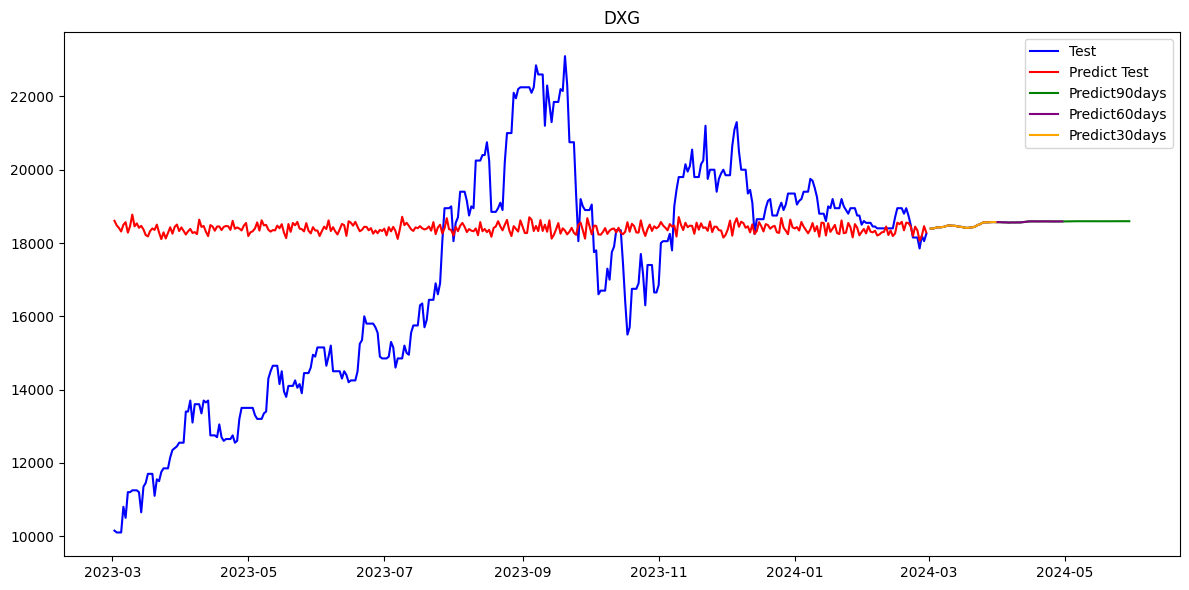

In [71]:
plt.figure(figsize=(12, 6))
new = pd.date_range(start=dxg_sorted.index[dxg_train_size], end=dxg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(new,dxg_test_data['y'],color='blue')

pred_test = pd.date_range(start=dxg_sorted.index[dxg_train_size], end=dxg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(pred_test,dxg_pred_test['TimesNet'],color='red')

start_date = dxg_sorted.index[-1] + datetime.timedelta(1)
dxg_predict_data_30 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(29))
dxg_predict_data_60 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(59))
dxg_predict_data_90 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(89))
plt.plot(dxg_predict_data_90,dxg_predict_lst_output[:90],color='green')
plt.plot(dxg_predict_data_60,dxg_predict_lst_output[:60], color='purple')
plt.plot(dxg_predict_data_30,dxg_predict_lst_output[:30],color='orange')
plt.legend(['Test',"Predict Test",'Predict90days','Predict60days','Predict30days'])
plt.title('DXG')
plt.tight_layout()
plt.show()

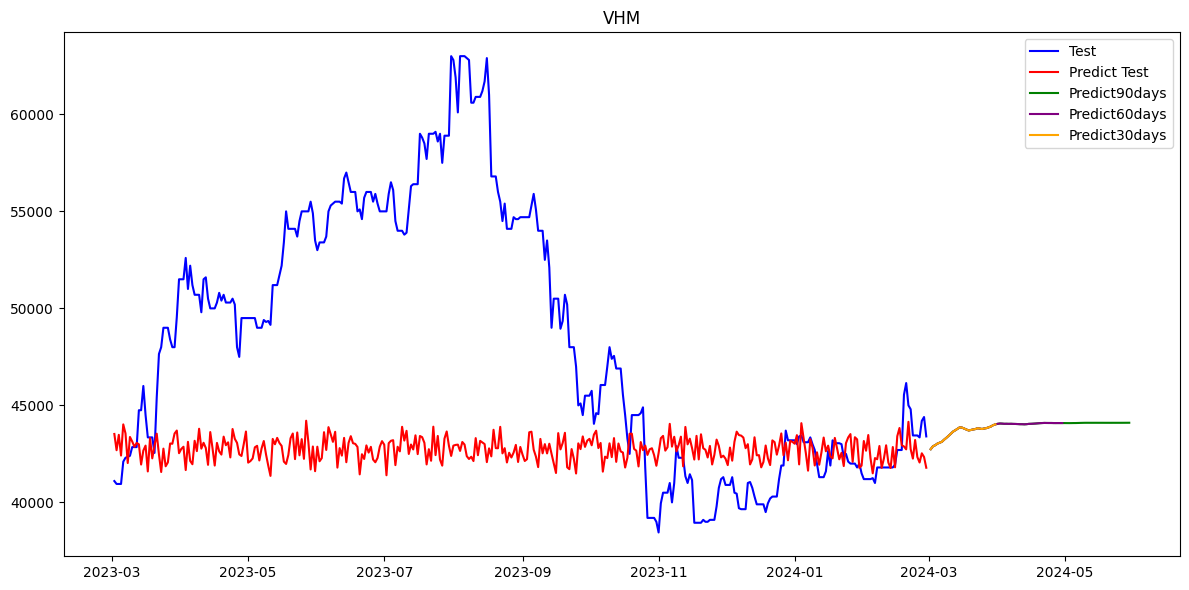

In [72]:
plt.figure(figsize=(12, 6))
new = pd.date_range(start=vhm_sorted.index[vhm_train_size], end=vhm_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(new,vhm_test_data['y'],color='blue')

pred_test = pd.date_range(start=vhm_sorted.index[vhm_train_size], end=vhm_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(pred_test,vhm_pred_test['TimesNet'],color='red')

start_date = vhm_sorted.index[-1] + datetime.timedelta(1)
vhm_predict_data_30 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(29))
vhm_predict_data_60 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(59))
vhm_predict_data_90 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(89))
plt.plot(vhm_predict_data_90,vhm_predict_lst_output[:90],color='green')
plt.plot(vhm_predict_data_60,vhm_predict_lst_output[:60], color='purple')
plt.plot(vhm_predict_data_30,vhm_predict_lst_output[:30],color='orange')
plt.legend(['Test',"Predict Test",'Predict90days','Predict60days','Predict30days'])
plt.title('VHM')
plt.tight_layout()
plt.show()

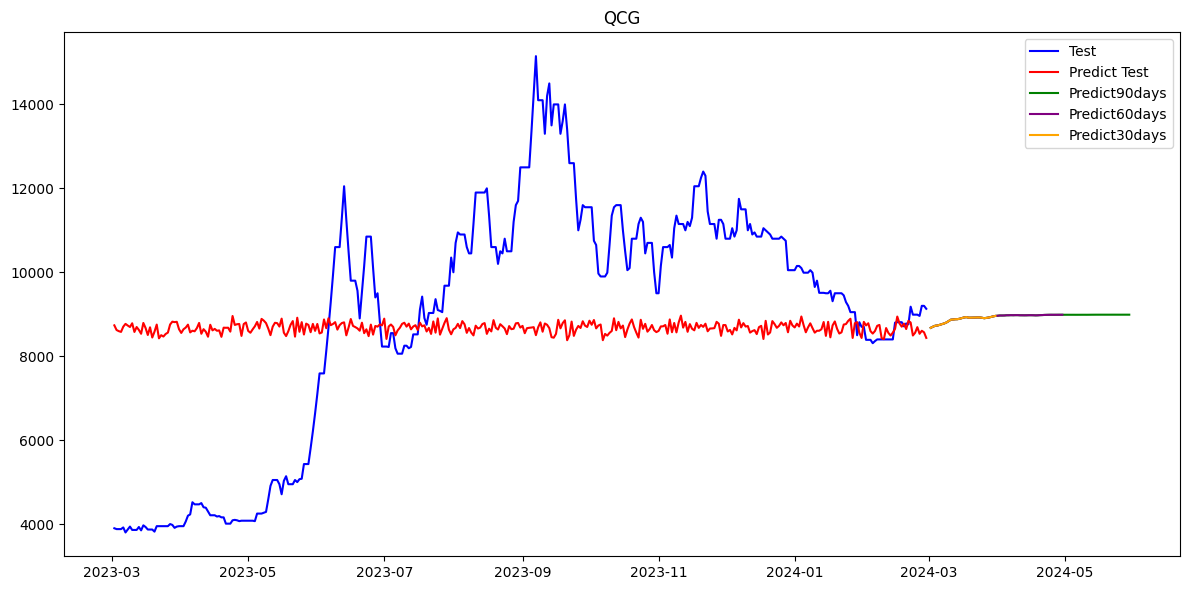

In [73]:
plt.figure(figsize=(12, 6))
new = pd.date_range(start=qcg_sorted.index[qcg_train_size], end=qcg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(new,qcg_test_data['y'],color='blue')

pred_test = pd.date_range(start=qcg_sorted.index[qcg_train_size], end=qcg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(pred_test,qcg_pred_test['TimesNet'],color='red')

start_date = qcg_sorted.index[-1] + datetime.timedelta(1)
qcg_predict_data_30 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(29))
qcg_predict_data_60 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(59))
qcg_predict_data_90 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(89))
plt.plot(qcg_predict_data_90,qcg_predict_lst_output[:90],color='green')
plt.plot(qcg_predict_data_60,qcg_predict_lst_output[:60], color='purple')
plt.plot(qcg_predict_data_30,qcg_predict_lst_output[:30],color='orange')
plt.legend(['Test',"Predict Test",'Predict90days','Predict60days','Predict30days'])
plt.title('QCG')
plt.tight_layout()
plt.show()